# Day Trading Analysis and Prediction

## Abstract

This poject is an in depth analysis of a day trading strategy implemented by Uriel and Liran, last semester computer science students. In the project we wish to find which attributes are most effective, resulting in a preferable outcome, as well as optimization of the strategy for the purpose of achieving a market edge, futhermore create a foundation for algrorithmic trading.

Background:
During 2017-2019 Liran implemented a discretionary day trading strategy with real equity. As part of the process Liran collected some basic attributes for each trade such as float, sector, entry price relative to vwap and other fundamental and technical features. Some of the major conclusions are that trading performace is very much correlated with the general market and the entry price position relative to vwap and gap percent change also act as a strong predictors. However the some major drawback as listed below came along.

* The lack of data- the number of observations (trades) was only about 150.

* 95% percent of the data was inserted manually- which is why the amount and quality of attributes may have negatively affected the results.

* The trades taken present only a limited and specified period (1.5 years in 2017-2019).


The above brings us to focus on a new project which will include more feature, more accurate data and better tools for conducting such analysis.

Goals: 

* Using more accurate 1 minute data for better data analysis.
* Measure different features ,and check which ones are strong predictors.
* Optimize the trategy based on the results.
* Use ML based tools on our observations for better decision making in future day trading.
* Create a foundation for algo-trading with a systematic approach as opposed to the discretionary approach used in this strategy.

Important notes:

* The data downloaded for this project presents only the trades taken, meaning the analysis is only based on this data. This may result is biased results from non-indepenedent subset of stock picks whereas the general performance and analysis may vary using a different subset of stock picks based on a different set of rules.
* None of the trades taken involved real money.
* All of the trades were taken in a discretionary manner - no computer algorithm was used for entry/exit.
* The information presented in this project is by no means trading advice, please note the purpose of this projcet is to conduct research and draw insights only.



## Table of Contents

### [1) Intro](#1) 

#### [1.1) Project Walkthrough](#1.1)

#### [1.2) Data Breakdown](#1.2)

#### [1.3) Strategy Description](#1.3)

#### [1.4) Defining The Problem](#1.4)

### [2) Libraries](#2)

### [3) Data Import](#3)

### [4) Target Data](#4)

### [5) EDA and Data Cleaning](#5)


#### [5.1 Target Data](#5.2)

#### [5.2 Core Data](#5.3)

#### [5.3 Fundamental Data](#5.4)

#### [5.4 Derivatives](#5.5)

### [6) Preprocessing](#6)

#### [6.1 PCA](#6.1)

#### [6.2 Random Forest](#6.2)

### [7) Modeling](#7)

#### [7.1 Classification](#7.1)

#### [7.2 Regression - Risk Reward Ration (R)](#7.2)

#### [7.3 RNN](#7.3)

### [8) Final Results and Conclusions](#8)




<a id=1></a>

## 1) Intro

<a id=1.1></a>

### 1.1) Project Walkthrough

<img src= "walkth.jpg"  width="800" height="800"/>

* Data Collection: The data in this project was taken from Yahoo Finance and Interactive Brokers as well as manually labeled data. The data extraction process although inseparable from this project is not featured on this page for the purpose of keeping this page neat, comprehensive and to avoid large chunks of code.\
To summarize the the process, we downloaded 1-minute and 1-day open,close, high,low and volume data for each object in the   dataset, stored it locally and extracted the relevant data .
  

* Data Import: From the local disk we import the dataset which is distributed to 6 different tables which represent a collection of features with a similar underlying information type. Additionaly create the df_merged data frame which is a dataset with all the core data, spy data and stock data merged.


* Target Data: Extract the target variables 'Potentiasl R' and 'Potential R bins' from the potential price of each trade.


* EDA and Data Cleaning: In this section we start building the data pipeline by first separating 33%-66% of the data for test and train. After the train data has been delivered we start visualizing it and drawing inference. The inference is then used for data cleaning which involves outlier elimination, data corrections and merging low count variable catagories with other catagories creating features sustainable for preprocessing and modeling.


* Preprocessing: After the data was cleaned we will create data processing methods to cover a range of different preprocessing techinuques such as discretizing/Standardizing continuous values and label/one-hot encoding as well as  dimension reduction using PCA, random forest feature selection and domain knowledge feature selection.


* Modeling: Finally we will train a list of machine learning algorithms on the different processed data variations and compare the best models. The best models will be optimized by hyper parameter tunining to achieve better results for the training data, the best model will then be applied to the test data followed by the scores and presentation of its application on the given problem. 


* Conclusion: In this section we take the best model and compare its output to other generic strategies and write the final conclusion.

<a id=1.2></a>
### 1.2) Data Breakdown




##### Core Data:

The Core data dataframe includes the data manually inserted for this project. Each observation represents a trade and is added separately along side by the trade's prices, times and different labels presented in this table. The distinction of each trade can be recognized looking at the data's keys: Symbol, Date, and Entry Time.

|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Num                |Trade's index number                                                                                                                                                                                                                                                                                                                                                                                                                                                  |int |
|Entry            |the entry price of a given trade                                                                                                                                                                                                                                                                                                                                                                             |USD  |
|Entry Time                |the entry time of a given trade                                                                                                                                                                                                                                                                                                                                                                                                                                   |time | 
|SL            |stop loss price, if price exceeds this price to the downside sell immediately                                                                                                                                                                                                                                                                                                                                                                            |USD  |                          
|Exit            |the exit price of a given grade                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|Exit Time    |the exit time of a given trade                                                                                                                                                                                                                                                                                                                                                    |time|
|Exit R                   | risk reward ratio using a discretionary exit   |ratio|  
|Pattern| the pattern tag (The correction pattern prior to breakout). See [1.4](#1.4)                                                                                                                                                                                                                                                                                                                                          |string|
|VWAP Tag              |the vwap tag. 'BO'-pattern breakout from  vwap or 'SUPPORT' - pattern supported by vwap. See [1.4](#1.4)                                                                                                                                                                                                                                                                                                                                          |string  |
|Catalyst      |a catalyst backing the trade. 'L' - leading sector/industry, 'H' - hype with no reason or 'C' - positive news catalyst                                                                                                                                                                                                                                                                                                                                  |string    |

##### Fundamentals:

In this dataframe we organize all the collected important fundamental information relevant for this project, some of the features are crucial for the company's financial state.
We also focus on the the company's holding distribution and the company's tradeability (float and shares outstanding), because for small cap stocks (companys with a market cap under 5 billion) the price change may also depend on the amount of shares in the market as opposed to held by the company's senior management. Stocks with such floats tend to move rapidly as a result of a lack of tradeable shares. And stocks with a large percentage of insider holdings may also positivley affect price.

Each row represents a symbol that was traded in a single day. It is important to note that if a few trades shared the same symbol then only 1 row in the funadamentals dataframe will apear for all the trades.



|Term                  |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the data was downloaded                                                                                                                                                                                                                                                                                                                                                                                                                             |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|priceToBook            |a ratio that expresses a company's stock share value divided by its book value per share                                                                                                                                                                                                                                                                                                                                                                              |ratio  |
|country                |the country location of the company                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|floatShares            |the portion of shares of a company that are in the hands of public investors                                                                                                                                                                                                                                                                                                                                                                                          |USD    |
|heldPercentInsiders    |the percentage of shares held by company insiders (board, management, those who are party to insider information)                                                                                                                                                                                                                                                                                                                                                     |percent|
|heldPercentInstitutions|the percentage of shares of a compnay held by institutions (mostly pension funds, insurance companies or investment banks)                                                                                                                                                                                                                                                                                                                                            |percent|
|marketCap              |the total value of all company's shares of stock. The number of shares multiplied by the value of one share of a stock                                                                                                                                                                                                                                                                                                                                              |USD    |
|netIncomeToCommon      |total net income to common stock holders. Calculated by: the total revenue of the company - total expenses - preferred dividends                                                                                                                                                                                                                                                                                                                                      |USD    |
|sector                 |the sector type of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                          |string |
|sharesOutstanding      |the total number of shares of a company                                                                                                                                                                                                                                                                                                                                                                                                                               |int    |
|sharesShort            |the number of shares of a stock currently sold short and not yet closed or covered (returned to the lender)                                                                                                                                                                                                                                                                                                                                                           |int    |
|shortPercentOfFloat    |percentage of short sales of a stock                                                                                                                                                                                                                                                                                                                                                                                                                                  |percent|
|enterpriseToEbitda     |a ratio used as a valuation tool to compare the value of a company, debt included, to the company’s cash earnings less non-cash expenses.<br>enterprise is the overall value of a company, the sum of the marketcap + debts + value of associate companies - cash and cash equivalents.<br>EBITDA stands for Earnings Before Interest, Taxes, Depreciations and Amortizations, meaning the earnings of a company prior to subtracting expenses like interests or taxes.|ratio  |

##### Bar Data:

Get the different bar (high, low, open, close and volume) datasets  and supplement them with relative volume, vwap bar tags and gap with the application functions mentioned above.

##### Datasets:

yahoo_minute: 1 minute bar data from Yahoo Finance

spy_minute: 1 minute bar data for spy from Yahoo Finance

spy_d1: 1 day bar data for spy  from Yahoo Finance

yahoo_d1: 1 day bar data from Yahoo Finance


|Term                 |Description                                                                                                                                                                                                                                                                                                                                                                                                                                                               |Format | Time Bar |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|:------|
|Date          |date of the bar          |date  | all  |
|Time          |start time of the bar   |time  | 1-minute  |
|High          |bar highest high        |USD | all |
|Low           |bar lowest low          |USD  | all|
|Open          |bar open price          |USD|all|
|Close         |bar close price         |USD    |all |
|Adj Close    |adjusted close, considers historical stock splits  |USD| all |
|RV                  |bar relative volume trailing 9 minutes back, see [1.4](#1.4)  |  ratio      |all  |
|VWAP              |intraday volume weighted average price, see [1.4](#1.4)      | ratio          |1-minute |
|Bar Tag           |bar-candle shape specification           |string          |1-minute   |
|Gap               |bar gap prior to open, see [1.4](#1.4)          |percent         | 1-day|


##### Derivatives:

This dataframe holds critical technical data which acts as indicator to short-term market sentiment. Volume and gaps indicate market interest, historical data such as week or month change indicate the short term trend and spy data represents the global market bias looking at the S&P 500.

|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Num                |Trade's index number                                                                                                                                                                                                                                                                                                                                                                                                                                                  |int |
|Gap               |bar gap prior to open, see [1.4](#1.4)               |percent| 
|spy_Gap               |bar SPY gap prior to open, see [1.4](#1.4)                 |percent| 
|Sum Volume at Entry    |the sum the volume from market open at 9:30 until the trade entry of a given trade |percent| 
|RV 66 |66 bar Relative volume, current bar's volume relative to the trailing back 66 bars average volume | ratio|
|VWAP rd| price relative euclidean distance to the VWAP indicator| ratio|
|Week Change| the percent change in price from the last week (5 trading days)| percent|
|Month Change|the percent change in price from the last month (~22 trading days)| percent|
|spy_Week Change| SPY percent change in price from the last week (5 trading days)| percent|
|spy_Month Change|SPY percent change in price from the last month (~22 trading days)| percent|



#### Target Data:

Here we preset the target variables, where 'Potential R' and 'Potential R bins' are the target variables used for this project and 'Exit R' is the manual exit that will be used as a comparison benchamrk.


|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Num                |Trade's index number    |int|
|Exit R               |risk reward ratio using a discretionary exit              |ratio| 
|Potential R   |risk reward ratio at potential price |ratio| 
|Potential R bins| discretized bin intervals derived from 'Potential R'| intervals/bins|
|train|if is for the train dataset then 1 else 0 | binary|

### 1.4) Terminology and Abbreviations:


##### SL - Stop Loss
A stop-loss order is an order placed with a broker to buy or sell a specific stock once the stock reaches a certain price. A stop-loss is designed to limit an investor's loss on a security position.

##### R - Risk Reward Ratio
The risk/reward ratio marks the prospective reward an investor can earn for every dollar they risk on an investment. Many investors use risk/reward ratios to compare the expected returns of an investment with the amount of risk they must undertake to earn these returns.

$ \ \ \ \ \ \ \ \ \ \ \ \ RRR = R = \frac {Exit \ Price \ - \ Entry \ Price}{Entry \ Price \ - \ Stop \  Loss}$.

If trade drops to stop loss then $R = -1$, else at breakeven  $R = 0$ or at profit $R > 0$.

##### BO - Breakout
The occurrence of a security's price surpassing a certain price barrier such as a technical indicators, trendlines or psychological price barriers.

##### VWAP - Volume Weighted Average Price
The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.
VWAP is calculated by adding up the dollars traded for every transaction (price multiplied by the number of shares traded) and then dividing by the total shares traded.

$ \ \ \ \ \ \ \ \ \ \ \ \ VWAP = \frac {\Sigma \  (Volume \  \times \  Price)}{Total \  Volume} $

#### RV - Relative Volume:
Relative Volume is an indicator that tells traders how current trading volume is compared to past trading volume over a given period. It indicates market particiant interest in a given security, high relative volume signals interest. High relative volume is normally followed by catalysts such as earnings, announcements and other news reports.

$ \ \ \ \ \ \ \ \ \ \ \ \ Volume \ Average = \frac {\sum_{n = 1}^{Period} Volume}{Period}$

$ \ \ \ \ \ \ \ \ \ \ \ \ Relative \ Volume = \frac {Volume}{Volume \ \ Average}$


#### Gap:
A gap is an area discontinuity in a security's chart where its price either rises or falls from the previous day’s close with no trading occurring in between. Gaps are common when news causes market fundamentals to change during hours when markets are typically closed, for instance an earnings call after-hours.


$ \ \ \ \ \ \ \ \ \ \ \ \ Gap = \frac { Previous \ Day's \ Close \ Price}{Current \ Day's \ Open \ Price} $


#### SPY:
The SPDR S&P 500 Trust ETF, also known as the SPY ETF, is one of the most popular funds that aims to track the Standard & Poor's 500 Index, which comprises 500 large- and mid-cap U.S. stocks. These stocks are selected by a committee based on market size, liquidity, and industry. The S&P 500 serves as one of the main benchmarks of the U.S. equity market and indicates the financial health and stability of the economy.

#### VWAP Tag:
Based on the VWAP, VWAP is the main center of attraction for traders, meaning the closer a stock price is to the VWAP the more buffer it has to the upside. Trades with the catagory 'SUPPORT' are "supported" meaning the indicator is close to the price and supports it from below before and during the pattern breakout. 'BO' refers to a trade where price simultaneously breaks out of the pattern and the VWAP indicator to the upside, during the same time period (same minute) or at most 1 period later (at most 2 minutes = 2 periods).



<a id=1.3></a>

### 1.3) Strategy Description

#### Trade Picking Process:

Smalls caps are stocks with a market cap ranging between \\$250 million to \$2 billion. These stocks bring a lot of attraction because of their tendency to move rapidly interday, as a result of high volatility and liquidity as well as their low price (normally under 20\\$ per share). It is not unusual for such stocks to move 30-80\% in one day, whereas the large volume stocks with high volatility and liquidity tend to move on a single digit percent move. 

Since the major moves happen on stocks with a large amount of buyers/sellers,  bringing a tremendous amount of volume causing high volatility and rapid stock movements we filter stocks based on the following critiera:

* Relative volume above 1.5
* Daily volume is at least 200k and growing as the trading day progresses e.g 1mill at 10:00 am New York time.
* Market cap below \\$2 billion (small caps).
* 0.5\\$ - 15\\$ price range.

#### Trade Entry Decision Making:

After a selected amount of stocks were chosen based on the criteria above, we look for certain technical patterns signaling a potential rapid move in price. All entry share a similar pattern which is swift price move to the upside creating a "flag pole", following the "flag pole" we're expecting a correction pattern to take place, the correction pattern are the patterns listed below (including relevant references for more info):

ST - Symmetrical triangle ([Bulkowski Chart Pattern site - Symmetrical Triangles](http://thepatternsite.com/st.html))

DT - Descending triangle ([Bulkowski Chart Pattern site - Descending Triangles](http://thepatternsite.com/dt.html))

AT - Ascending trangle ([Bulkowski Chart Pattern site - Ascending Triangles](http://thepatternsite.com/at.html))

F - Flag ([Bulkowski Chart Pattern site - Flags](http://thepatternsite.com/flags.html))

W - Wedge ([[Bulkowski Chart Pattern site - Wedge](http://thepatternsite.com/fallwedge.html))

R - Rectangle ([[Bulkowski Chart Pattern site - Rectangles](http://thepatternsite.com/recttops.html))

After a correction takes place we wait for a pattern breakout, meaning we wait until a bar open is within the pattern and during the bar's period it will reach above the patterns top limit yo be considered a breakout, the top limit is detemined by a trendline signaling the pattern's frame.    
   <img src= "photo1.png"  width="220" height="220"/>






#####      <pre>                      An example of an ascending triangle pattern with a strong breakout. </pre>


#### Trade Exit Decision Making: 

Unlike the trade entry process, the exit process does not possess a one rule fits all. For the most part we'll exit a trade based on a single strong red bar that exhibits high volume and sometimes also the SPY price position relative to vwap is considered. For example if after 10 minutes in a trade a strong red candle is presented alongside high relative volume and the SPY price is below the SPY intraday vwap then we will most likely exit the trade because that is a signal for strong selling power. As mentioned this set of rules is not used consistenly and in this project we try to find a better exit strategy to optimize the trade, which is why we take a closer look at each trade's potential -  the potential highest high of a trade given it has not yet dropped back to the stop loss/ entry price, more will be covered in the project. 
 <img src= "photo2.png"  width="240" height="240"/>

#####      <pre>        An example of an ascending triangle pattern breakout entry with an exit at a high relative volume red bar. </pre>

### 1.4) Defining The Problem - Target Variable

One of the main purposes of the project is to use predictive tools in order to find an optimal or sub-optimal exit strategy one that can maximize our risk/reward. In the datasets as seen above we have dozens of observations, where each observation is distinct in terms of the attirubutes-features it brings. Based on these features we wish to see the a affect on the trade's performance by looking at the "Potential Price".

The potential price is detemined by the highest price a given trade reached until it touched the stop loss or until the trading day ended.\
This price will be used to compute 'Potential R' which is the potential risk/reward ratio. The 'Potential R' will act as the response or the target variable we are trying to predict.\
The worthwhileness of a trade is dependent on 'Potential R'- potential risk/reward ratio for recieving a maximum return from a given risk input, thus correctly predicting the potential max risk reward ratio is crucial for the trade picking process as well as the trade exit management. As mentioned the purpose is finding an optimal or a close sub-optimal exit strategy to ensure profitabililty.

In order to achieve the best outcome we decided to treat this problem both as a regression and a classification problem, therefore we created 2 response variables, 'Potential R' as mentioned above and 'Potential R bins' which is simply a discretized version of 'Potential R'.

   <img src= "Potential Price.png"  width="600" height="600"/>
   
#####      <pre>                              An illustration of a trade with the potential price marked. </pre>  

<a id=2></a>

## 1) Libraries


In [1]:

# utility
import os 
import pandas as pd
import datetime
import numpy as np
import appfunctions as ap
import re

# Visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt #for data visualization
from plotly.subplots import make_subplots
import plotly.express as px

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,train_test_split
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder,LabelEncoder,StandardScaler,PolynomialFeatures

# Machine Learning
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# Scoring and training
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,train_test_split


%matplotlib inline

# Warning filtering
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


<a id=2></a>

## 2) Data Collection

The data for this project was collected from  different sources in different methods. For the purpose of keeping this page reader friendly avoiding large chunks of code we decided to separate the data collection into a diferent notebook.
The data collection notebook can be seen in the following link: (https://nbviewer.jupyter.org/github/zoxfog/Day-Trading-Analysis-2/blob/main/Raw_Data_Extraction.ipynb)

core_data - The data in this dataset was collected manaully as mentioned above, each observation consists of manually labeling the features 'Pattern', 'VWAP Tag' and 'Catalyst' as well as writing the the dates, times, symbols and prices of each trade. Based on the symbol and date the rows in the following data sets are created.

fundamentals - Each stock's fundamental data was collected using the yfinance library for python. The original fundamentals dataset as seen in the link above includes around 100 columns each represeting different informaton about the company. Only the relevant information and the information with the least missing values was added to the fundamaentals dataset as featured in this notebook. An observation in the fundamentals dataset was added straight aftet a new obsevation was manually inserted to core_data.

Bar data - 1-minute and 1-day datasets for each trade traded was downloaded from yahoo finance using the yfinance library. Additionaly we downloaded 1-m dataset from Interactive Brokers for the purpose of obtaining more accurate 1-m data directly from a leading broker. Unfortunately after observing the data from Intercative Brokers we decided to use the yahoo finance data only becasue the Interactive Brokers was found relatively "dirty".

derivatives - Extracted data from the bar data datasets, while Bar data presetns only the the per bar data. Some other information is critical such as the general trend the the realtive volume.


<a id=3></a>

## 3) Data Import


#### Fundamentals

In [2]:
fundamentals = pd.read_excel("Fundamentals.xlsx")

fundamentals = fundamentals[["Date","Symbol","priceToBook","country","floatShares","heldPercentInsiders","heldPercentInstitutions"
,"marketCap", "netIncomeToCommon","sector","sharesOutstanding","sharesShort","shortPercentOfFloat","enterpriseToEbitda"]]

fundamentals["Date"] = fundamentals["Date"].apply(lambda x: x.date())


#### Core Data
 

In [3]:
core_data = pd.read_excel("Core Data.xlsx")
core_data = core_data[core_data["Download"]!=0].drop(columns = ['Download','Intended Entry'])
core_data["Date"] = core_data["Date"].apply(lambda x: x.date())
core_data["Entry Time"] = core_data["Entry Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Exit Time"] = core_data["Exit Time"].apply(lambda x: datetime.datetime.strptime(x ,'%H:%M:%S').time())
core_data["Num"] = pd.Series(np.arange(1,len(core_data)+1))

core_data["Exit R"] = (core_data["Exit"]-core_data["Entry"])/((core_data["Entry"]-core_data["SL"]))

In [4]:
core_data.sample(5)

Date  Entry Entry Time   Exit Exit Time Pattern     SL Strategy  \
122  2021-07-21  11.16   10:53:00  10.27  11:15:00      ST  10.27       BO   
80   2021-04-30   9.91   10:21:00   9.87  10:38:00      DT   9.75       BO   
79   2021-04-30   9.91   10:16:00   9.75  10:17:00      ST   9.75       BO   
40   2021-04-07  12.40   10:01:00  12.08  10:19:00      ST  12.08       BO   
98   2021-05-14  11.93   09:57:00  11.95  09:58:00      ST  11.84       BO   

    Symbol VWAP Tag Catalyst  Num    Exit R  
122   LEXX  SUPPORT        C  123 -1.000000  
80    VXRT       BO        H   81 -0.250000  
79    VXRT       BO        H   80 -1.000000  
40    HYLN  SUPPORT        C   41 -1.000000  
98    GOGO  SUPPORT        H   99  0.222222

<a id=3.4></a>

#### Bar Data




##### Datasets:

yahoo_minute: 1 minute bar data from Yahoo

spy_minute: 1 minute bar data for spy from Yahoo

spy_d1: 1 day bar data for spy  from Yahoo

yahoo_d1: 1 day bar data from Yahoo

#### import the data from the 'immidiate import' directory

In [5]:
%%time

path = os.path.join('immidiate import', 'yahoo_minute.xlsx')
yahoo_minute = pd.read_excel(path)
yahoo_minute['Time'] = yahoo_minute['Time'].apply(lambda x: datetime.datetime.strptime(x,'%H:%M:%S').time())
yahoo_minute['Date'] = yahoo_minute['Date'].apply(lambda x: x.date())


path = os.path.join('immidiate import', 'spy_minute.xlsx')
spy_minute=pd.read_excel(path)
spy_minute['Time'] = spy_minute['Time'].apply(lambda x: datetime.datetime.strptime(x,'%H:%M:%S').time())
spy_minute['Date'] = spy_minute['Date'].apply(lambda x:  x.date())

path = os.path.join('immidiate import', 'yahoo_d1.xlsx')
yahoo_d1= pd.read_excel(path)
yahoo_d1['Date'] = yahoo_d1['Date'].apply(lambda x:  x.date())

path = os.path.join('immidiate import', 'spy_d1.xlsx')
spy_d1= pd.read_excel(path)
spy_d1['Date'] = spy_d1['Date'].apply(lambda x:  x.date())

Wall time: 31.5 s


#### Plot  'yahoo minute data' 



In [6]:
d1 = yahoo_minute[yahoo_minute["Symbol"]=="RVPH"].copy()
ap.graphViz(d1)



#### Plot a D1 chart example

In [7]:
d3 = yahoo_d1[yahoo_d1["Symbol"]=="CLEU"].copy()
ap.graphViz(d3,period = "Date",end = datetime.date(2021,1,1))

####  Derivatives

In [8]:
derivatives = pd.read_excel('Derivatives.xlsx')
derivatives.head(5)

Symbol  Num       Date  Week Change  Month Change  spy_Week Change  \
0   CPRX    1 2021-03-22    14.536345      4.100235        -1.090454   
1   KXIN    2 2021-03-22     3.603607    -19.953594        -1.090454   
2    SDH    3 2021-03-22    14.888334      0.871459        -1.090454   
3   JFIN    4 2021-03-24   153.117788     89.948008        -0.894735   
4   PIXY    5 2021-03-24     6.643359    -13.841808        -0.894735   

   spy_Month Change        Gap   spy_Gap  Sum Volume at Entry   RV 66  \
0         -0.520317   4.576666  0.141211              1969671   2.401   
1         -0.520317   0.000000  0.141211              2619817   1.849   
2         -0.520317   2.207503  0.141211               502028   4.260   
3          1.017931   6.822610  0.385109              2450613   1.340   
4          1.017931  12.546122  0.385109               775357  11.468   

    VWAP rd  
0  1.051051  
1  1.125541  
2  1.092077  
3  1.109756  
4  1.062500



##### Merge the minute data , spy minute data with the core data and compute the RRR - risk reward ratio for each bar

In [9]:
# change the spy data columns names

selected_spy_minute = spy_minute.drop(columns  = ["Symbol","Adj Close","Date","Time"])

selected_spy_minute = selected_spy_minute.add_prefix('spy_')
selected_spy_minute[["Date","Time"]] = spy_minute[["Date","Time"]]

# compute the RRR for symbol minute data and merge it with the core data table
yahoo_minute_R = yahoo_minute.merge(core_data, on = [ "Date","Symbol"], how = "left")

yahoo_minute_R["High R"] =(yahoo_minute_R["High"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Low R"] = (yahoo_minute_R["Low"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Close R"] = (yahoo_minute_R["Close"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])
yahoo_minute_R["Open R"] = (yahoo_minute_R["Open"]-yahoo_minute_R["Entry"])/(yahoo_minute_R["Entry"]-yahoo_minute_R["SL"])

# merge all of the mentioned above to a fully merged dataset
df_merged = yahoo_minute_R.merge(selected_spy_minute, on = ["Date","Time"],how = "left")
df_merged=df_merged.round(3)

<a id=4></a>
## 4) Target Data

#### Potential and Potential R


Here we will create the Target Data dataset, first we find the potential of each trade at mentioned in [1.4](#1.4) and then we compute the 'Potential R' which is the potential risk/reward ratio of the potential price for a given trade. Becuase we want the response to act also as a classificaion problem we create the target variable 'Potential R bins' which is a distretized form of 'Potential R' distributed into price intervals.

#### Target Data:


|Term                 |Description                                        |Format |
|:-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------|
|Date                   |the date in which the trade took place                                                                                                                                                                                                                                                                                                                                                                                                                            |date   |
|Symbol                 |symbol of the stock                                                                                                                                                                                                                                                                                                                                                                                                                                                   |string |
|Num                |Trade's index number    |int|
|Exit R               |risk reward ratio using a discretionary exit , see [3.3](#3.3)               |ratio| 
|Potential R   |risk reward ratio at potential price, see [5](#5) |ratio| 
|Potential R bins| discretized bin intervals derived from 'Potential R'| intervals/bins|
|train|if is for the train dataset then 1 else 0 | binary|

##### Compute the Potential Price for every given trade using the 1-m yahoo finance data.

In [10]:
core_data["Potential"] = 0
core_data["Potential R"] = 0
core_data["Potential Time"]=0

q1 = df_merged[
    (df_merged["Entry Time"]<=df_merged["Time"]) ].copy()
limit = 1

for num in q1["Num"].unique():    
    q2 = q1[q1["Num"] ==num].reset_index()    
    flag_above_limit = 0
    potential = 0
    potential_index = 0
    
    for index, row in q2.iterrows():
        if row["High"]>potential:
            potential_index = index
            potential = row["High"]
        #create some buffer        
        if (row["Low"]<=(row["SL"]) and (index>=1))  or row["Exit Time"]==row["Entry Time"]:
            break
            
    core_data.loc[core_data["Num"]==num,["Potential"] ]= q2.loc[potential_index,"High"]
    core_data.loc[core_data["Num"]==num,["Potential R"]] = q2.loc[potential_index,"High R"]
    core_data.loc[core_data["Num"]==num,["Potential Time"]] = q2.loc[potential_index,"Time"]
    
    
    
target_data = core_data[["Symbol","Num","Date","Exit R","Potential R"]].copy()

# drop the target columns from core_data to avoid merge clashes with target_data
core_data = core_data.drop(columns =["Exit R","Potential R" ])

##### Discretize  'Potential R' to create 'Potential R bins'.

In [11]:
intervals = [pd.Interval(left=3.5, right=999),pd.Interval(left=1, right=3.5),pd.Interval(left=-1, right=1)]
target_data['Potential R bins'] = target_data['Potential R'].apply(lambda x: intervals[0] if x in intervals[0] 
                                                                  else intervals[1] if x in intervals[1]
                                                                  else intervals[2]   )
target_data['Potential R bins'] =  target_data['Potential R bins'].apply(lambda x: str(x))

##### Plot an example of the intraday data with Entry, Exit, Potential 

In [12]:

plot_data = yahoo_minute.merge(core_data,on = ["Symbol","Date"],how = "inner")
d1 = plot_data[plot_data["Num"]==52].copy()
ap.graphViz(d1,point_list=["SL","Entry","Exit","Potential"])

In [13]:
target_data.head(5)

Symbol  Num        Date    Exit R  Potential R Potential R bins
0   CPRX    1  2021-03-22 -1.000000        0.250      (-1.0, 1.0]
1   KXIN    2  2021-03-22  2.333333        3.000       (1.0, 3.5]
2    SDH    3  2021-03-22  2.000000        3.100       (1.0, 3.5]
3   JFIN    4  2021-03-24 -1.000000        0.079      (-1.0, 1.0]
4   PIXY    5  2021-03-24  5.625000        7.500     (3.5, 999.0]

<a id=5></a>

## 5) EDA and Preprocessing


Here we will visualize the data, attempt to draw first inference from the data, and clean it.
The visualization will include the relationship between each feature and the response - 'Potentrial R' and 'Potential R bins' as well as the distribution of the feature's values for continuous values and the count and pie for features with discrete values.

The cleaning approach in this project is avoiding by all coss dropping rows from the data, unfortunately we a limited amount of observations meaning each observation has a stronger impact, and the bigger the sample the more it resembles the general population. Cleaning the data will involve imputing missing values for observations with missing features and correcting outliers in a way that their distinction is kept however with lowering their magnitude.

##### Separate train-test

Here we separate train and test, 2/3 train and 1/3 test. All the visualization, inference and cleaning will be conducted based on the train data only. This is important because we want to avoid overfitting the model. 

In [14]:
train_count = round(len(target_data)*(2/3))

train = target_data.sample(train_count,random_state = 0)
test = pd.concat([target_data, train, train]).drop_duplicates(keep=False)

train['train']=1
test['train']=0

target_data = pd.concat([test,train]).sort_index()

<a id=5.1></a>

### 5.1) Target Data 


In [15]:
train = target_data[target_data["train"]==1].copy()



f,axes=plt.subplots(1,3,figsize=(20,5))

# first plot

g1 = sns.distplot(a=train[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(np.arange(-2,21,2))
axes[0].axvline(x=train["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].mean()-0.8,0.01,'mean',rotation=90)
axes[0].axvline(x=train["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].median()-0.8,0.01,'median',rotation=90)
axes[0].set_xlabel('R')
axes[0].title.set_text('Potential R - histogram')
axes[0].set_ylabel('density')



# seocnds plot
g2 = sns.countplot(x="Potential R bins",data=train.sort_values(by = ["Potential R bins"]),ax=axes[1])
axes[1].title.set_text('Potential R bins - count')



value_count = train.groupby(['Potential R bins']).count()['Num'].values
intervals = train.groupby(['Potential R bins']).count().index.map(lambda x: str(x))
axes[2].pie(value_count,labels = intervals)
axes[2].title.set_text('Potential R bins - pie')

##### Inference:



As one can see, we get a skewed distribution in 'Potential R' with some outliers in the far right.
A trade with a high R is considered a good trade which is why we will reduce the outliers to a price which is still high but not too high to avoid falsley manipulating our analysis and models.


##### lower high values above 10 in 'Potential R'  to 10 and high values above 10 in 'Exit R' to 10.

In [16]:


target_data["Potential R"] = target_data["Potential R"].apply(lambda x: 10 if x>10 else x)
target_data["Potential R"] = target_data["Potential R"].apply(lambda x: 0 if x<0 else x)
target_data["Exit R"] = target_data["Exit R"].apply(lambda x: 10 if x>10 else x)

# recorrect the intervals after the changes in 'Potential R'
intervals = [pd.Interval(left=3.5, right=10),pd.Interval(left=1, right=3.5),pd.Interval(left=0, right=1)]
target_data['Potential R bins'] = target_data['Potential R'].apply(lambda x: intervals[0] if x in intervals[0] 
                                                                  else intervals[1] if x in intervals[1]
                                                                  else intervals[2]   )
target_data['Potential R bins'] =  target_data['Potential R bins'].apply(lambda x: str(x))



##### Plot the changes:

In [17]:
#override the the old train and test after the changes
train = target_data[target_data["train"]==1]
test = target_data[target_data["train"]==0]

f,axes=plt.subplots(1,3,figsize=(20,5))

# first plot

g1 = sns.distplot(a=train[["Potential R"]],bins = 15,ax = axes[0] ,color="g")
axes[0].set_xticks(np.arange(-2,21,2))
axes[0].axvline(x=train["Potential R"].mean(),color = "r", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].mean()-0.8,0.01,'mean',rotation=90)
axes[0].axvline(x=train["Potential R"].median(),color = "black", ymin=0, ymax=0.2)
axes[0].text(train["Potential R"].median()-0.8,0.01,'median',rotation=90)
axes[0].set_xlabel('R')
axes[0].title.set_text('Potential R - histogram')
axes[0].set_ylabel('density')



# second plot
g2 = sns.countplot(x="Potential R bins",data=train.sort_values(by = ["Potential R bins"]),ax=axes[1])
axes[1].title.set_text('Potential R bins - count')


# third plot
value_count = train.groupby(['Potential R bins']).count()['Num'].values
intervals = train.groupby(['Potential R bins']).count().index.map(lambda x: str(x))
axes[2].pie(value_count,labels = intervals)
axes[2].title.set_text('Potential R bins - pie')


<a id=5.2></a>

### 5.2) Core Data

In [18]:
core_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            125 non-null    object 
 1   Entry           125 non-null    float64
 2   Entry Time      125 non-null    object 
 3   Exit            125 non-null    float64
 4   Exit Time       125 non-null    object 
 5   Pattern         125 non-null    object 
 6   SL              125 non-null    float64
 7   Strategy        125 non-null    object 
 8   Symbol          125 non-null    object 
 9   VWAP Tag        125 non-null    object 
 10  Catalyst        125 non-null    object 
 11  Num             125 non-null    int32  
 12  Potential       125 non-null    float64
 13  Potential Time  125 non-null    object 
dtypes: float64(4), int32(1), object(9)
memory usage: 14.2+ KB


In [19]:
core_data.describe()

Entry        Exit          SL         Num   Potential
count  125.000000  125.000000  125.000000  125.000000  125.000000
mean     6.058120    6.070416    5.886280   63.000000    6.469688
std      3.781647    3.790729    3.695126   36.228442    4.011861
min      0.635000    0.652000    0.615000    1.000000    0.760000
25%      2.700000    2.720000    2.630000   32.000000    3.080000
50%      5.310000    5.420000    5.010000   63.000000    5.750000
75%      8.800000    8.750000    8.680000   94.000000    9.940000
max     15.130000   15.440000   14.850000  125.000000   16.120000



#### Continuous Values


In [20]:
plot_df = core_data[["Num","Entry","Pattern","Catalyst","VWAP Tag"]].copy()

plot_df = plot_df.merge(train[["Num","Potential R","Exit R","Potential R bins"]],on = ["Num"], how = "inner")
plot_df = plot_df.sort_values(by=["Potential R bins"])
plot_df["Potential R bins"]=plot_df["Potential R bins"].apply( lambda x: str(x))
ap.regPlot("Entry",plot_df)





#### Discrete Values

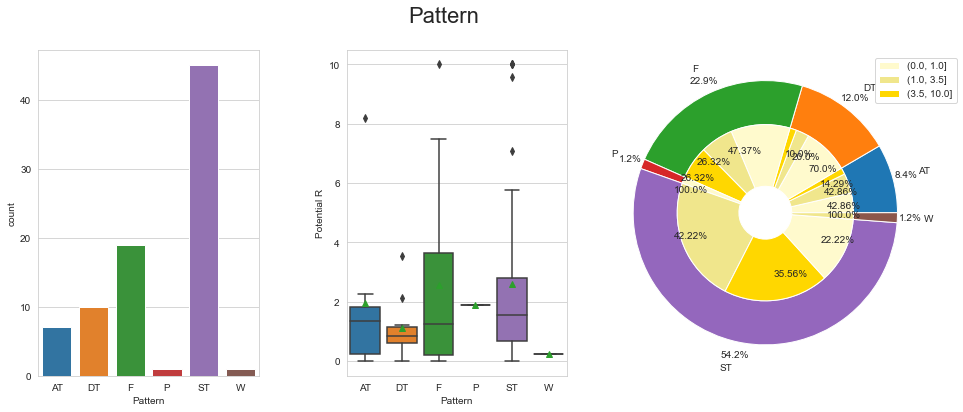

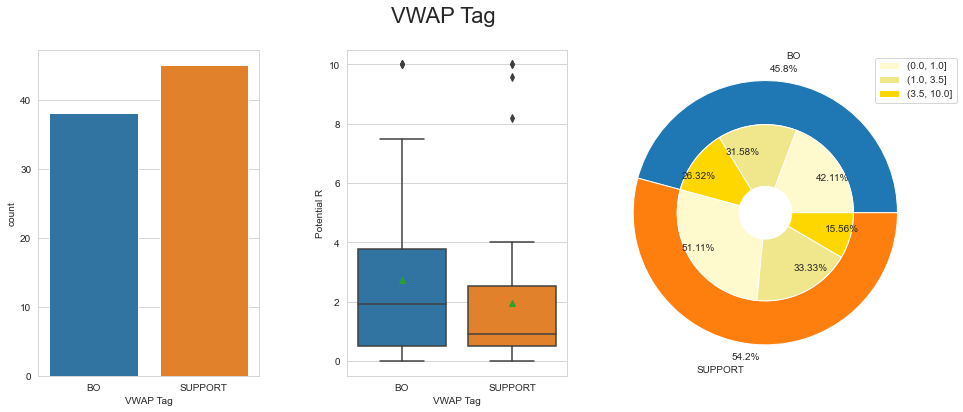

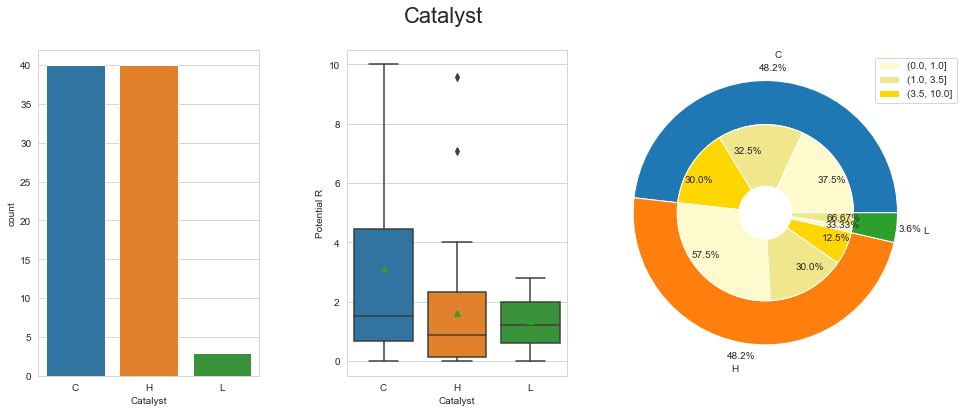

In [21]:
   
ap.disPlot("Pattern",plot_df)
ap.disPlot("VWAP Tag",plot_df)
ap.disPlot("Catalyst",plot_df)

#### Inference and Data Adjustments:

Pattern - Due to the low count of 'W' and 'P', we will combine them with 'F' and 'ST' because they present the closest similarity ( check Bulkowksi Chart Pattern site in [1.3](#1.3)).

Catalyst - Due to the low count of 'L' we will therefore combine 'L' with 'H', because a news catalysts representes by 'C' is still more significant than stocks driven by hype - 'H'. In fact some hype driven stocks maybe casued by a leading sector/industry/emerging market thus combining the two is more suited.




##### combine the catagories.

In [22]:

core_data['Pattern'] = core_data['Pattern'].apply(lambda x: "F" if x=="W" else "ST" if x=="P" else x) 
core_data['Catalyst']  = core_data['Catalyst'].apply(lambda x: "H" if x=="L" else x)


##### Plot the changes.

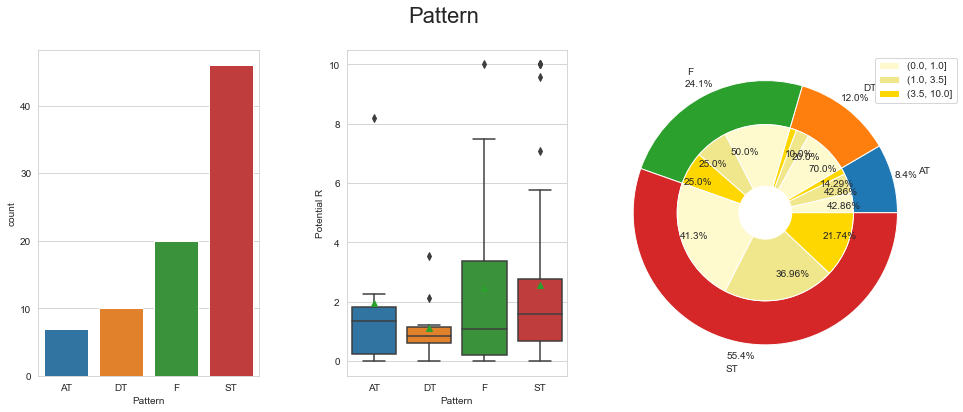

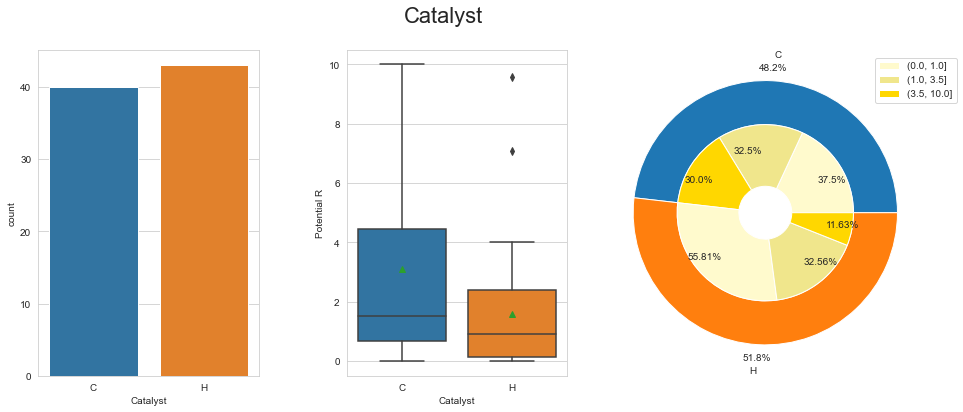

In [23]:
plot_df = core_data[["Num","Entry","Pattern","Catalyst","VWAP Tag"]].copy()

plot_df = plot_df.merge(train[["Num","Potential R","Exit R","Potential R bins"]],on = ["Num"], how = "inner")
plot_df = plot_df.sort_values(by=["Potential R bins"])
plot_df["Potential R bins"]=plot_df["Potential R bins"].apply( lambda x: str(x))


ap.disPlot("Pattern",plot_df)
ap.disPlot("Catalyst",plot_df)


#### Inference

The features that stood out the most in the visualization are 'Entry', 'VWAP Tag' and 'Catalyst'. 

* Entry -  The (3.5,10.0] bin has a mean entry price of close to 7$  whereas the rest have a mean of 5. Perhaps stocks with higher prices tend to perform better, But we still do not have enough data to support it and there is no rational explanation to justify this phenomenon.


* VWAP Tag -  The mean 'Potential R' of trades with the 'BO' catagory is 3R, 1R higher than trades with the 'SUPPORT' category. This may be because the VWAP is the main center of attraction for traders, meaning the closer a stock price is to the VWAP the more buffer it has to the upside. Trades with the catagory 'SUPPORT' are generally "supported" by the VWAP meaning sometime they tend to be relative far from it as opposed to trades that freshly brokeout of the VWAP,  leaving more buffer to the upside.


* Catalyst -  The results here are not surprising, it is clear that trades with 'C' which refers to trades with a catalyst perform better, In fact one can see the the number of trades within the  (3.5,10] bin are almost 3 time more frequent than trades with the catagory 'H' which refer to trades that run "on an empty stomach".


<a id=5.4></a>

### 5.4) Fundamentals


#### Continuous Values

In [24]:
fundamentals.describe()

priceToBook   floatShares  heldPercentInsiders  \
count    69.000000  9.900000e+01           101.000000   
mean     10.922851  6.082252e+07             0.199661   
std      33.219900  7.782468e+07             0.206724   
min       0.979892  4.429750e+05             0.000000   
25%       1.841630  1.400451e+07             0.026700   
50%       3.472643  3.376098e+07             0.121510   
75%       6.356679  8.852495e+07             0.336430   
max     209.984220  5.292242e+08             0.896040   

       heldPercentInstitutions     marketCap  netIncomeToCommon  \
count               101.000000  1.020000e+02       1.000000e+02   
mean                  0.260713  5.683275e+08      -8.581012e+07   
std                   0.260388  9.048748e+08       2.362643e+08   
min                   0.000000  1.660561e+07      -2.012417e+09   
25%                   0.051760  7.852331e+07      -6.226574e+07   
50%                   0.178060  2.261509e+08      -2.230488e+07   
75%                   0.375160  6.028119e+08      -4.297500e+06   
max                   1.057870  5.471871e+09       1.369420e+08   

       sharesOutstanding   sharesShort  shortPercentOfFloat  \
count       1.020000e+02  1.020000e+02            87.000000   
mean        8.268588e+07  5.378865e+06             0.070351   
std         9.100085e+07  8.359291e+06             0.063497   
min         7.719620e+05  3.313000e+03             0.000600   
25%         2.167515e+07  4.644978e+05             0.022450   
50%         5.086300e+07  1.773838e+06             0.056300   
75%         1.178765e+08  6.711892e+06             0.101900   
max         5.303650e+08  3.850428e+07             0.319600   

       enterpriseToEbitda  
count           97.000000  
mean            -9.068732  
std             30.629698  
min           -146.242000  
25%            -13.220000  
50%             -4.915000  
75%             -0.522000  
max             73.638000

##### Address the extremley large values

Features with extremely large values:
* netIncomeToCommon
* floatShares
* marketCap
* sharesOutstanding
* sharesShort

Next we will downsize the extremley high values by dividing them by $1,000,000$.

In [25]:
columns_to_mil = ["netIncomeToCommon","floatShares","marketCap","sharesOutstanding","sharesShort"]
for col in columns_to_mil:
    fundamentals[col]=fundamentals[col].apply(lambda x: x*0.000001)
    
fundamentals.describe()


priceToBook  floatShares  heldPercentInsiders  heldPercentInstitutions  \
count    69.000000    99.000000           101.000000               101.000000   
mean     10.922851    60.822521             0.199661                 0.260713   
std      33.219900    77.824684             0.206724                 0.260388   
min       0.979892     0.442975             0.000000                 0.000000   
25%       1.841630    14.004510             0.026700                 0.051760   
50%       3.472643    33.760980             0.121510                 0.178060   
75%       6.356679    88.524949             0.336430                 0.375160   
max     209.984220   529.224232             0.896040                 1.057870   

         marketCap  netIncomeToCommon  sharesOutstanding  sharesShort  \
count   102.000000         100.000000         102.000000   102.000000   
mean    568.327497         -85.810115          82.685884     5.378865   
std     904.874795         236.264283          91.000855     8.359291   
min      16.605610       -2012.417280           0.771962     0.003313   
25%      78.523310         -62.265741          21.675150     0.464498   
50%     226.150864         -22.304876          50.863000     1.773839   
75%     602.811936          -4.297500         117.876500     6.711892   
max    5471.871488         136.942000         530.364992    38.504281   

       shortPercentOfFloat  enterpriseToEbitda  
count            87.000000           97.000000  
mean              0.070351           -9.068732  
std               0.063497           30.629698  
min               0.000600         -146.242000  
25%               0.022450          -13.220000  
50%               0.056300           -4.915000  
75%               0.101900           -0.522000  
max               0.319600           73.638000

##### Address the outliers

Features with outliers:
* priceToBook
* netIncomeToCommon
* float
* marketCap
* sharesOutstanding

downsize the outliers to main-single cluster's borders as seen in the visualization, in other words: "correcting" the outliers.

In [26]:

fundamentals['priceToBook']=fundamentals['priceToBook'].apply(lambda x: 30 if x>50 else x )
fundamentals['netIncomeToCommon']=fundamentals['netIncomeToCommon'].apply(lambda x: -700 if x<-1000 else x)
fundamentals['marketCap']=fundamentals['marketCap'].apply(lambda x: 2000 if x>2000 else x)
fundamentals['sharesOutstanding']=fundamentals['sharesOutstanding'].apply(lambda x: 200 if x>200 else x)
fundamentals['floatShares']=fundamentals['floatShares'].apply(lambda x: 200 if x>200 else x)

In [27]:
fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     102 non-null    object 
 1   Symbol                   102 non-null    object 
 2   priceToBook              69 non-null     float64
 3   country                  102 non-null    object 
 4   floatShares              99 non-null     float64
 5   heldPercentInsiders      101 non-null    float64
 6   heldPercentInstitutions  101 non-null    float64
 7   marketCap                102 non-null    float64
 8   netIncomeToCommon        100 non-null    float64
 9   sector                   102 non-null    object 
 10  sharesOutstanding        102 non-null    float64
 11  sharesShort              102 non-null    float64
 12  shortPercentOfFloat      87 non-null     float64
 13  enterpriseToEbitda       97 non-null     float64
dtypes: float64(10), object(4)


##### Address the missing values:
* priceTobook 
* floatShares 
* heldPercentInsiders
* heldPercentInstitutions
* netIncomeToCommon
* enterpriseToEbitda
* shortPercentOfFloat

To impute missing values there are a few methods at our disposal:
- Compute most probable value based on regression 
- Domain knowledge
- Means/Medians
- Drop the column (feature)
- Drop the row

The last option is the least favourable one given limited amount of data thus leaving us with the first 4.
The first attempt will be to find the most probable values based on different regression models.
The features that do not have a satisfying model with R square above 0.4 will be imputed using the feature's mean.


The feature priceToBook suffers from many missing values, therefore it will be difficult to accurately impute the values. In this case we will simply drop the feature.

In [28]:
fundamentals = fundamentals.drop(columns=["priceToBook"])

##### Find a satisfying regression model to impute missing values with the most probable value. consider  $R^{2} > 0.4$ satisfying.

In [29]:



df = fundamentals.drop(columns=["Date","Symbol","country","sector"]).copy()

# Cross - validation k = 5.
kfold = StratifiedKFold(n_splits=5)

random_state = 3
# features with missing values
column_missing_val = ['floatShares','heldPercentInsiders','heldPercentInstitutions',
                      'netIncomeToCommon','enterpriseToEbitda','shortPercentOfFloat']

# create a dictionary with different regression models
reg_dict = {}
reg_dict["RandomForest"]=RandomForestRegressor( random_state=random_state)
reg_dict["SVR"]=SVR()
reg_dict["Linear Regression"]=LinearRegression()
reg_dict["Ridge Regression"] = Ridge()
reg_dict["Lasso"] = Lasso()

                      
# plot with subplots                     
fig,ax = plt.subplots(2,3 ,figsize = (15,12))
fig.subplots_adjust(wspace=0.6)
fig.subplots_adjust(hspace=0.35)
fig.suptitle("Regression Models for Imputing",fontsize = 18)  
                      
i=0  
j=0
t=0
# fit the models and collect the mean scores from the cross validation
models_fit={}
best_m=pd.DataFrame(columns = ["feature","best model"])
for col in column_missing_val:
                      
    temp = df.dropna().copy() 
    X = temp.drop(columns=[col])
    y=temp[col]                           
    cv_results = []

    for reg in reg_dict :
        x = reg_dict[reg].fit(X,y)        
        cv_results.append(cross_val_score(reg_dict[reg], X=X, y =   y))
        cv_means = []
        cv_std = []
                 
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
    
    # store the scores in the cv_res df
    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm"
                           :["RandomForest","SVR","Linear Regression","Ridge Regression","Lasso"]}
                         ).sort_values(by="CrossValMeans")
    
    best_m=best_m.append({"feature":col,"best model":cv_res.tail(1)['Algorithm'].values[0]},ignore_index = True)

    if i>=3:
        j=1
        t=i-3
    else:
        t=i
        
    # plot the results
    g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res,ax=ax[j,t])
    g.set_xlabel("R squared - "+col)
    g = g.set_title("Cross validation scores")
    
    i+=1

- As seen above only floatShares and shortPercentFloat have a statifying model.

- heldPercentInsiders represent the percent of shares held by the company's senior managment. heldPercentInstitutions represent the percent of shares held by big institutions e.g. hedgefunds and investment banks, leaving us with the assumping the NaN values are simply stocks with no to very little - unsignificant holdings thus in this case we will fill the missing values with 0.

- For netIncomeTocommon and  enterpriseToEbita we will use means.

In [30]:
a = df.copy()

# fill missing values with 0
a['heldPercentInsiders']=a['heldPercentInsiders'].apply(lambda x: 0 if np.isnan(x) else x)
a['heldPercentInstitutions']=a['heldPercentInstitutions'].apply(lambda x: 0 if np.isnan(x) else x)


# fill missing values with mean
mean = a['netIncomeToCommon'].mean()
a['netIncomeToCommon']=a['netIncomeToCommon'].apply(lambda x: mean if np.isnan(x) else x)

mean = a['enterpriseToEbitda'].mean()
a['enterpriseToEbitda']=a['enterpriseToEbitda'].apply(lambda x: mean if np.isnan(x) else x)

# fill missing value with prediction
for f in ['floatShares','shortPercentOfFloat']:

    temp = df.dropna().copy() 
    X = temp.drop(columns=[f])
    y=temp[f]   
    best_model = reg_dict[best_m[best_m['feature']==f].iloc[0,1]].fit(X,y)
    a[f] = a.apply( lambda x: best_model.predict([x.drop(labels=[f])])[0] if np.isnan(x[f]) else x[f], axis =1)
fundamentals[a.columns] = a

##### Check again for missing values:

In [31]:
fundamentals.isna().sum()

Date                       0
Symbol                     0
country                    0
floatShares                0
heldPercentInsiders        0
heldPercentInstitutions    0
marketCap                  0
netIncomeToCommon          0
sector                     0
sharesOutstanding          0
sharesShort                0
shortPercentOfFloat        0
enterpriseToEbitda         0
dtype: int64

In [32]:

plot_df = fundamentals.copy().round(3)

plot_df = plot_df.merge(train[["Date","Symbol","Num","Potential R","Exit R","Potential R bins"]]
                        ,on = ["Date","Symbol"], how = "inner")

plot_df = plot_df.sort_values(by = ["Potential R bins"])
plot_df["Potential R bins"]=plot_df["Potential R bins"].apply(lambda x: str(x))

##### Plot the data after cleaning. 

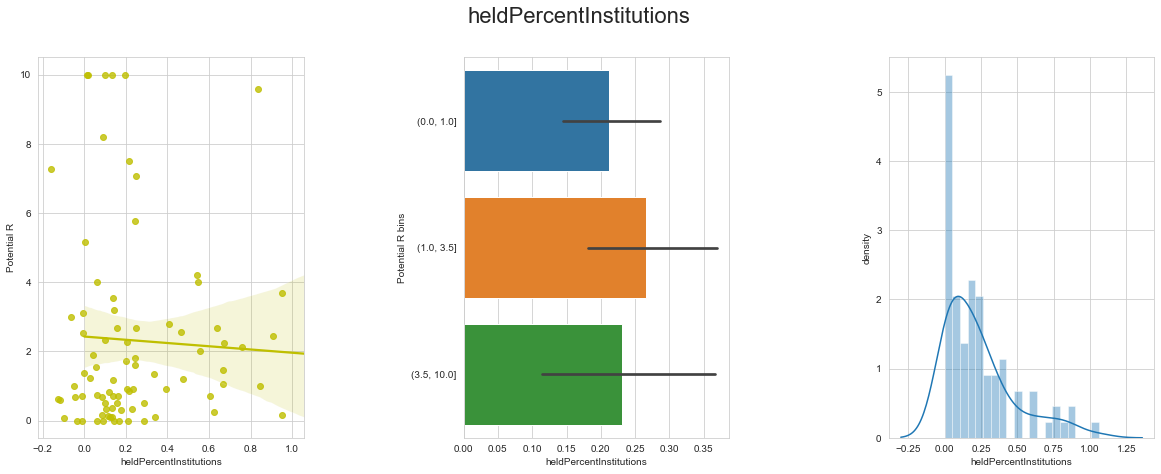

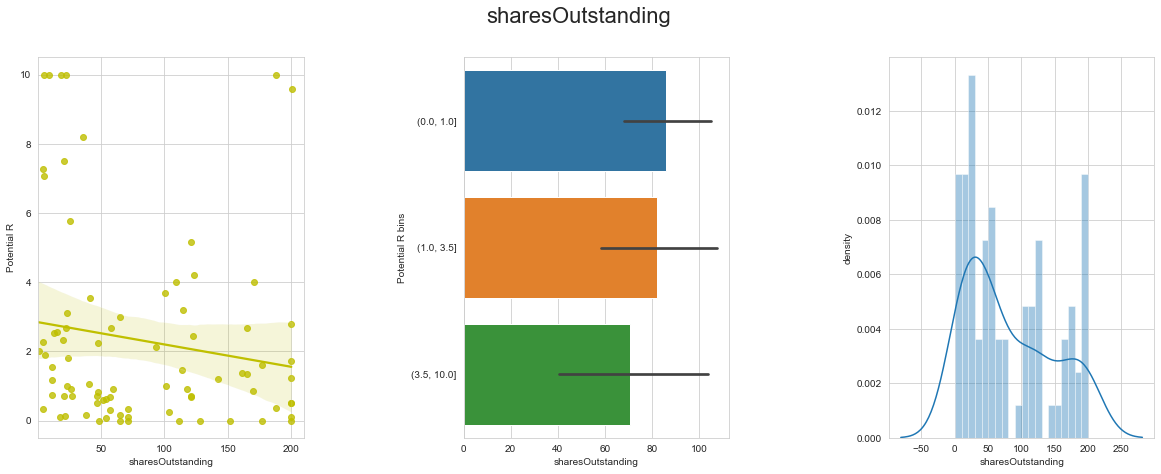

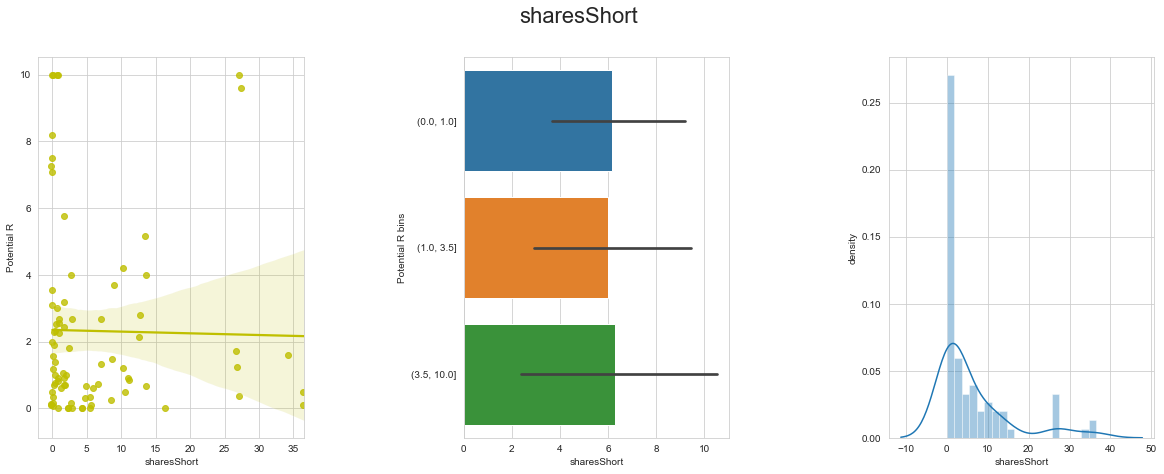

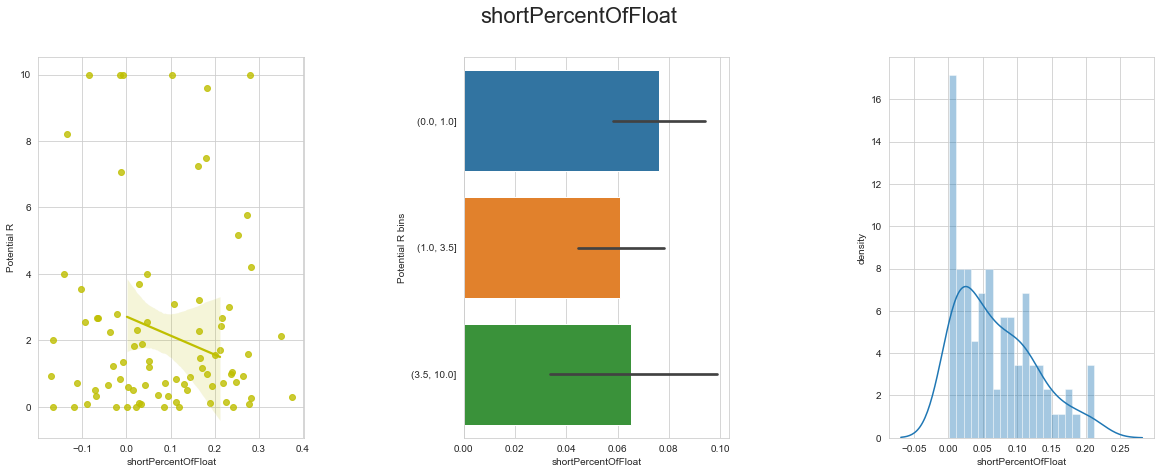

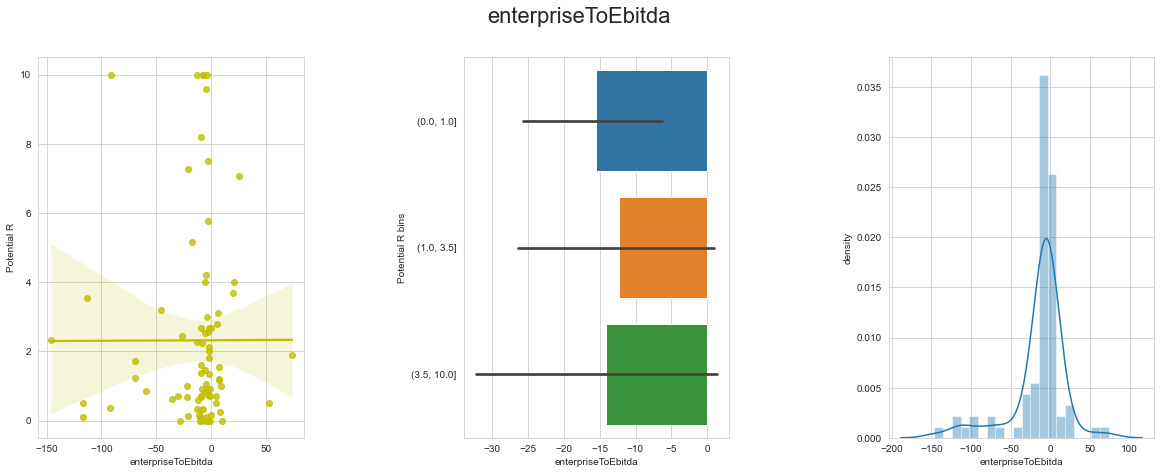

In [33]:
# round the values to 3 number after the decimal point.
plot_df = fundamentals.copy().round(3)

# create a df for plotting
plot_df = plot_df.merge(train[["Date","Symbol","Num","Potential R","Exit R","Potential R bins"]]
                        ,on = ["Date","Symbol"], how = "inner")
plot_df = plot_df.sort_values(by = ["Potential R bins"])
plot_df["Potential R bins"]=plot_df["Potential R bins"].apply(lambda x: str(x))

columns = ['floatShares',
       'heldPercentInsiders', 'heldPercentInstitutions', 'marketCap',
       'netIncomeToCommon', 'sharesOutstanding', 'sharesShort',
       'shortPercentOfFloat', 'enterpriseToEbitda']

# plot the relevant columns
for col in columns:
    ap.regPlot(col,plot_df)

<a id=5.4.2></a>
#### 5.4.2) Discrete Values

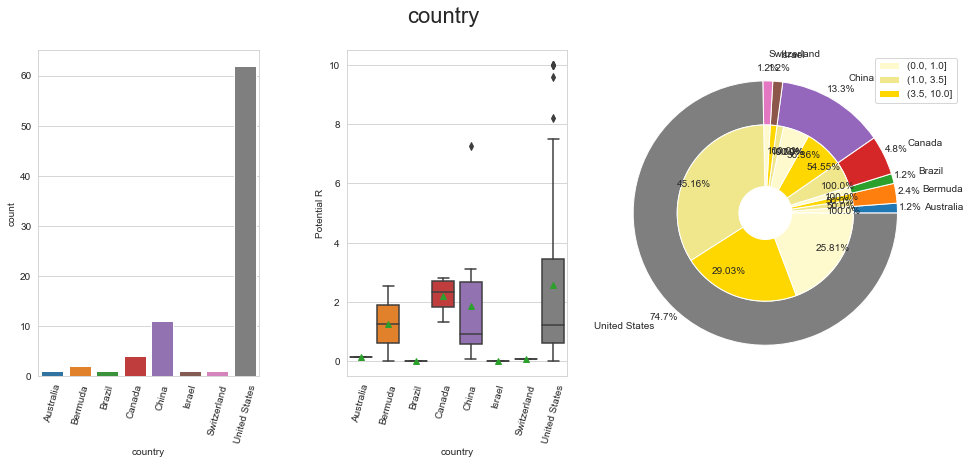

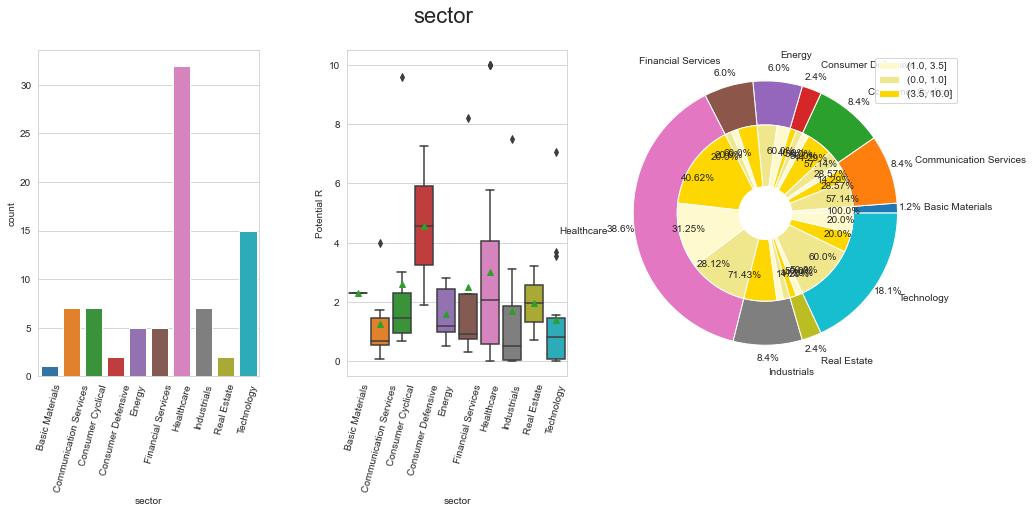

In [34]:
columns = ["country","sector"]

for col in columns:
    ap.disPlot(col,plot_df)

##### Data Adjustments:

country - Combine all countires excluding 'United States' and 'China'

sector - The data is unfairly distributed between the 10 sectors which may effect the models with overfitting, additionaly as infered from the plot, there is no clear relationship with 'Potential R' which we decide to drop and discontinue with the given feaute.

In [35]:
fundamentals['country'] = fundamentals['country'].apply(lambda x: "Other" if (x!='United States' and x!='China') else x)
fundamentals = fundamentals.drop(columns = ['sector'])

##### Plot the changes.

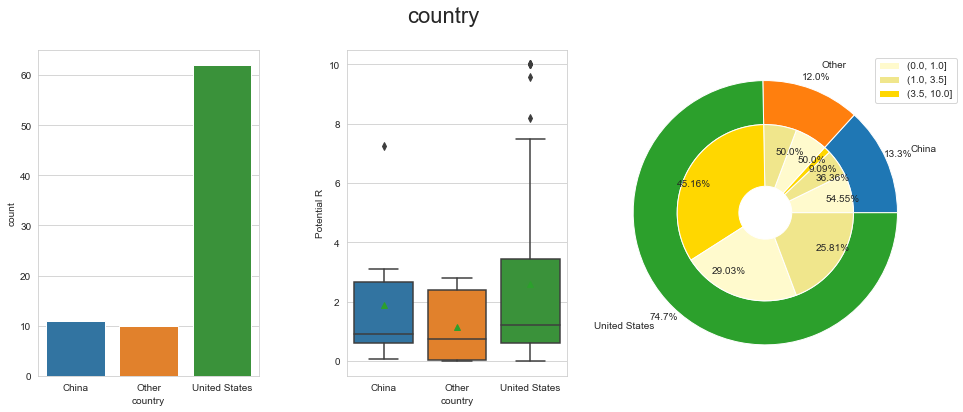

In [36]:
plot_df = fundamentals.copy().round(3)

# create a df for plotting.
plot_df = plot_df.merge(train[["Date","Symbol","Num","Potential R","Exit R","Potential R bins"]]
                        ,on = ["Date","Symbol"], how = "inner")
plot_df = plot_df.sort_values(by = ["Potential R bins"])
plot_df["Potential R bins"]=plot_df["Potential R bins"].apply(lambda x: str(x))

# create a list with the discrete value features.
ap.disPlot("country",plot_df)


####  Inference

* We find it very difficult to infere from the continuous features. The regression line scatter plot exhibits in all features a flat regression line with no clear bias from the scattered observations. Looking at the bins the results are also unclear, most features have similar means for  each bin, but those who don't posses a confidence inteval that includes all other means leaving us with a question mark regarding their relationship with the target variabels.


* The trade's country which is the only discrete fundamental feature (after deleting 'sector') leaves us also with an uncertain view. Although 'United States' clearly outperforms the rest, the rest lack enough data, each catagory posses only 10 observations which is not enough to make assumptions.

<a id=5.5></a>

### 5.5) Derivatives

<a id=5.5.1></a>
#### 5.5.1) Continuous Values

In [37]:
derivatives.describe()


Num  Week Change  Month Change  spy_Week Change  \
count  125.000000   125.000000    125.000000       125.000000   
mean    63.000000    13.151089     12.549398         0.408241   
std     36.228442    27.000671     40.786213         1.444139   
min      1.000000   -32.403097    -81.706637        -2.679470   
25%     32.000000    -3.157892    -11.515148        -0.445047   
50%     63.000000     7.945205      4.100235         0.519656   
75%     94.000000    19.277112     25.088032         1.316783   
max    125.000000   153.117788    168.085125         2.875107   

       spy_Month Change         Gap     spy_Gap  Sum Volume at Entry  \
count        125.000000  125.000000  125.000000         1.250000e+02   
mean           3.384230    7.527995    0.020855         1.296062e+07   
std            2.699339    9.422845    0.436944         1.673007e+07   
min           -2.243789  -10.697680   -1.248087         3.727310e+05   
25%            1.017931    1.740642   -0.155528         2.053477e+06   
50%            3.450160    4.316320    0.076628         5.572361e+06   
75%            5.935599    9.489051    0.315622         1.568699e+07   
max            6.906607   53.291529    0.714145         7.213935e+07   

            RV 66     VWAP rd  
count  125.000000  125.000000  
mean    15.789080    1.286831  
std     19.297128    0.218627  
min      0.427000    1.007752  
25%      2.401000    1.125541  
50%      4.843000    1.216216  
75%     25.030000    1.379310  
max     64.370000    2.129278

In [38]:
derivatives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Symbol               125 non-null    object        
 1   Num                  125 non-null    int64         
 2   Date                 125 non-null    datetime64[ns]
 3   Week Change          125 non-null    float64       
 4   Month Change         125 non-null    float64       
 5   spy_Week Change      125 non-null    float64       
 6   spy_Month Change     125 non-null    float64       
 7   Gap                  125 non-null    float64       
 8   spy_Gap              125 non-null    float64       
 9   Sum Volume at Entry  125 non-null    int64         
 10  RV 66                125 non-null    float64       
 11  VWAP rd              125 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 11.8+ KB


##### Change the type from numpy.float64 to a regular float.

In [39]:

derivatives[["Gap","spy_Gap","RV 66","VWAP rd"]] = derivatives[["Gap","spy_Gap","RV 66","VWAP rd"]].apply(pd.to_numeric)

In [40]:
derivatives.head(5)

Symbol  Num       Date  Week Change  Month Change  spy_Week Change  \
0   CPRX    1 2021-03-22    14.536345      4.100235        -1.090454   
1   KXIN    2 2021-03-22     3.603607    -19.953594        -1.090454   
2    SDH    3 2021-03-22    14.888334      0.871459        -1.090454   
3   JFIN    4 2021-03-24   153.117788     89.948008        -0.894735   
4   PIXY    5 2021-03-24     6.643359    -13.841808        -0.894735   

   spy_Month Change        Gap   spy_Gap  Sum Volume at Entry   RV 66  \
0         -0.520317   4.576666  0.141211              1969671   2.401   
1         -0.520317   0.000000  0.141211              2619817   1.849   
2         -0.520317   2.207503  0.141211               502028   4.260   
3          1.017931   6.822610  0.385109              2450613   1.340   
4          1.017931  12.546122  0.385109               775357  11.468   

    VWAP rd  
0  1.051051  
1  1.125541  
2  1.092077  
3  1.109756  
4  1.062500

##### Plot the features.

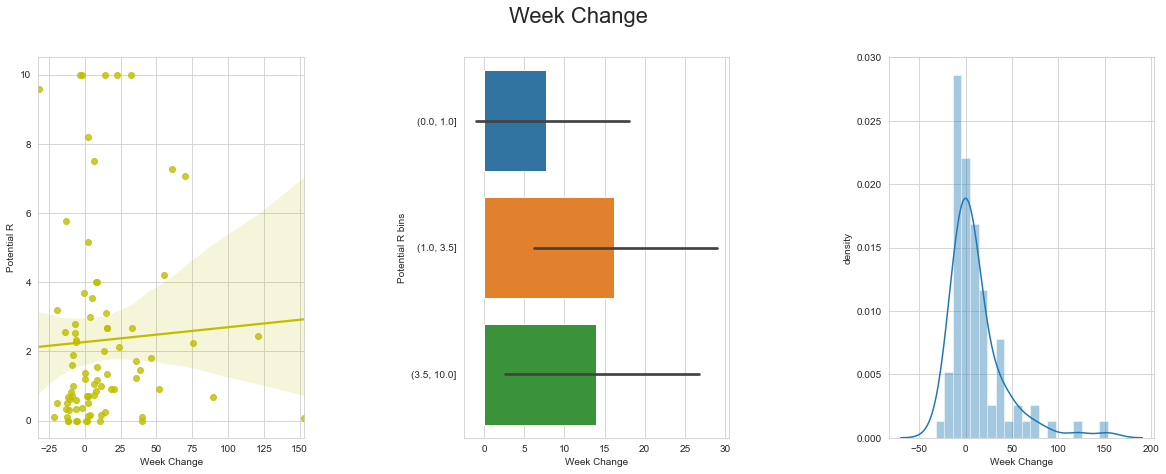

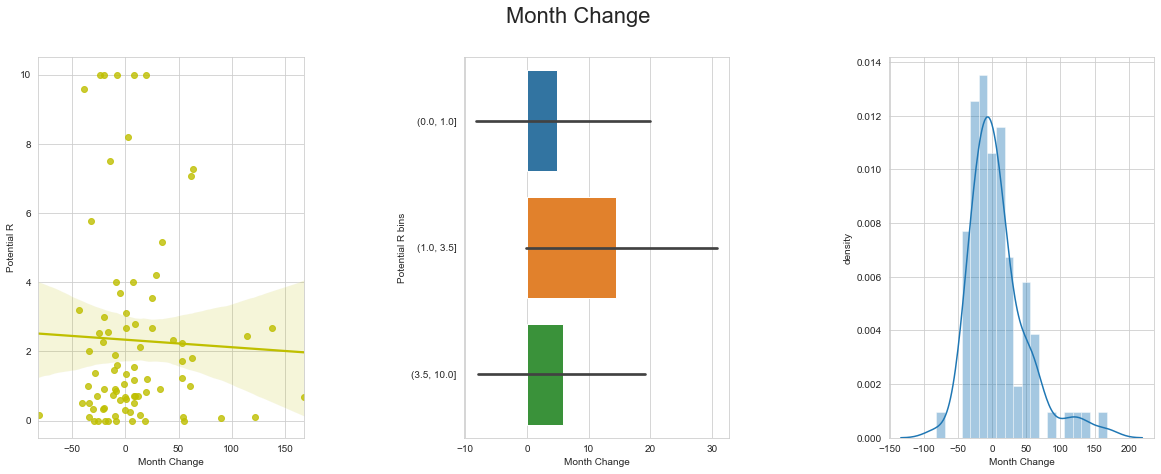

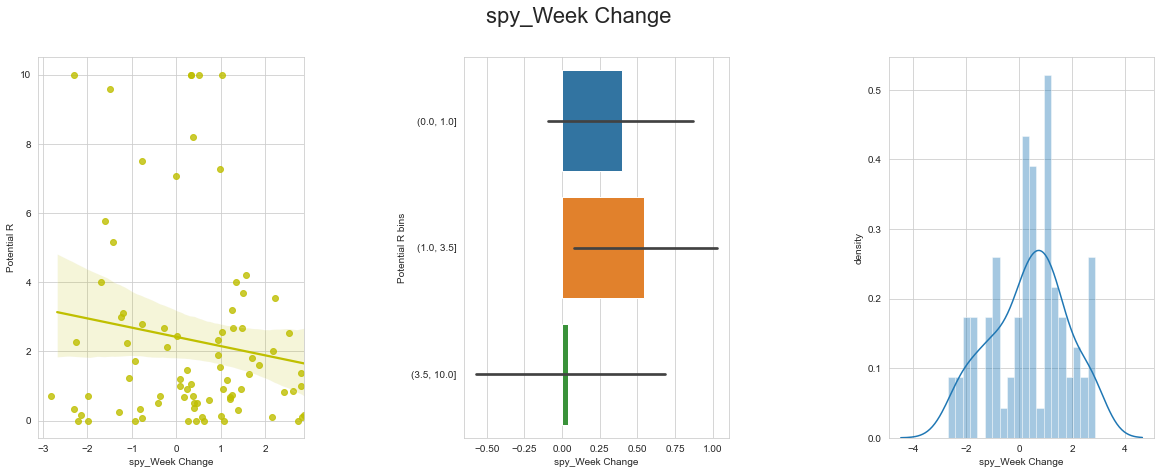

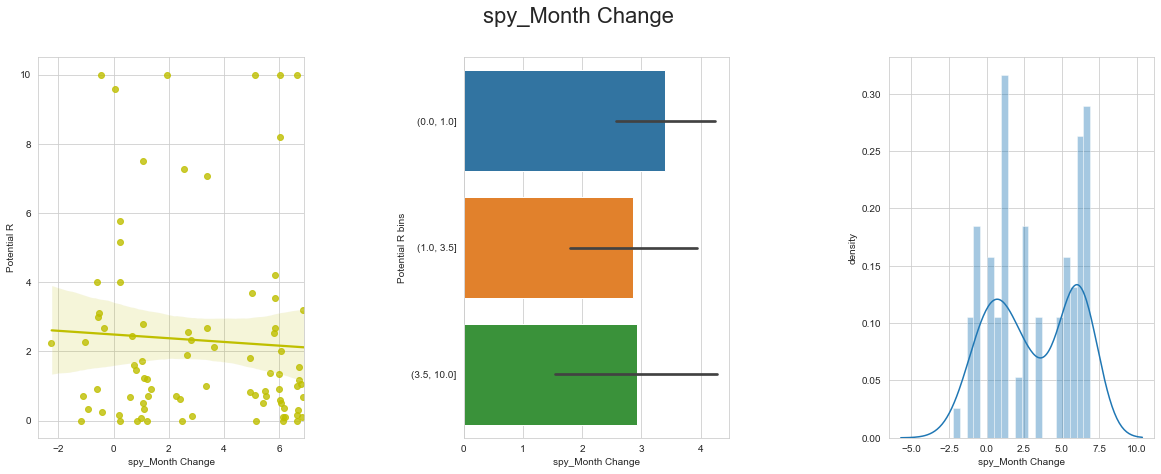

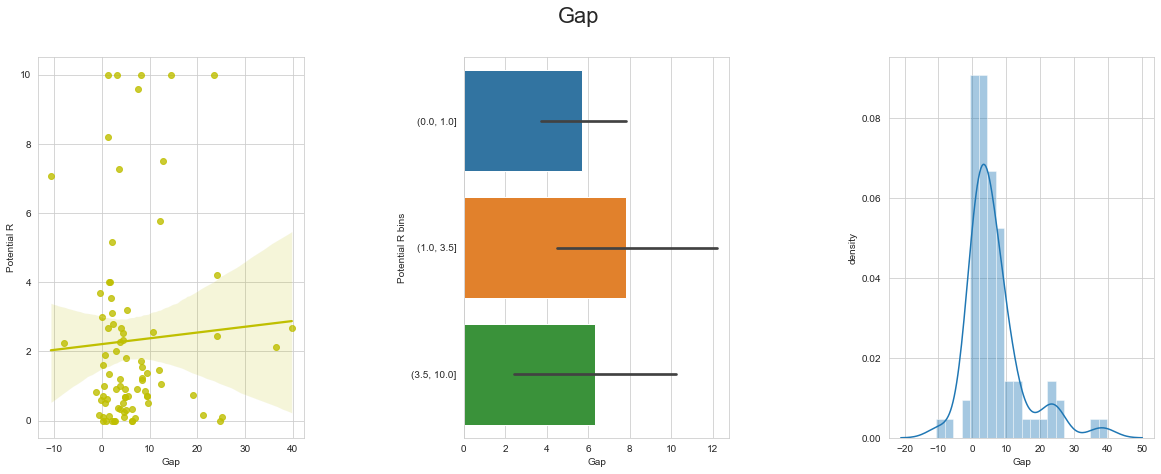

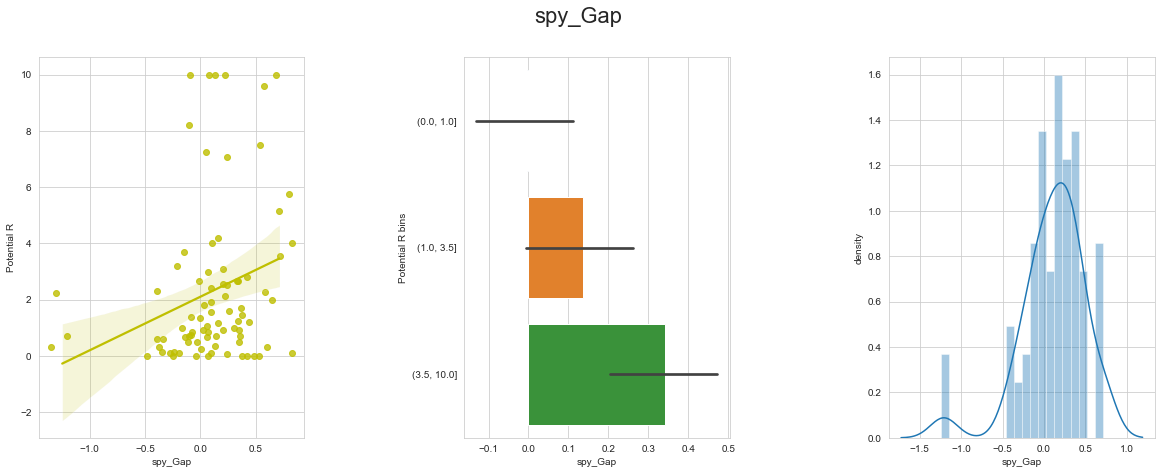

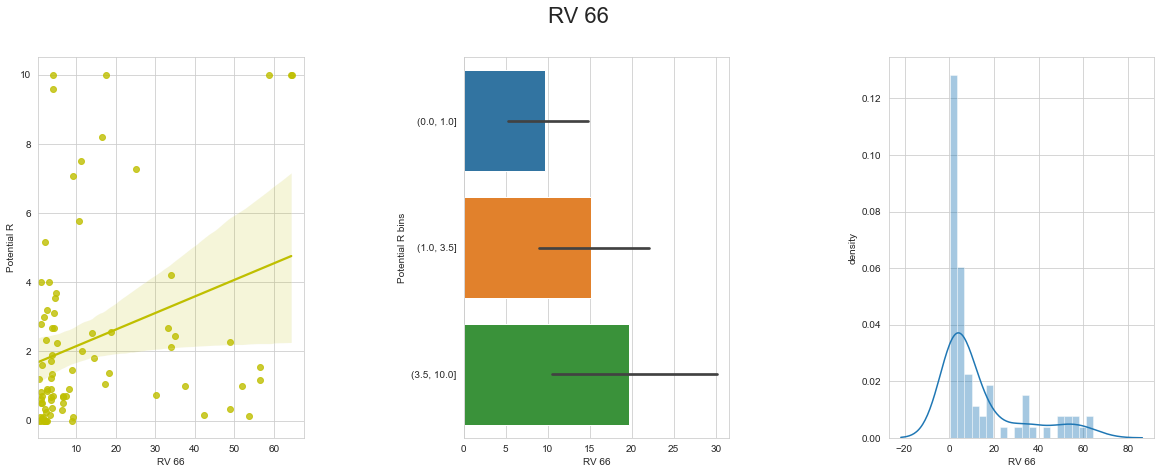

In [41]:
plot_df = derivatives.copy()

columns = plot_df.drop(columns = ["Symbol","Num","Date"]).columns

plot_df = plot_df.merge(train[["Num","Potential R","Exit R","Potential R bins"]],on = ["Num"], how = "inner")
plot_df = plot_df.sort_values(by = ["Potential R bins"])
plot_df["Potential R bins"] = plot_df["Potential R bins"].apply( lambda x: str(x))

for col in columns:
    ap.regPlot(col,plot_df)



####  Inference

The features that stood out the most are 'spy_Gap' and 'RV 66'. in 'spy_Gap' the higher the daily gap in SPY the better the performance, this could be explained by the optimisim the SPY brings to the markets, if SPY is going up especially before the trading day starts it may imply more buying power distributed around the whole market.

'RV 66' is relative volume, it takes the currnet daily volume and divides it by the 66 day volume average.  The stocks with trades with high 'RV 66' have a higher 'Potential R'. A high 'RV 66' is normally correlated with good news or a strong industry.

<a id=6></a>

## 6) Preprocessing

As seen in the EDA section some features seem to have no impact on the target variables, here we would like to filter some of the features creating a framework for modeling.

We will use 2 methods for feature dimensionality reduction and later compare the 2 methods in the Modeling section:

- PCA

- Random Forest

#### Prepare the data for preprocessing and separate train to X_train and y_train_reg for regression and y_train_clf for classification, do the same with test: X_test, X_test_reg, X_test_clf.


In [42]:
train1 = train.merge(fundamentals, on = ["Date","Symbol"])
test1 = test.merge(fundamentals, on = ["Date","Symbol"])


train1 = train1.merge(core_data[["VWAP Tag","Num","Catalyst","Pattern"]],on = ["Num"])
test1 = test1.merge(core_data[["VWAP Tag","Num","Catalyst","Pattern"]] ,on = ["Num"])

train1 = train1.merge(derivatives.drop(columns = ["Symbol","Date"]), on = ["Num"])
test1 = test1.merge(derivatives.drop(columns = ["Symbol","Date"]), on = ["Num"])   

train1 = train1.drop(columns = ["Symbol","Date","Exit R","train"]).set_index('Num')
test1 = test1 .drop(columns = ["Symbol","Date","Exit R","train"]).set_index('Num')

train1["Potential R bins"] = train1["Potential R bins"].apply(lambda x: str(x))
test1["Potential R bins"] = test1["Potential R bins"].apply(lambda x: str(x))

X_train = train1.drop(columns = ["Potential R bins","Potential R"])
y_train_reg = train1[["Potential R"]]
y_train_clf = train1[["Potential R bins"]]

X_test = test1.drop(columns = ["Potential R bins","Potential R"])
y_test_reg = test1[["Potential R"]]
y_test_clf = test1[["Potential R bins"]]

<a id=6.1></a>

### 6.1) PCA

PCA is a popular approach for deriving a low-dimensional set of features from a large set. It summarizes the features to a smaller set that collectively explain most of the variability in the original set. Each feature computed by PCA is a linear combination of all the original features and is called a Principle Component. The first component take the all of the original feature normalizes them and creates a linear combination that has the largest variance, the second principle component does the same while contraining its direction to be othogonal to the direction of the first principle components the ame method is used for the third and the rest of the princinple components. eventually from a dataset of p features we get a dataset with q features-principle components where p>q and the PCA dataset captures most of the information within the original dataset.

This is method proved to be an efficient tool for reducing a dataset's dimensionality, however the main disadvatage of this method is the difficulty to interpretable the features since their form has comletely transformed.

In this project we will attempt to apply this method of dimenionaly reduction both on the regression and the classification problem.

##### Data Standardizer function.

In [43]:
# This function standardizes the data
# arguments:
# tran: the train dataset
# test: the test data set
# encoder: which encoding to use for the catagorial features, default is label, otherwise one-hot encoding.

def scaler(train,test,encoder = 'label'):
    
    # create separate lists for the categorial features and the continuous features.
    cat_features = train.select_dtypes(exclude = ["number"]).columns
    con_features = train.select_dtypes(include = ["number"]).columns
    
    temp_train = train.copy()
    temp_test = test.copy()
    
    
    # if the encoder is label encoder
    if encoder=='label':
         
        # label encode the catagorial features.
        for f in cat_features:
            lben = LabelEncoder().fit(train[f])
            temp_train[f] = lben.transform(train[f])
            temp_test[f] =lben.transform(test[f]) 
            
        # fit the train data and transform the train and the test.
        scaler = StandardScaler().fit(temp_train)
        temp_train[temp_train.columns] = scaler.transform(temp_train)
        temp_test[temp_test.columns] =scaler.transform(temp_test) 
    
    # if the encoder is one-hot
    else:
        ohe = OneHotEncoder().fit(X_train[cat_features])
        columns = []

        # one-hot encode the data
        for i in range(len(cat_features)):
            for j in range(len(ohe.categories_[i])):
                
                columns.append(cat_features[i]+"_"+ohe.categories_[i][j])

        temp_train[columns] =  ohe.transform(train[cat_features]).toarray()
        temp_test[columns] = ohe.transform(test[cat_features]).toarray()
        
        # fit the train data and transform the train and the test.                
        scaler = StandardScaler().fit(temp_train[con_features])
        temp_train[con_features] = scaler.transform(temp_train[con_features])
        temp_test[con_features] =scaler.transform(temp_test[con_features]) 
        
        temp_train = temp_train.drop(columns = cat_features)
        temp_test = temp_test.drop(columns = cat_features)
    
    return [temp_train,temp_test]

##### PCA exploration, explore the cumulative explained variance and the show the first few princimple components

In [44]:

# preprocess the data with standardizing
pca_train = scaler(X_train,X_test)[0]
df1_reg = X_train.join(y_train_reg,on  = [X_train.index])

#call pca
pca = PCA()
pca.fit_transform(pca_train)

exp_var_cumul1 = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure()


fig.add_trace(go.Scatter(x=[*range(1, exp_var_cumul1.shape[0] + 1)], y=exp_var_cumul1, fill='tozeroy',mode='markers', name='with label encoder')) # fill down to xaxis
fig.update_layout(
    title="Explained Variance",
    xaxis_title="n Components",
    yaxis_title="Cumulative Explained Variance",
    legend_title="Legend Title",
    font=dict(size=10))
fig.show()


#plot the pca results for the data with label endcoder with 6 components

n_components = 6
pca = PCA(n_components=n_components)
components = pca.fit_transform(pca_train)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels['color'] = 'Median Price'

total_var = pca.explained_variance_ratio_.sum() * 100
labels['color'] = 'Potential R'
fig1 = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(n_components),
    color=df1_reg['Potential R'],
    color_continuous_scale="algae",
    title=f'Total Explained Variance - 6 components: {total_var:.2f}%',)
fig1.update_layout(font=dict(size=7,))
fig1.update_traces(diagonal_visible=False)
fig1.show()

#### Inference

* The First 10 components capture 80% of the variance.


<a id=6.2></a>

### 6.2) Random Forest 

Another method for feature selection is Random Forest Feature Importance. Random Forest uses bootstap for classification by creating n different trees for every bootstrap sample, the advantage of Random Forest in our case is due to the low number of observations. Random Forest trys to compensate for the lack of data using n bootstrap samples and applying a decision tree (or any other algorithm) on each bootstrap sample, the model eventually chooses the class that has been predicted by most decision trees and returns it.\
Random Forest is also knows for being able to grade the features based on the mean decrease in the Gini index (decrease in impurity). Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.\

Random Forest Feature importance is also a great tool for interpretability, using it can clarify which features are important and effect the trade's outcome the most, as opposed to which ones have a random effect on the outcome. This is important because we do not want to treat the problem as a black box, we wish to understand the underlying drives of the market to potentially expands other features in future projects.


In this section we build a function which take the data and applies feature selection on the data and plots the result.
We will use this function to feature select a range of possible reduction percentages of the features where 0% means no feature selection and 90% keeps 10% of the features with the best Gini index score.

It is important to note that prior to applying this method it is required to one-hot encode all the categorial features because because if we label encode the catagories it loses each categories' distinction as a result of treating the numerical labels as continuous values.



##### A function for discretizing numerical values with n number of bins.

In [45]:
### this function fits a discretized data transofrmation for the continous features on the train dataset and then transofrms 
### bo the the train and the test data sets for future modeling

def discretizerFit(X_train,X_test,n_bins,plot = False):
    
    cat_features = X_train.select_dtypes(exclude = ["number"]).columns
    con_features = X_train.select_dtypes(include = ["number"]).columns
    
    temp_train = X_train.copy()
    temp_test = X_test.copy()
    
    new_train = pd.DataFrame()
    new_test = pd.DataFrame()
        
    if 0!=len(con_features):
        dis = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='quantile')    
        est = dis.fit(X_train[con_features])
        columns = []
        for i in range(len(con_features)):        
            n = est.n_bins_[i]

            for j in range(n):
                left = round(est.bin_edges_[i][j],2)
                right = round(est.bin_edges_[i][j+1],2)
                col = con_features [i]+"_(" +str(left) + " - " + str(right)+")"   
                columns.append(col) 

        new_train[columns]  = pd.DataFrame(data = est.transform(X_train[con_features]),columns = columns)
        new_test[columns]  = pd.DataFrame(data = est.transform(X_test[con_features]),columns = columns)
    if 0!=len(cat_features):
        ohe = OneHotEncoder().fit(X_train[cat_features])
        columns = []

        for i in range(len(cat_features)):
            for j in range(len(ohe.categories_[i])):                
                columns.append(cat_features[i]+"_"+ohe.categories_[i][j])

        new_train[columns] = pd.DataFrame(data =  ohe.transform(X_train[cat_features]).toarray(),columns = columns)
        new_test[columns] = pd.DataFrame(data = ohe.transform(X_test[cat_features]).toarray(),columns = columns)

    new_train = new_train.set_index(X_train.index)
    new_test = new_test.set_index(X_test.index)
    
    return [new_train,new_test]    

In [46]:

# This reduces dimensionaly with random forest feature importance.
# arguments: 
# X_train - train data
# y_train - target variable of the train data
# X_test - test data
# percent_reduction - the precent of the total amount of feature to reduce  e.g. 0.5
# plot - True to plot else Flase not to plot, default = True
def DimensionReductionRF(X_train,y_train,X_test,percent_reduction = 0.5,plot = True):
    
    
    df3_clf = X_train.join(y_train,on  = [X_train.index])
    

    classifiers = []

    classifiers.append(RandomForestClassifier(random_state=random_state))

    
    clf_name = ["Random Forest"]
    
    i=0

    x = df3_clf
    feature_grade = pd.DataFrame()
    for clf in classifiers:

        importances = pd.DataFrame()
        importances['columns'] = X_train.columns


        model = clf.fit(df3_clf[X_train.columns],df3_clf["Potential R bins"])

        importances['feature_importance'] = model.feature_importances_


        importances = importances.sort_values(by=['feature_importance']).reset_index(drop=True)

        importances['Grade'] = importances.index
        importances = importances.set_index('columns')

        feature_grade = feature_grade.add(importances,fill_value=0)

        importances = importances.reset_index()
        if plot == True:
            plt.figure(figsize=(25, 17))
            g=sns.barplot(y="columns", x="feature_importance", data=importances).set_title(clf_name[i] + ' - Feature Importance',fontsize=30)
        i=1+i

    feature_grade = feature_grade.sort_values(by=['Grade']).reset_index()

    
    reduction_bar = round(len(feature_grade)*(1-percent_reduction))
    selected_features_grade  = feature_grade.tail(reduction_bar)
    
    if plot ==True:
        
        plt.figure(figsize=(15, 9))


        g=sns.barplot(y="columns", x="feature_importance", data=selected_features_grade).set_title('Selected Features',fontsize=30)    


    new_X=X_train[selected_features_grade['columns']].copy()
    new_test=X_test[selected_features_grade['columns']].copy()
    
    return [ new_X,new_test]

##### An example application of Random Forest feature selection with one-hot encoding the discrete features and reducing 75% of the features.

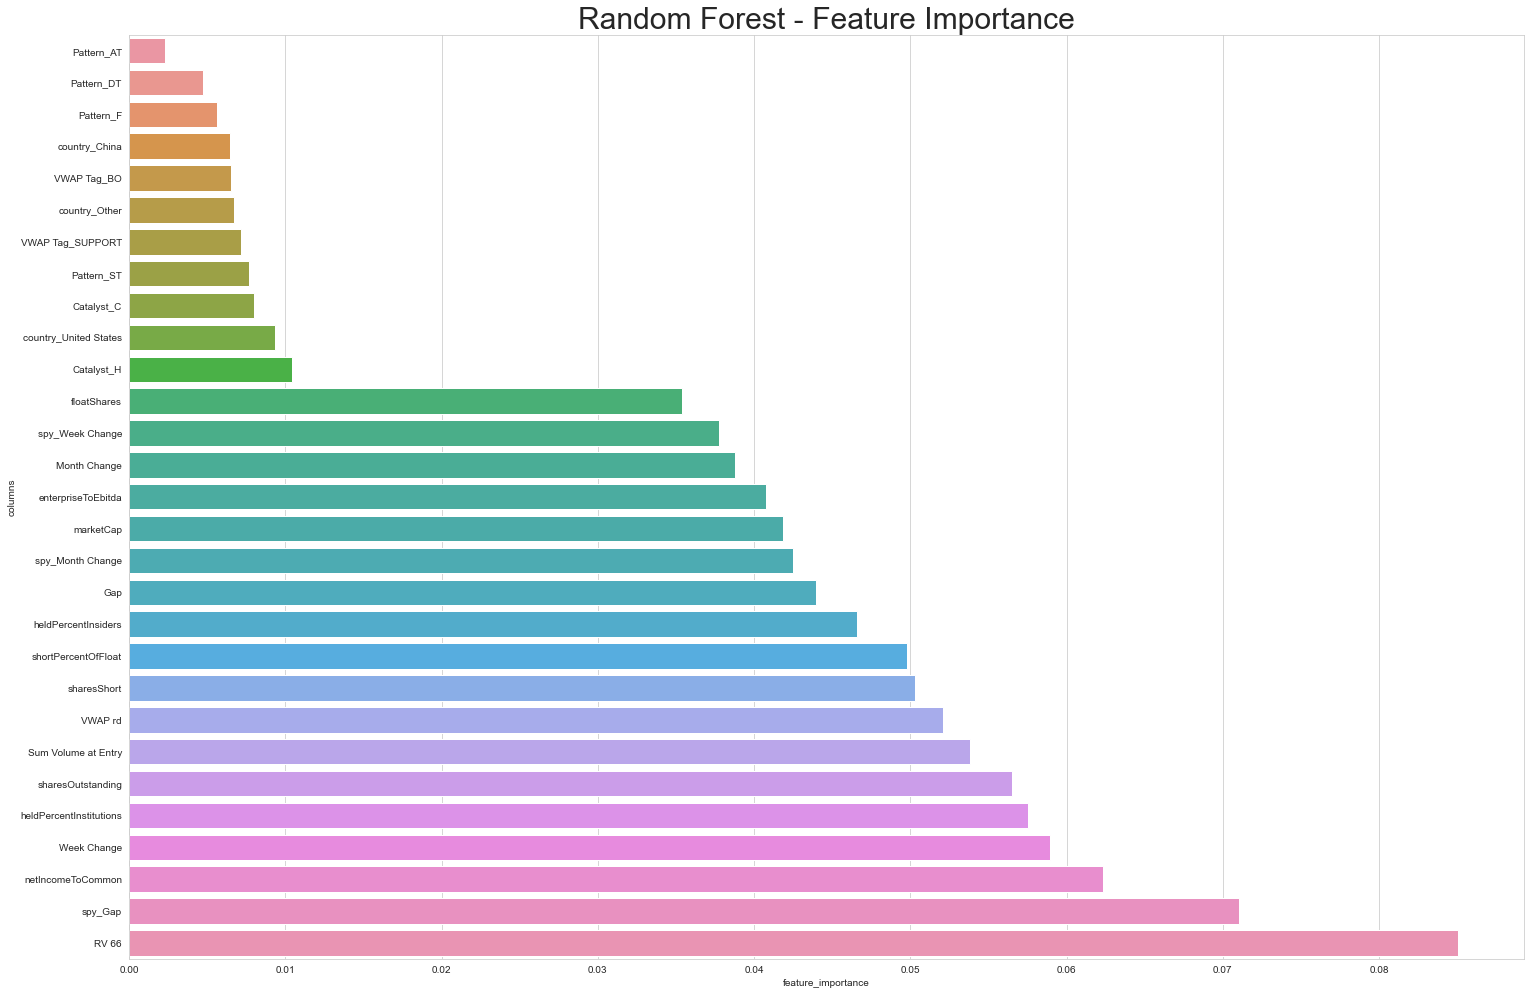

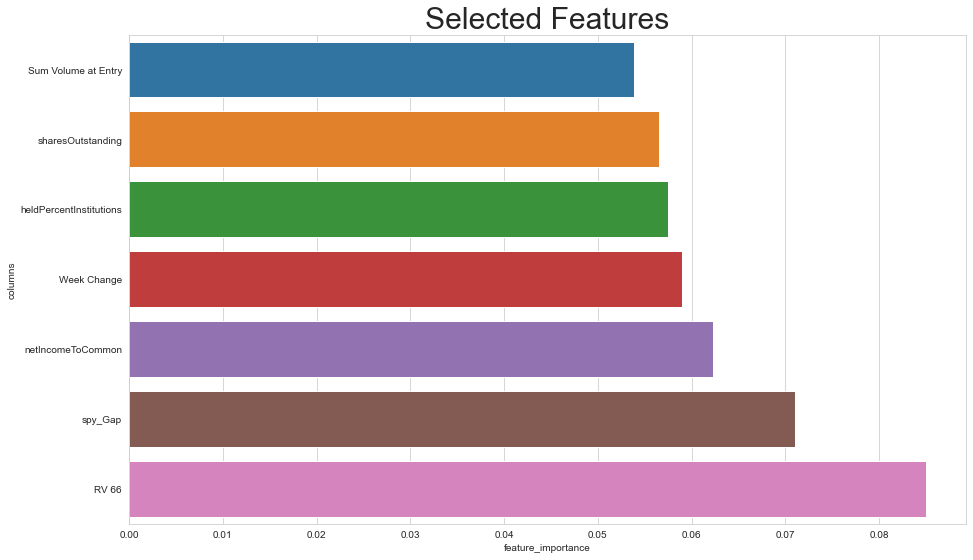

In [47]:

cat_features = X_train.select_dtypes(exclude = ["number"]).columns
X_train1 = X_train.copy()
X_test1 = X_test.copy()



dis_df= discretizerFit(X_train[cat_features],X_test[cat_features],n_bins=3)

# drop the original columns
X_train1 = X_train1.drop(columns= cat_features)
X_test1 = X_test1.drop(columns= cat_features)

# add the one-hot encoded columns
X_train1[dis_df[0].columns] = dis_df[0]
X_test1[dis_df[1].columns] = dis_df[1]


x= DimensionReductionRF(X_train1,y_train_clf,X_test1,percent_reduction = 0.75)

#### Inference

We are witnessing a noticeable difference between the one-hot encoded cataegorial features (Catalyst_H, Catalyst_C, country_China etc.) and the continuous features. This may be due to the difference in the type of each feature, continuous and binary. If we go back to the EDA section we see that some categorial features such as 'Catalyst' do impact the result, 'Catalyst' includes the catagories 'C' and 'H' where 'C' had a noticeable positive impact on 'Potential R'. However in the feature importance visualization it is clear that 'C' does not posses such influence as infered. It may be wrong to come to this conclusion but since all of the categroial features have consistenly lower importance is it imperative redefine the feature selection in a more equal manner between all features. Thus all continuous features will be discretized using n bins and then one-hot encoded. 

The next cell plots an example.

##### An example application of Random Forest feature selection with discretizing and one-hot encoding the continuous values with 3 bins as well as the discrete features and reducing 75% of the features.

In [48]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()



dis_df= discretizerFit(X_train,X_test,n_bins=3)


X_train1 = dis_df[0]

X_test1 = dis_df[1]


x= DimensionReductionRF(X_train1,y_train_clf,X_test1,percent_reduction = 0.75)

As seen in the plot above the feature are distributed in a balanced manner and catagories such as 'Catalyst_H' and 'Pattern_ST' now deliver a higher importance than before. This preprocessing method will be applied using a range of bins to fit the best model.

<a id=7></a>

## 7) Modeling

In this section we apply the machine learning algorithms on the different preprocessed data forms. In each problem ,regression or classification, first the data will go through a different preprocessing  then the dimension will be reducted and lastly fitting with the algorithm. The results will then be compared using visualization and the model  with the best score will be used for the test data.










<a id=7.1></a>

### 7.1) Classification

* PCA: The discrete features will be label encoded and then the whole dataset (all features) will be standardized. The algorithms will be tested on different configurations of PCA, each configuration will contain a different number of principal components. In this manner the configurations will cover a range of 70% - 90% of the variance depending on the amount of components.

* Random Forest: As we saw in the previous section, it is crucial to process the data in a  way that it is one-hot encoded, meaning we first discreteize the continuous features. The discretizing will be performed using a range of 3-7 bins each bin option will be applied on all continuous features thus leaving us with 5 different configuration for data discretizing. Once the dataset is composed of discrete features only we will one-hot encode the whole dataset. This way the data will go through feature selection using the Random Forest Feature Importance. For each configuration we'll reduce 0%, 50%, 75%, 90%, 95% and 99% of the features to see which returns the best results.


#### Performance Metrics

The performance metric used for this calssification problem is precision. which delivers the percent true positive classification out of all poisitive classes. for example if our data includes 30 observation of which only 15 are of class 'A', then the precision is equal to X/15 where X is the number of correct classifications made by the model.

$ \ \ \ \ \ \ \ \ \ \ \ \ Precision = \frac {TP}{TP \ + \ FP}$
$ \ \ \ \ \ \ \ \ \ \ \ \ TP + FP = P = Positive$

Because our problem involves a multi-calss classification problem and some of the algorithms do not work with multi-class problems we introduce a method called One-VS-Rest. It involves splitting the multi-class dataset into multiple binary classification problems. An algorithm is trained separately for each class against the rest with no distinction between the other classes. An observation is assigned to the predicted class that returns the highest score. The global presicion score is calculatted using the sum of all precisions of each class multiplying by a weight that represents its fraction of the total data:

$ Global \  Precision = \frac {TP_{Class \ 1} \cdot W_{Class \ 1} }{TP_{Class \ 1} \ + \ FP_{Class1 \ }} + \frac {TP_{Class \ 2}\cdot W_{Class \ 2}}{TP_{Class \ 2} \ + \ FP_{Class \ 2}} + \frac {TP_{Class \ 3}\cdot W_{Class \ 3}}{TP_{Class \ 3} \ + \ FP_{Class \ 3}} ...   \frac {TP_{Class \ n}\cdot W_{Class \ n}}{TP_{Class \ n} \ + \ FP_{Class \ n}}$

In our case a global precision score is for all classes in 'Potential R bins' and the weights are the fraction of each class's  count by the total count of observations.


#### Threshold Random Score

The Threshold Random Score is the probability precision considering a random class selection, To explain this threshold we'll illustrate the following problem:

Consider the set of classes 'A','B' and 'C' which we are trying to predict.
Given a sample of observations where 0.7, 0.2 and 0.1 are relative frequencys of each class respetively. Thus if we  randomly get an observation then our assumptions are that the distributions are also the probabilities 0.7,0.2 and 0.1  respectively. Knowing that, if we had to randomly guess a certain amount of data the pprecision of doing so will be:

- for class A: $ \ \ \ \ \ P( \  TP_{A} \ out \  of \  Class \ A \ ) = P(  \ TP_{A} \ | P_{A} )=\frac {0.7^{2}}{0.7}$

- for class B:$ \ \ \ \ \ P( \  TP_{B} \ out \  of \  Class \ B \ ) = P(  \ TP_{B} \ | P_{B})=\frac {0.2^{2}}{0.2}$

- for class C: $ \  \ \ \ \ P( \  TP_{C} \ out \  of \  Class \ C \ ) = P(  \ TP_{C} \ | P_{C} )=\frac {0.1^{2}}{0.1}$

$ \ \ \ \ \ \ \ \ \ \ \ \ W_{1} =  \ 0.7$
$ \ \ \ \ \ \ \ \ \ \ \ \ W_{2} =  \ 0.2$
$ \ \ \ \ \ \ \ \ \ \ \ \ W_{3} =  \ 0.1$

$ \ \ \ \ \ \ \ \ \ \ \ \ Random \ Score =  \frac {0.7^{2} \cdot W_{1}}{0.7} +  \frac {0.2^{2} \cdot W_{2}}{0.2} +  \frac {0.1^{2} \cdot W_{3}}{0.1} = 0.54$

So any precision scores from the models with a percision under 0.54 will be considered useless.


Back to the original problem.
In our problem train data acts as the sample and the relative frequencys of each class in 'Potential R bins' are also the probabilities.




##### Create the algorithm arsenal for classification.

In [49]:
random_state = 3


# A dictionary with the calssification algorithms
classifier_dict = {}

classifier_dict["SVC"]=SVC(random_state=random_state)
classifier_dict["Ada Boost"]=AdaBoostClassifier(random_state=random_state)
classifier_dict["Random Forest"]=RandomForestClassifier(random_state=random_state)
classifier_dict["Extra Trees"] = ExtraTreesClassifier(random_state=random_state)
classifier_dict["Decision Tree"] = DecisionTreeClassifier(random_state=random_state)
classifier_dict["Logistic Regression"] =LogisticRegression(random_state=random_state)
classifier_dict["Naive Bayes"] =GaussianNB()
classifier_dict["KNN"] =KNeighborsClassifier()
classifier_dict['MLPClassifier']= MLPClassifier(max_iter = 1000,random_state=random_state)

# A dictionary with the algorithm parameter for tuning
classifier_grid_dict = {}
classifier_grid_dict["SVC"] = {'estimator__kernel':('linear','poly', 'rbf', 'sigmoid'),'estimator__degree':[2,3]}
classifier_grid_dict["Ada Boost"] = {'estimator__learning_rate':np.arange(0.1,1.1,0.1)}
classifier_grid_dict["Random Forest"] = { 'estimator__criterion':["gini","entropy"],'estimator__min_samples_split' : np.arange(2,20,1),'estimator__min_samples_leaf': np.arange(1,20)}
classifier_grid_dict["Extra Trees"]  = { 'estimator__criterion':["gini","entropy"],'estimator__min_samples_split' : np.arange(2,20,1),'estimator__min_samples_leaf': np.arange(1,20)}
classifier_grid_dict['Decision Tree'] = { 'estimator__criterion':["gini","entropy"],'estimator__min_samples_split' : np.arange(2,20,1),'estimator__min_samples_leaf': np.arange(1,20)}
classifier_grid_dict["Logistic Regression"] = {'estimator__C':[0.001,.009,0.01,.09,1,5]}
classifier_grid_dict["Naive Bayes"] ={}
classifier_grid_dict["KNN"] ={'estimator__weights':('uniform', 'distance') }
classifier_grid_dict['MLPClassifier'] = {
                    'estimator__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                    'estimator__activation': ['tanh', 'relu'],
                    'estimator__solver': ['sgd', 'adam'],
                    'estimator__alpha': [0.0001, 0.05],
                    'estimator__learning_rate': ['constant','adaptive']}

##### Compute the Random Score.

In [50]:
# threshold Score
threshold_score = 0
for count in y_train_clf.value_counts():
    
    ratio = count/len(y_train_clf)
    threshold_score += ratio*ratio
threshold_score = round(threshold_score,2)

print("The Random Score in this calssification problem is:")
print(threshold_score)

The Random Score in this calssification problem is:
0.37


In [51]:

# create a dataframe for the results
cv_all = pd.DataFrame()

#number of folds for the cross validation
kfold = 5


############ PCA #######################
pca_train = scaler(X_train,X_test)[0]


# fit the pca
pca = PCA().fit(pca_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

#get the number of components with variance 70%-90%
best_n_components =[]
for i in range(len(exp_var_cumul)):
    if (exp_var_cumul[i]>= 0.7) and (exp_var_cumul[i]<= 0.9):
        best_n_components.append(i+1)
        
        
        
cv_reduction = pd.DataFrame(columns =["CrossValMeans","CrossValerrors","Algorithm","PC's","Dimension Reduction Method"])       
cv_reduction = cv_reduction.append({"CrossValMeans":threshold_score
                          ,"CrossValerrors":0
                          ,"Algorithm":'Random Score'
                          ,"PC's":'Threshold - Random Score'
                          ,"Dimension Reduction Method": None},ignore_index = True )

#iterate over the set of chosen number of componenets
for n in best_n_components:    
    pca = PCA(n_components=n)
    X_train1 = pca.fit_transform(pca_train)
    cv_results = []

    # apply One vs Rest
    for clf in classifier_dict :
        algo_ovsr = OneVsRestClassifier(classifier_dict[clf])
        cv_results.append(cross_val_score(algo_ovsr, X_train1, y =  y_train_clf.values.flatten(),scoring = "precision_weighted", cv = kfold))

    # get the CV means
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    # plot the results  
    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std
                            ,"Algorithm":["SVC","Ada Boost","Random Forest","Extra Trees","Decision Tree"
                            ,"Logistic Regression","Naive Bayes",'KNN','MLPClassifier'],"PC's":n
                          ,"Dimension Reduction Method": 'PCA'})        
    cv_reduction = pd.concat([cv_reduction,cv_res])


fig1 = px.bar(cv_reduction, x="CrossValMeans", y="Algorithm",
            color="PC's", barmode='group',
            height=550, title="CV-percision means for PC's capturing 70%-90% of variance")


fig1.show()  
cv_all = pd.concat([cv_reduction,cv_all])

########################## Decision Tree feature selection ################### 

# use 3-7 bins ti discretize the continuous features
for n in range(3,8):
    
    #call the discretizing function
    dis = discretizerFit(X_train,X_test,n_bins=n)    
    X_train1 = dis[0]
    X_test1 = dis[1]    
    cv_reduction = pd.DataFrame()    
    cv_reduction = cv_reduction.append({"CrossValMeans":threshold_score
                            ,"CrossValerrors":0
                            ,"Algorithm":'Threshold - Random Score'
                            ,"dimension reduction percent":'Threshold - Random Selection'
                            ,"bins": n ,"Dimension Reduction Method": None},ignore_index = True )
    
    # iterate of a given list of percent feature reductions
    for percent_reduction in [0,0.25,0.5,0.75,0.9,0.95,0.97,0.99]: 
        
        #call the Random Forest dimenion reduction function
        dr = DimensionReductionRF(X_train1,y_train_clf,X_test1,percent_reduction = percent_reduction,plot = False)
        
        X_train2 = dr[0]
        X_test2 = dr[1]
        
        
        # fit the algorthms
        cv_results = []
        test_scores=[]
        train_scores=[]

        for clf in classifier_dict :
            algo_ovsr = OneVsRestClassifier(classifier_dict[clf])
            cv_results.append(cross_val_score(algo_ovsr, X_train2, y =  y_train_clf.values.flatten(), scoring = "precision_weighted", cv = kfold))
            algo_ovsr_fit =  algo_ovsr.fit(X_train2,y_train_clf.values.flatten())
            prediciton_test =algo_ovsr_fit.predict(X_test2)
            precision_result = precision_score(y_test_clf.values.flatten(),prediciton_test,average = 'weighted',zero_division = 0)
            test_scores.append(precision_result)


            train_results =algo_ovsr_fit.score(X_train2,y_train_clf.values.flatten())

    
            train_scores.append(train_results)
        
        # get the CV precision means
        cv_means = []
        cv_std = []
        for cv_result in cv_results:
            cv_means.append(cv_result.mean())
            cv_std.append(cv_result.std())

        cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC","Ada Boost","Random Forest","Extra Trees","Decision Tree",
                                    "Logistic Regression",'Naive Bayes',"KNN",'MLPClassifier']
                      ,"dimension reduction percent" :str(percent_reduction)
                      ,"bins":n
                      ,"Dimension Reduction Method": 'Random Forest'})
        cv_reduction = pd.concat([cv_reduction,cv_res])
    
    # plot the results
    fig = px.bar(cv_reduction, x="CrossValMeans", y="Algorithm",
             color='dimension reduction percent', barmode='group',
             height=550, title="CV-percision means with continuous features discretized with n = "+ str(n))
    cv_all = pd.concat([cv_all,cv_reduction])

    fig.show()


##### Get the 10 best models, and present them.

In [52]:
best_10_CVmeans = cv_all.sort_values(by=('CrossValMeans'),ascending=False).head(10).reset_index(drop = True)

best_10_CVmeans

CrossValMeans CrossValerrors            Algorithm PC's  \
0       0.666432       0.065582  Logistic Regression  NaN   
1       0.656598       0.029252        Decision Tree  NaN   
2       0.646707        0.10648          Extra Trees  NaN   
3       0.643537       0.105475        MLPClassifier  NaN   
4       0.643232       0.100465        Decision Tree  NaN   
5       0.641621       0.074566          Extra Trees  NaN   
6       0.639457       0.100753        Decision Tree  NaN   
7       0.637397          0.119  Logistic Regression  NaN   
8       0.635268       0.087392        MLPClassifier  NaN   
9       0.627690       0.074933  Logistic Regression  NaN   

  Dimension Reduction Method  bins dimension reduction percent  
0              Random Forest   6.0                         0.9  
1              Random Forest   5.0                         0.9  
2              Random Forest   3.0                        0.75  
3              Random Forest   3.0                         0.9  
4              Random Forest   6.0                         0.9  
5              Random Forest   5.0                         0.9  
6              Random Forest   6.0                        0.75  
7              Random Forest   7.0                        0.75  
8              Random Forest   7.0                         0.9  
9              Random Forest   7.0                         0.5

In [53]:
best_10_CVmeans

CrossValMeans CrossValerrors            Algorithm PC's  \
0       0.666432       0.065582  Logistic Regression  NaN   
1       0.656598       0.029252        Decision Tree  NaN   
2       0.646707        0.10648          Extra Trees  NaN   
3       0.643537       0.105475        MLPClassifier  NaN   
4       0.643232       0.100465        Decision Tree  NaN   
5       0.641621       0.074566          Extra Trees  NaN   
6       0.639457       0.100753        Decision Tree  NaN   
7       0.637397          0.119  Logistic Regression  NaN   
8       0.635268       0.087392        MLPClassifier  NaN   
9       0.627690       0.074933  Logistic Regression  NaN   

  Dimension Reduction Method  bins dimension reduction percent  
0              Random Forest   6.0                         0.9  
1              Random Forest   5.0                         0.9  
2              Random Forest   3.0                        0.75  
3              Random Forest   3.0                         0.9  
4              Random Forest   6.0                         0.9  
5              Random Forest   5.0                         0.9  
6              Random Forest   6.0                        0.75  
7              Random Forest   7.0                        0.75  
8              Random Forest   7.0                         0.9  
9              Random Forest   7.0                         0.5

### 7.2) Hyper Parameter Tuning - Classification 

The 10 best models from the last cells will go through hyper-parameter tuning to maximize the score for the train data.
For hype-parameter tuning we use scikit learn's grid search function.
After we find the tuned model with the best score we will present the results and compare it with the results from the regression problem.

In [54]:
%%time

tuned_best_models=best_10_CVmeans

best_scores = []
estimators =[]   


for index, row in best_10_CVmeans.iterrows():   
    bins = int(row['bins'])
    
    # if binning method is used - continuous values discretizing
    if not np.isnan(bins):

        per_reduction =float(row['dimension reduction percent'] )
        algo  = row['Algorithm']
        dis = discretizerFit(X_train,X_test,n_bins=bins)   
        dr = DimensionReductionRF(dis[0],y_train_clf,dis[1],percent_reduction = per_reduction,plot = False)  
        algo_fit = OneVsRestClassifier(classifier_dict[algo]) 
        
        # grid search over the parameter 
        clf = GridSearchCV(algo_fit, param_grid =classifier_grid_dict[algo],n_jobs = -1, scoring = "precision_weighted")
        grid_result = clf.fit(dr[0],y_train_clf.values.flatten())

        # get the score results
        prediction_result = grid_result.predict(dr[1])
        precision_result = precision_score(y_test_clf.values.flatten(),prediction_result,average = 'weighted',zero_division = 1)
        test_results = clf.score(dr[1],y_test_clf.values.flatten())

       # test_scores.append(precision_result)
        # append the data in lists

        estimators.append(grid_result.best_estimator_)

        best_scores.append(grid_result.best_score_)
    

 # create a designated df for the tuned models   
tuned_best_models=best_10_CVmeans  

# store the lists in a new df
tuned_best_models['grid best train scores'] = best_scores
tuned_best_models['estimators'] = estimators


Wall time: 2min 52s


##### Tuned 10 best models .

In [55]:
tuned_best_models1 = tuned_best_models.sort_values(by ='grid best train scores' ).reset_index(drop = True)
tuned_best_models1 = tuned_best_models1


In [56]:
tuned_best_models1

CrossValMeans CrossValerrors            Algorithm PC's  \
0       0.627690       0.074933  Logistic Regression  NaN   
1       0.641621       0.074566          Extra Trees  NaN   
2       0.643537       0.105475        MLPClassifier  NaN   
3       0.646707        0.10648          Extra Trees  NaN   
4       0.637397          0.119  Logistic Regression  NaN   
5       0.635268       0.087392        MLPClassifier  NaN   
6       0.639457       0.100753        Decision Tree  NaN   
7       0.666432       0.065582  Logistic Regression  NaN   
8       0.656598       0.029252        Decision Tree  NaN   
9       0.643232       0.100465        Decision Tree  NaN   

  Dimension Reduction Method  bins dimension reduction percent  \
0              Random Forest   7.0                         0.5   
1              Random Forest   5.0                         0.9   
2              Random Forest   3.0                         0.9   
3              Random Forest   3.0                        0.75   
4              Random Forest   7.0                        0.75   
5              Random Forest   7.0                         0.9   
6              Random Forest   6.0                        0.75   
7              Random Forest   6.0                         0.9   
8              Random Forest   5.0                         0.9   
9              Random Forest   6.0                         0.9   

   grid best train scores                                         estimators  
0                0.627690  OneVsRestClassifier(estimator=LogisticRegressi...  
1                0.641621  OneVsRestClassifier(estimator=ExtraTreesClassi...  
2                0.643537  OneVsRestClassifier(estimator=MLPClassifier(ma...  
3                0.646707  OneVsRestClassifier(estimator=ExtraTreesClassi...  
4                0.651564  OneVsRestClassifier(estimator=LogisticRegressi...  
5                0.656448  OneVsRestClassifier(estimator=MLPClassifier(ac...  
6                0.673697  OneVsRestClassifier(estimator=DecisionTreeClas...  
7                0.678702  OneVsRestClassifier(estimator=LogisticRegressi...  
8                0.687197  OneVsRestClassifier(estimator=DecisionTreeClas...  
9                0.697782  OneVsRestClassifier(estimator=DecisionTreeClas...

In [57]:

tuned_best_models1 = tuned_best_models1.sort_values(by ='grid best train scores' ).reset_index()
tuned_best_models1

index  CrossValMeans CrossValerrors            Algorithm PC's  \
0      0       0.627690       0.074933  Logistic Regression  NaN   
1      1       0.641621       0.074566          Extra Trees  NaN   
2      2       0.643537       0.105475        MLPClassifier  NaN   
3      3       0.646707        0.10648          Extra Trees  NaN   
4      4       0.637397          0.119  Logistic Regression  NaN   
5      5       0.635268       0.087392        MLPClassifier  NaN   
6      6       0.639457       0.100753        Decision Tree  NaN   
7      7       0.666432       0.065582  Logistic Regression  NaN   
8      8       0.656598       0.029252        Decision Tree  NaN   
9      9       0.643232       0.100465        Decision Tree  NaN   

  Dimension Reduction Method  bins dimension reduction percent  \
0              Random Forest   7.0                         0.5   
1              Random Forest   5.0                         0.9   
2              Random Forest   3.0                         0.9   
3              Random Forest   3.0                        0.75   
4              Random Forest   7.0                        0.75   
5              Random Forest   7.0                         0.9   
6              Random Forest   6.0                        0.75   
7              Random Forest   6.0                         0.9   
8              Random Forest   5.0                         0.9   
9              Random Forest   6.0                         0.9   

   grid best train scores                                         estimators  
0                0.627690  OneVsRestClassifier(estimator=LogisticRegressi...  
1                0.641621  OneVsRestClassifier(estimator=ExtraTreesClassi...  
2                0.643537  OneVsRestClassifier(estimator=MLPClassifier(ma...  
3                0.646707  OneVsRestClassifier(estimator=ExtraTreesClassi...  
4                0.651564  OneVsRestClassifier(estimator=LogisticRegressi...  
5                0.656448  OneVsRestClassifier(estimator=MLPClassifier(ac...  
6                0.673697  OneVsRestClassifier(estimator=DecisionTreeClas...  
7                0.678702  OneVsRestClassifier(estimator=LogisticRegressi...  
8                0.687197  OneVsRestClassifier(estimator=DecisionTreeClas...  
9                0.697782  OneVsRestClassifier(estimator=DecisionTreeClas...

In [58]:



tuned_best_models1['Model'] = tuned_best_models1.apply(lambda x: x['Algorithm']+"_"+str(int(x['bins']))
                                                      +" bins_"+str(x['dimension reduction percent']) + " feature reduction",axis =1)

fig = px.bar(tuned_best_models1, x='Model', y="grid best train scores",range_y = [0.6,0.8],
              color = 'Model',
             height=550, title="Tuned 10 best models")


fig.show()


In [59]:
tuned_best_models1

index  CrossValMeans CrossValerrors            Algorithm PC's  \
0      0       0.627690       0.074933  Logistic Regression  NaN   
1      1       0.641621       0.074566          Extra Trees  NaN   
2      2       0.643537       0.105475        MLPClassifier  NaN   
3      3       0.646707        0.10648          Extra Trees  NaN   
4      4       0.637397          0.119  Logistic Regression  NaN   
5      5       0.635268       0.087392        MLPClassifier  NaN   
6      6       0.639457       0.100753        Decision Tree  NaN   
7      7       0.666432       0.065582  Logistic Regression  NaN   
8      8       0.656598       0.029252        Decision Tree  NaN   
9      9       0.643232       0.100465        Decision Tree  NaN   

  Dimension Reduction Method  bins dimension reduction percent  \
0              Random Forest   7.0                         0.5   
1              Random Forest   5.0                         0.9   
2              Random Forest   3.0                         0.9   
3              Random Forest   3.0                        0.75   
4              Random Forest   7.0                        0.75   
5              Random Forest   7.0                         0.9   
6              Random Forest   6.0                        0.75   
7              Random Forest   6.0                         0.9   
8              Random Forest   5.0                         0.9   
9              Random Forest   6.0                         0.9   

   grid best train scores                                         estimators  \
0                0.627690  OneVsRestClassifier(estimator=LogisticRegressi...   
1                0.641621  OneVsRestClassifier(estimator=ExtraTreesClassi...   
2                0.643537  OneVsRestClassifier(estimator=MLPClassifier(ma...   
3                0.646707  OneVsRestClassifier(estimator=ExtraTreesClassi...   
4                0.651564  OneVsRestClassifier(estimator=LogisticRegressi...   
5                0.656448  OneVsRestClassifier(estimator=MLPClassifier(ac...   
6                0.673697  OneVsRestClassifier(estimator=DecisionTreeClas...   
7                0.678702  OneVsRestClassifier(estimator=LogisticRegressi...   
8                0.687197  OneVsRestClassifier(estimator=DecisionTreeClas...   
9                0.697782  OneVsRestClassifier(estimator=DecisionTreeClas...   

                                               Model  
0   Logistic Regression_7 bins_0.5 feature reduction  
1           Extra Trees_5 bins_0.9 feature reduction  
2         MLPClassifier_3 bins_0.9 feature reduction  
3          Extra Trees_3 bins_0.75 feature reduction  
4  Logistic Regression_7 bins_0.75 feature reduction  
5         MLPClassifier_7 bins_0.9 feature reduction  
6        Decision Tree_6 bins_0.75 feature reduction  
7   Logistic Regression_6 bins_0.9 feature reduction  
8         Decision Tree_5 bins_0.9 feature reduction  
9         Decision Tree_6 bins_0.9 feature reduction

##### Pick the model with the best 'grid best train scores' .

In [60]:
best_model = tuned_best_models1.sort_values(by ='grid best train scores' ).tail(1)
best_model

index  CrossValMeans CrossValerrors      Algorithm PC's  \
9      9       0.643232       0.100465  Decision Tree  NaN   

  Dimension Reduction Method  bins dimension reduction percent  \
9              Random Forest   6.0                         0.9   

   grid best train scores                                         estimators  \
9                0.697782  OneVsRestClassifier(estimator=DecisionTreeClas...   

                                        Model  
9  Decision Tree_6 bins_0.9 feature reduction

##### Present the features in the chosen model before and after dimensionaly reduction and apply the models on the test data.

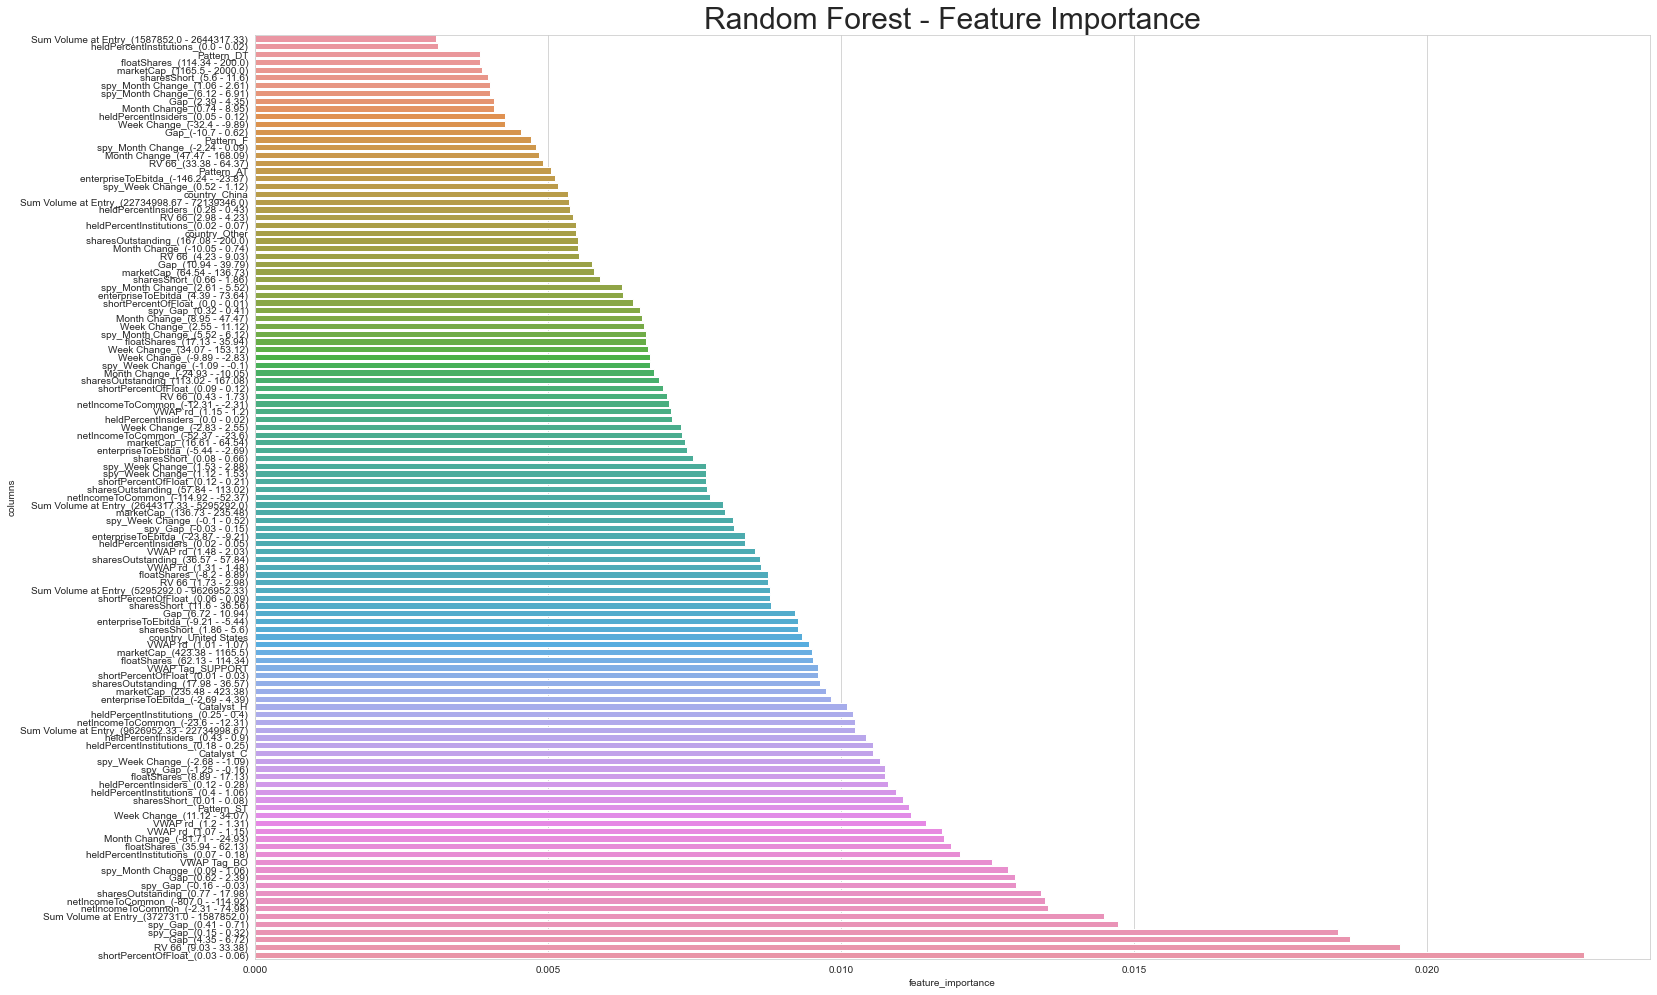

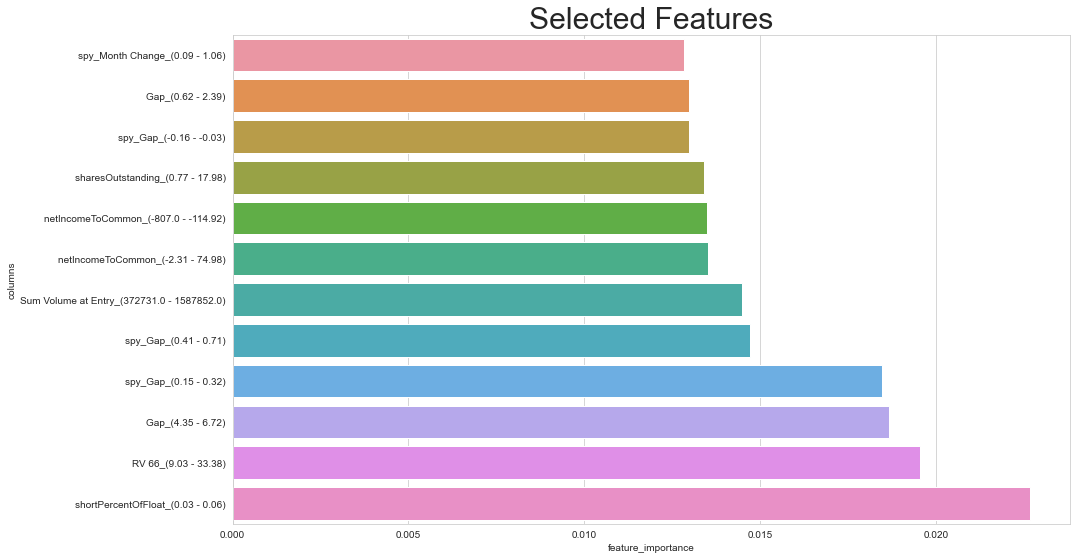

In [61]:

        
        
bins = int(best_model['bins'].values[0])
per_reduction =float(best_model['dimension reduction percent'].values[0])
best_estimator = best_model['estimators'].values[0]

dis = discretizerFit(X_train,X_test,n_bins=bins)       
dr = DimensionReductionRF(dis[0],y_train_clf,dis[1],percent_reduction = per_reduction,plot = True) 


#### Present the Confusion Matrix of the test data

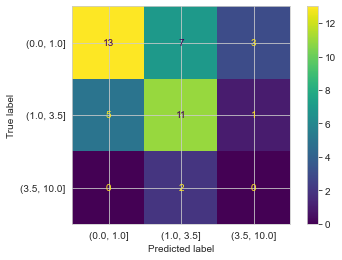

Precision:
0.618


In [62]:
plot_confusion_matrix(best_estimator , dr[1], y_test_clf.values.flatten())

plt.show() 

   
best_fit = best_estimator.fit(dr[0],y_train_clf.values.flatten())
best_prediciton = best_fit.predict(dr[1])


precision_score = precision_score(y_test_clf.values.flatten(),best_prediciton,average = 'weighted',zero_division =0)
print("Precision:")
print(round(precision_score,3))

<a id=7.2></a>

### 7.2) Regression - Risk Reward Ratio (R)

In this section we will apply the regression models on the train and test data using a list of regression algorithms, here the target variable is 'Potential R'.

* Non-PCA Dimensionality Reduction: Similar to the classification but here we do not use the Random Forest feature selection becasue in section 6 we saw that applying Random Forest feature selection may falsley manipulate the data because of the noticeable difference bettwen the categorial features importances and the contiuous feature importances, where the continuous ones had substantially more impact accoring the Random Forest. Instead we use a generic scikit learn function - SelectKBest. SelectKBest removes all by the k highest scoring features, we apply SeletKbest with a list of 5,10,12,15 and max features. Before applying SelectKBest we standardize the continuous values. The discrete features leave us with 2 options, either label encode or one-hot encode, therefore we decided to check them both and compare.



* PCA: As in the classification section, here we apply PCA to the data in the same manner as in the classification section, the only difference is that the problem is a regression the the target variable is 'Potential R'.

#### Performance Metrics

The metric used for the scoring system is $R^{2} $.



##### Create an algorithm arsenal for regression.

In [63]:
from sklearn.neural_network import MLPRegressor

regressor_dict = {}
regressor_dict["Lasso"]=Lasso(random_state=random_state)
regressor_dict["Ridge"]=Ridge(random_state=random_state)
regressor_dict['Random Forest Regression']=RandomForestRegressor(random_state=random_state)
regressor_dict["Extra Trees Regression"] = ExtraTreesRegressor(random_state=random_state)
regressor_dict["Regression Tree"] = DecisionTreeRegressor(random_state=random_state)
regressor_dict["Linear Regression"] =LinearRegression()
regressor_dict["SVR"] =SVR()
regressor_dict["Polynomial Regression ^ 2"] =LinearRegression()
regressor_dict["Polynomial Regression ^ 3"] =LinearRegression()
regressor_dict["MLPRegressor"] = MLPRegressor(random_state=random_state)


classifier_grid_dict = {}



In [64]:
kfold = 5

for encoder in ['label','one hot']:
    scaled=scaler(X_train,X_test,encoder = encoder)
    X_train1 = scaled[0]
    X_test1 = scaled[1]
    
    cv_all = pd.DataFrame(columns =["CrossValMeans","CrossValerrors","Algorithm","k of best features"])



    for k in [5,10,12,15,len(X_train.columns)]:
        cv_results = []
        for clf in regressor_dict :
            X_train2 = SelectKBest( k=k).fit_transform(X_train1, y_train_reg.values.flatten())


            cv_score = cross_val_score(regressor_dict[clf], X_train2, y =  y_train_reg.values.flatten(),scoring = 'r2', cv = kfold)

            cv_results.append(cv_score)
        cv_means = []
        cv_std = []
        for cv_result in cv_results:
            cv_means.append(cv_result.mean())
            cv_std.append(cv_result.std())

        cv_res= pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                           "Algorithm":["Lasso","Ridge",'Random Forest Regression',"Extra Trees Regression"
                            ,"Regression Tree","Linear Regression","SVR","Polynomial Regression ^ 2"
                            ,"Polynomial Regression ^ 3","MLPRegressor"],"k of best features":k})


        cv_all = pd.concat([cv_all,cv_res])


    fig = px.bar(cv_all, x="CrossValMeans", y="Algorithm", barmode='group',color = "k of best features"
                    ,height=550, title="CV R^2 means for k best feautures with " + encoder + " encoder")


    fig.show()

cv_all = pd.DataFrame(columns =["CrossValMeans","CrossValerrors","Algorithm","PC's"])


#################################################   PCA ########################################

pca_train = scaler(X_train,X_test)[0]

pca = PCA().fit(pca_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
best_n_components =[]
for i in range(len(exp_var_cumul)):
    if (exp_var_cumul[i]>= 0.7) and (exp_var_cumul[i]<= 0.9):
        best_n_components.append(i+1)

for n in best_n_components:    
    pca = PCA(n_components=n)
    X_train1 = pca.fit_transform(pca_train)
    cv_results=[]
    for clf in regressor_dict:
        cv_score = cross_val_score(regressor_dict[clf], X_train1, y =  y_train_reg.values.flatten(),scoring = 'r2', cv = kfold)
        cv_results.append(cv_score)        
        cv_means = []        
        cv_std = []
        
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                    "Algorithm":["Lasso","Ridge",'Random Forest Regression',"Extra Trees Regression"
                        ,"Regression Tree","Linear Regression","SVR","Polynomial Regression ^ 2"
                        ,"Polynomial Regression ^ 3","MLPRegressor"]
                    ,"PC's":n})


    cv_all = pd.concat([cv_all,cv_res])


fig = px.bar(cv_all, x="CrossValMeans", y="Algorithm",
            color="PC's", barmode='group',
            height=550, title="PCA - CV R^2 means for PC's with 70%-90% of variance")


fig.show()

#### Inference

The regression problem will be discontinued, unfortunately none of the models offer a satisfying score for potentially hyper parameter tuning and predicting the test data.
Most of the models return a negative $R^{2}$ which happens  when the model underfit. A negative $R^{2}$ is casued due to a very high RSS - Residual Sum of Squares which is the sum squared difference between the $i$th observation value and its prediction. Thus implying a substantial difference between the true regression and it's prediction.


This outcome could have been perhaps assumed because the in EDA section most of the scatter-plot with the regression line seemed to have no clear bias, infact in may of the scatter-plots the regression line was simply flat, leaving no room for inference. However the bins that were created from  'Potential R' presented a more abstract view of the problem with slightly more clarity. Additionaly, discretizing the data in the Classification section may have impacted the the model's performance by creating a more abstract and interpretable configuration for the algorithms, making it easier to distinct between the classes with the one-hot discretized features. 
For the reasons mentioned above, the scores in the classification problem are more satisfying and imply potential models for fitting the problem. 



<a id=7.3></a>
### 7.3) RNN

RNN (Recurrent Neural Networks) and LSTM (Long Short-Term Memory) are widely used for making forcasting based on a time series. In our case, we have the minute dataset (stored in the DataFrame df_merged) that for each trade - distinguished by the symbol+date - stores data about the stock's Open, High, Low, Close, Volume, etc' values for every minute during that day.

The input for the RNN/LSTM has 3 dimensions: N for the number of samples in the dataset, T for the length of each sample, and D for the number of features for each time step in a sample sequence. 

In our case:

N - number of unique symbol+date - 80

T - length of a trade day - 390 minutes

D - number of measurements for each minute, the dataset has 41 columns but not all of them are informative or meaningfull.

So, What features will we take for the RNN training?

The target of the RNN is to get a time sequence data and forecast what will happen for multi time steps ahead. Giving we are trying to find rules for trading strategy, it will be meaningless to use the data of the trade itself (entry price, exit price, etc.), which is given to the decision of the trader and many times leads to a loss. The general question we ask is when to buy and when to sell. So we will try to forcast the next measurements of the stock in the close future, and based on this we can decide whether to buy or sell and when to do it.

The features we will take are: 

spy_Open,
spy_High,
spy_Low,
spy_Close,
spy_Volume,
spy_VWAP,
spy_Bar Tag,
spy_RV,
Open,
High,
Low,
Close,
VWap

RNN and LSTM are quite similar in terms of API usage. The difference is that LSTM is a type of RNN, with improved architecture and capabilities compared to the simple RNN (which we will not discuss now as it is out of the scope of this project), so we will use LSTM from the start.

Let's get to the task.

In [65]:
rnn_dataset = df_merged[['Symbol', 
                         'Date',
                         'Time',
                         'spy_Open', 
                        'spy_High', 
                        'spy_Low', 
                        'spy_Close',
                        'spy_Volume',
                        'spy_VWAP', 
                        'spy_RV', 
                        'Open', 
                        'High', 
                        'Low',
                        'Close', 
                        'VWAP']]

rnn_dataset = rnn_dataset.drop_duplicates(['Symbol', 'Date', 'Time'],keep=False)

rnn_dataset.groupby(['Symbol', 'Date']).ngroups

80

In [66]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    
    print(rnn_dataset['Time'].value_counts())

10:12:00    80
14:22:00    80
09:48:00    80
12:49:00    80
11:49:00    80
14:57:00    80
09:51:00    80
10:58:00    80
15:23:00    80
12:07:00    80
11:03:00    80
14:33:00    80
12:05:00    80
09:34:00    80
11:26:00    80
10:31:00    80
10:43:00    80
15:35:00    80
11:13:00    80
10:46:00    80
13:36:00    80
13:41:00    80
10:52:00    80
10:07:00    80
12:20:00    80
15:44:00    80
15:11:00    80
09:58:00    80
15:16:00    80
11:57:00    80
12:29:00    80
12:09:00    80
15:28:00    80
13:45:00    80
14:19:00    80
11:28:00    80
13:51:00    80
11:42:00    80
12:04:00    80
13:40:00    80
11:06:00    80
13:08:00    80
14:06:00    80
09:49:00    80
14:43:00    80
14:46:00    80
11:33:00    80
12:01:00    80
14:47:00    80
14:11:00    80
10:13:00    80
13:05:00    80
14:08:00    80
10:08:00    80
14:10:00    80
11:02:00    80
14:23:00    80
15:18:00    80
15:04:00    80
11:48:00    80
14:09:00    80
12:52:00    80
11:19:00    80
11:51:00    80
13:02:00    80
10:59:00    80
14:15:00  

Some days include data for 16:00pm and some end at 15:59pm, so we will drop all rows with time=16:00 to get an identical shape for all the data.

In [67]:
rnn_dataset = rnn_dataset[rnn_dataset.Time != datetime.time(16,0)]

Another problem we have is that the dataset doesn't consist of one long continous time series, because the data is of different stocks and different days. What we will do is to split the data into multiple sub-datasets, one for each unique symbol+date.
During training we will train in a loop with one-dataset per iteration, to ensure the network will get one continous time sequence every time. Each iteration will get the wheights claculated in the previous iteration so we expect to see improvement over time.

In [68]:
day_datasets = [x for _, x in rnn_dataset.groupby(['Symbol', 'Date'])]
#sort the time in ascending order to ensure it is in a form of time sequence
day_datasets = [df.sort_values(by=['Time']) for df in day_datasets]
#drop the keys columns that are not needed anymore
day_datasets = [df.drop(columns=['Symbol', 'Date', 'Time']) for df in day_datasets]

In [69]:


# convert each sub-dataset to the form of X_train, Y_train, X_validation, Y_validation

inputs_data = [df.drop(columns=['Close']).values for df in day_datasets]
targets = [df['Close'].values for df in day_datasets]

T = 60 # the number of time steps to look at to make a prediction for the next minutes
D = 11 # the number of features for each time step
N = 390 - T 
Ntrain = 390 * 2 // 3
processed_data = []

for i in range(len(inputs_data)):
# normalize the inputs    
    scaler = StandardScaler()
    scaler.fit(inputs_data[i][:Ntrain + T - 1])
    scaled_input = scaler.transform(inputs_data[i])

    # Setup X_train and Y_train
    X_train = np.zeros((Ntrain, T, D))
    Y_train = np.zeros(Ntrain)

    for t in range(Ntrain):
      X_train[t, :, :] = scaled_input[t:t+T]
      Y_train[t] = targets[i][t+T]

    # Setup X_test and Y_test
    X_test = np.zeros((N - Ntrain, T, D))
    Y_test = np.zeros(N - Ntrain)

    for u in range(N - Ntrain):
      # u counts from 0...(N - Ntrain)
      # t counts from Ntrain...N
      t = u + Ntrain
      X_test[u, :, :] = scaled_input[t:t+T]
      Y_test[u] = targets[i][t+T]

    processed_data.append({'X_train': X_train, 'Y_train': Y_train, 'X_test': X_test, 'Y_test': Y_test})
    


# build the LSTM
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.0001),
   metrics=['mean_squared_error'],)

In [70]:
train_res = []
# train the RNN
for i,d in enumerate(processed_data):
    print(f"!!! Training {i} iteration !!!")
    train_res.append(model.fit(
      d['X_train'], d['Y_train'],
      batch_size=32,
      epochs=80,
      validation_data=(d['X_test'], d['Y_test']),
    ))

!!! Training 0 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 35ms/step - loss: 5.1968 - mean_squared_error: 5.1968 - val_loss: 3.7584 - val_mean_squared_error: 3.7584
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 4.9127 - mean_squared_error: 4.9127 - val_loss: 3.6214 - val_mean_squared_error: 3.6214
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 4.6379 - mean_squared_error: 4.6379 - val_loss: 3.4682 - val_mean_squared_error: 3.4682
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 4.3700 - mean_squared_error: 4.3700 - val_loss: 3.3263 - val_mean_squared_error: 3.3263
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 4.1026 - mean_squared_error: 4.1026 - val_loss: 3.1632 - val_mean_squared_error: 3.1632
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 3.8367 - mean_squared_error: 3.8367 - val_loss: 3.0082 - val_mean_squared_error: 3.0082
Epoch 7/80
9/9 [======

9/9 [==============================] - 0s 7ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.6733 - val_mean_squared_error: 0.6733
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.6560 - val_mean_squared_error: 0.6560
Epoch 54/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.6478 - val_mean_squared_error: 0.6478
Epoch 55/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.6422 - val_mean_squared_error: 0.6422
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.6346 - val_mean_squared_error: 0.6346
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.6261 - val_mean_squared_error: 0.6261
Epoch 58/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 25/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 29/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 75/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 77/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 78/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 79/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 80/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.8141 - val_mean_squared_error: 0.8141
Epoch 46/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.8072 - val_mean_squared_error: 0.8072
Epoch 47/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.8010 - val_mean_squared_error: 0.8010
Epoch 48/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.7968 - val_mean_squared_error: 0.7968
Epoch 49/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.7942 - val_mean_squared_error: 0.7942
Epoch 50/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.7915 - val_mean_squared_error: 0.7915
Epoch 51/80
9/9 [==============================] - 0s 9ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.9569 - mean_squared_error: 0.9569 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7108 - mean_squared_error: 0.7108 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 18/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5261 - mean_squared_error: 0.5261 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 19/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4075 - mean_squared_error: 0.4075 - val_loss: 0.1066 - val_mean_squared_error: 0.1066
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3190 - mean_squared_error: 0.3190 - val_loss: 0.1279 - val_mean_squared_error: 0.1279
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2588 - mean_squared_error: 0.2588 - val_loss: 0.1399 - val_mean_squared_error: 0.1399
Epoch 22/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 68/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0663 - val_mean_squared_error: 0.0663
Epoch 69/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0663 - val_mean_squared_error: 0.0663
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0660 - val_mean_squared_error: 0.0660
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0660 - val_mean_squared_error: 0.0660
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 73/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 2.2421 - val_mean_squared_error: 2.2421
Epoch 39/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 2.2400 - val_mean_squared_error: 2.2400
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 2.2278 - val_mean_squared_error: 2.2278
Epoch 41/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 2.2206 - val_mean_squared_error: 2.2206
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 2.2181 - val_mean_squared_error: 2.2181
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 2.2162 - val_mean_squared_error: 2.2162
Epoch 44/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.5793 - val_mean_squared_error: 0.5793
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.5354 - val_mean_squared_error: 0.5354
Epoch 11/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.5016 - val_mean_squared_error: 0.5016
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.4674 - val_mean_squared_error: 0.4674
Epoch 13/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.4273 - val_mean_squared_error: 0.4273
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.3978 - val_mean_squared_error: 0.3978
Epoch 15/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.1062 - val_mean_squared_error: 0.1062
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 63/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 64/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.1004 - val_mean_squared_error: 0.1004
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0993 - val_mean_squared_error: 0.0993
Epoch 66/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0452 - val_mean_squared_error: 0.0452
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 33/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 34/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0478 - val_mean_squared_error: 0.0478
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 37/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 4.7064 - mean_squared_error: 4.7064 - val_loss: 4.8178 - val_mean_squared_error: 4.8178
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 2.1967 - mean_squared_error: 2.1967 - val_loss: 2.1888 - val_mean_squared_error: 2.1888
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 1.0263 - mean_squared_error: 1.0263 - val_loss: 0.9971 - val_mean_squared_error: 0.9971
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5523 - mean_squared_error: 0.5523 - val_loss: 0.4765 - val_mean_squared_error: 0.4765
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3552 - mean_squared_error: 0.3552 - val_loss: 0.2992 - val_mean_squared_error: 0.2992
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2531 - mean_squared_error: 0.2531 - val_loss: 0.2403 - val_mean_squared_error: 0.2403
Epoch 8/80
9/9 [==============================] - 0s 7ms/step -

Epoch 54/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 55/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0512 - val_mean_squared_error: 0.0512
Epoch 60/80
9/9 [=============================

9/9 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 31/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 77/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 78/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
!!! Training 9 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 106.9936 - mean_squared_error: 106.9936 - val_loss: 95.2749 - val_mean_squared_error: 95.2749
Epoch 2/80
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.2217 - val_mean_squared_error: 0.2217
Epoch 48/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 0.2108 - val_mean_squared_error: 0.2108
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 0.2019 - val_mean_squared_error: 0.2019
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1645 - mean_squared_error: 0.1645 - val_loss: 0.1931 - val_mean_squared_error: 0.1931
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1589 - mean_squared_error: 0.1589 - val_loss: 0.1844 - val_mean_squared_error: 0.1844
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.1766 - val_mean_squared_error: 0.1766
Epoch 53/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.9200 - mean_squared_error: 0.9200 - val_loss: 0.1695 - val_mean_squared_error: 0.1695
Epoch 19/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7103 - mean_squared_error: 0.7103 - val_loss: 0.0991 - val_mean_squared_error: 0.0991
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5584 - mean_squared_error: 0.5584 - val_loss: 0.0564 - val_mean_squared_error: 0.0564
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4522 - mean_squared_error: 0.4522 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3720 - mean_squared_error: 0.3720 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3073 - mean_squared_error: 0.3073 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 24/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 71/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 75/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.9328 - val_mean_squared_error: 0.9328
Epoch 41/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.9289 - val_mean_squared_error: 0.9289
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.9240 - val_mean_squared_error: 0.9240
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.9202 - val_mean_squared_error: 0.9202
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.9166 - val_mean_squared_error: 0.9166
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.9128 - val_mean_squared_error: 0.9128
Epoch 46/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.5133 - mean_squared_error: 0.5133 - val_loss: 0.5695 - val_mean_squared_error: 0.5695
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3960 - mean_squared_error: 0.3960 - val_loss: 0.4374 - val_mean_squared_error: 0.4374
Epoch 13/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3110 - mean_squared_error: 0.3110 - val_loss: 0.3349 - val_mean_squared_error: 0.3349
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2456 - mean_squared_error: 0.2456 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1964 - mean_squared_error: 0.1964 - val_loss: 0.1988 - val_mean_squared_error: 0.1988
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1608 - mean_squared_error: 0.1608 - val_loss: 0.1525 - val_mean_squared_error: 0.1525
Epoch 17/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 63/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 64/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 68/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 34/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 39/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.9586 - mean_squared_error: 0.9586 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5988 - mean_squared_error: 0.5988 - val_loss: 0.1591 - val_mean_squared_error: 0.1591
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3916 - mean_squared_error: 0.3916 - val_loss: 0.1791 - val_mean_squared_error: 0.1791
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2725 - mean_squared_error: 0.2725 - val_loss: 0.2048 - val_mean_squared_error: 0.2048
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2006 - mean_squared_error: 0.2006 - val_loss: 0.2218 - val_mean_squared_error: 0.2218
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1534 - mean_squared_error: 0.1534 - val_loss: 0.2329 - val_mean_squared_error: 0.2329
Epoch 10/80
9/9 [==============================] - 0s 7ms/step 

9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 61/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 32/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 78/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
!!! Training 16 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 27ms/step - loss: 1.2790 - mean_squared_error: 1.2790 - val_loss: 1.0471 - val_mean_squared_error: 1.0471
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 0.8038 - mean_squared_error: 0.8038 - val_loss: 0.6396 - val_mean_squared_error: 0.6396
Epoch 3/80
9/9 [=============

9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 54/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.1872 - val_mean_squared_error: 0.1872
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.1871 - val_mean_squared_error: 0.1871
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.1869 - val_mean_squared_error: 0.1869
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1863 - val_mean_squared_error: 0.1863
Epoch 23/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1857 - val_mean_squared_error: 0.1857
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.1853 - val_mean_squared_error: 0.1853
Epoch 25/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1777 - val_mean_squared_error: 0.1777
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1776 - val_mean_squared_error: 0.1776
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1772 - val_mean_squared_error: 0.1772
Epoch 74/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1769 - val_mean_squared_error: 0.1769
Epoch 75/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.1770 - val_mean_squared_error: 0.1770
Epoch 76/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 44/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 47/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 13/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 18/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 64/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 68/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 69/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.1215 - val_mean_squared_error: 0.1215
Epoch 35/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.1224 - val_mean_squared_error: 0.1224
Epoch 36/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 37/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.1252 - val_mean_squared_error: 0.1252
Epoch 39/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 40/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0374 - val_mean_squared_error: 0.0374
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0506 - val_mean_squared_error: 0.0506
Epoch 11/80
9/9 [==============================] - 0s 7ms/step

9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0403 - val_mean_squared_error: 0.0403
Epoch 61/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 62/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 28/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 33/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 7.5333e-04 - mean_squared_error: 7.5333e-04 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 78/80
9/9 [==============================] - 0s 8ms/step - loss: 7.4715e-04 - mean_squared_error: 7.4715e-04 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 7.4499e-04 - mean_squared_error: 7.4499e-04 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 7.3872e-04 - mean_squared_error: 7.3872e-04 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
!!! Training 23 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 1.8856 - mean_squared_error: 1.8856 - val_loss: 1.9926 - val_mean_squared_error: 1.9926
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4381 - mean_squared_error: 0.4381 - val_loss: 0.7789 - val_mean_squared_error: 0.778

9/9 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.2955 - val_mean_squared_error: 0.2955
Epoch 50/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.2942 - val_mean_squared_error: 0.2942
Epoch 51/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.2941 - val_mean_squared_error: 0.2941
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.2971 - val_mean_squared_error: 0.2971
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 54/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 20/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 21/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 25/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 73/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 75/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 76/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 47/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.1650 - val_mean_squared_error: 0.1650
Epoch 13/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.1647 - val_mean_squared_error: 0.1647
Epoch 14/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 15/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
Epoch 16/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.1770 - val_mean_squared_error: 0.1770
Epoch 18/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 64/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.1636 - val_mean_squared_error: 0.1636
Epoch 65/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.1596 - val_mean_squared_error: 0.1596
Epoch 66/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 67/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1595 - val_mean_squared_error: 0.1595
Epoch 68/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.1601 - val_mean_squared_error: 0.1601
Epoch 69/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 36/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 38/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 39/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 40/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 3.7524 - mean_squared_error: 3.7524 - val_loss: 4.3640 - val_mean_squared_error: 4.3640
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 1.8778 - mean_squared_error: 1.8778 - val_loss: 2.8017 - val_mean_squared_error: 2.8017
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.9384 - mean_squared_error: 0.9384 - val_loss: 1.7989 - val_mean_squared_error: 1.7989
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4816 - mean_squared_error: 0.4816 - val_loss: 1.1921 - val_mean_squared_error: 1.1921
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2552 - mean_squared_error: 0.2552 - val_loss: 0.8337 - val_mean_squared_error: 0.8337
Epoch 10/80
9/9 [==============================] - 0s 8ms/step - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.6142 - val_mean_squared_error: 0.6142
Epoch 11/80
9/9 [==============================] - 0s 8ms/step

9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 57/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 59/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 62/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.6994 - mean_squared_error: 0.6994 - val_loss: 0.4893 - val_mean_squared_error: 0.4893
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.6366 - mean_squared_error: 0.6366 - val_loss: 0.4355 - val_mean_squared_error: 0.4355
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5794 - mean_squared_error: 0.5794 - val_loss: 0.3872 - val_mean_squared_error: 0.3872
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5283 - mean_squared_error: 0.5283 - val_loss: 0.3448 - val_mean_squared_error: 0.3448
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4823 - mean_squared_error: 0.4823 - val_loss: 0.3061 - val_mean_squared_error: 0.3061
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.4406 - mean_squared_error: 0.4406 - val_loss: 0.2721 - val_mean_squared_error: 0.2721
Epoch 33/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
!!! Training 30 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 11.8923 - mean_squared_error: 11.8923 - val_loss: 10.8775 - val_mean_squared_error: 10.8775
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 10.8310 - mean_squared_error: 10.8310 - val_loss: 9.3921 - val_mean_squared_error: 9.3921
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 9.2824 - mean_squared_error: 9.2824 - val_loss: 7.5116 - val_mean_squared_error: 7.5116
Epoch 4/80
9/9 [=========

9/9 [==============================] - 0s 7ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 53/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 54/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 55/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 22/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.2863 - val_mean_squared_error: 0.2863
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.2907 - val_mean_squared_error: 0.2907
Epoch 24/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.2984 - val_mean_squared_error: 0.2984
Epoch 25/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.3044 - val_mean_squared_error: 0.3044
Epoch 26/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.3842 - val_mean_squared_error: 0.3842
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.3844 - val_mean_squared_error: 0.3844
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.3844 - val_mean_squared_error: 0.3844
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.3833 - val_mean_squared_error: 0.3833
Epoch 75/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.3822 - val_mean_squared_error: 0.3822
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.3785 - val_mean_squared_error: 0.3785
Epoch 77/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0716 - mean_squared_error: 0.0716 - val_loss: 0.4148 - val_mean_squared_error: 0.4148
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.4176 - val_mean_squared_error: 0.4176
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.4214 - val_mean_squared_error: 0.4214
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0632 - mean_squared_error: 0.0632 - val_loss: 0.4364 - val_mean_squared_error: 0.4364
Epoch 47/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.4429 - val_mean_squared_error: 0.4429
Epoch 48/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.9016 - val_mean_squared_error: 0.9016
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.9076 - val_mean_squared_error: 0.9076
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.9179 - val_mean_squared_error: 0.9179
Epoch 16/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.9221 - val_mean_squared_error: 0.9221
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.9220 - val_mean_squared_error: 0.9220
Epoch 18/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0471 - mean_squared_error: 0.0471 - val_loss: 0.9242 - val_mean_squared_error: 0.9242
Epoch 19/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.7072 - val_mean_squared_error: 0.7072
Epoch 65/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.7016 - val_mean_squared_error: 0.7016
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.6973 - val_mean_squared_error: 0.6973
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.6915 - val_mean_squared_error: 0.6915
Epoch 68/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.6865 - val_mean_squared_error: 0.6865
Epoch 69/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.6823 - val_mean_squared_error: 0.6823
Epoch 70/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.4234 - val_mean_squared_error: 0.4234
Epoch 36/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 37/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4163 - val_mean_squared_error: 0.4163
Epoch 38/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4159 - val_mean_squared_error: 0.4159
Epoch 39/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.4158 - val_mean_squared_error: 0.4158
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.4146 - val_mean_squared_error: 0.4146
Epoch 41/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 1.2038 - mean_squared_error: 1.2038 - val_loss: 0.8476 - val_mean_squared_error: 0.8476
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7516 - mean_squared_error: 0.7516 - val_loss: 0.5152 - val_mean_squared_error: 0.5152
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5193 - mean_squared_error: 0.5193 - val_loss: 0.3694 - val_mean_squared_error: 0.3694
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3764 - mean_squared_error: 0.3764 - val_loss: 0.2890 - val_mean_squared_error: 0.2890
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2753 - mean_squared_error: 0.2753 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 11/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2072 - mean_squared_error: 0.2072 - val_loss: 0.2045 - val_mean_squared_error: 0.2045
Epoch 12/80
9/9 [==============================] - 0s 7ms/ste

9/9 [==============================] - 0s 7ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 59/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0944 - val_mean_squared_error: 0.0944
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0933 - val_mean_squared_error: 0.0933
Epoch 61/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0929 - val_mean_squared_error: 0.0929
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0925 - val_mean_squared_error: 0.0925
Epoch 63/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0631 - mean_squared_error: 0.0631 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0450 - val_mean_squared_error: 0.0450
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 33/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 34/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 6ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
!!! Training 37 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 59.0001 - mean_squared_error: 59.0001 - val_loss: 57.5723 - val_mean_squared_error: 57.5723
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 50.1464 - mean_squared_error: 50.1464 - val_loss: 48.6873 - val_mean_squared_error: 48.6873
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 39.9461 - mean_squared_error: 39.9461 - val_loss: 39.8357 - val_mean_squared_error: 39.8357
Epoch 4/80
9/9 [==============================] - 0s 6ms/step - loss: 30.6051 - mean_squared_error: 30.6051 - val_loss: 31.1733 - val_mean_squared_error: 31.1733
Epoch 5/80
9/9 [

9/9 [==============================] - 0s 7ms/step - loss: 0.0338 - mean_squared_error: 0.0338 - val_loss: 2.6386 - val_mean_squared_error: 2.6386
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 2.6334 - val_mean_squared_error: 2.6334
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 2.6274 - val_mean_squared_error: 2.6274
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 2.6214 - val_mean_squared_error: 2.6214
Epoch 54/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 2.6098 - val_mean_squared_error: 2.6098
Epoch 55/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 2.5998 - val_mean_squared_error: 2.5998
Epoch 56/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.1345 - val_mean_squared_error: 0.1345
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.1308 - val_mean_squared_error: 0.1308
Epoch 25/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.1293 - val_mean_squared_error: 0.1293
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 27/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0750 - val_mean_squared_error: 0.0750
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 75/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0718 - val_mean_squared_error: 0.0718
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 77/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 78/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0628 - mean_squared_error: 0.0628 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0698 - val_mean_squared_error: 0.0698
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 47/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 48/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 49/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.4689 - mean_squared_error: 0.4689 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 15/80
9/9 [==============================] - 0s 6ms/step - loss: 0.4156 - mean_squared_error: 0.4156 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3753 - mean_squared_error: 0.3753 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3424 - mean_squared_error: 0.3424 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 18/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3166 - mean_squared_error: 0.3166 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 19/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2920 - mean_squared_error: 0.2920 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 20/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 68/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 69/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 71/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 6ms/step - loss: 0.1279 - mean_squared_error: 0.1279 - val_loss: 1.1953 - val_mean_squared_error: 1.1953
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss: 1.1826 - val_mean_squared_error: 1.1826
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1122 - mean_squared_error: 0.1122 - val_loss: 1.1761 - val_mean_squared_error: 1.1761
Epoch 39/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1059 - mean_squared_error: 0.1059 - val_loss: 1.1698 - val_mean_squared_error: 1.1698
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0998 - mean_squared_error: 0.0998 - val_loss: 1.1648 - val_mean_squared_error: 1.1648
Epoch 41/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 1.1585 - val_mean_squared_error: 1.1585
Epoch 42/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 4.6284 - mean_squared_error: 4.6284 - val_loss: 6.1747 - val_mean_squared_error: 6.1747
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 3.0584 - mean_squared_error: 3.0584 - val_loss: 4.5747 - val_mean_squared_error: 4.5747
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 2.0530 - mean_squared_error: 2.0530 - val_loss: 3.4539 - val_mean_squared_error: 3.4539
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 1.4103 - mean_squared_error: 1.4103 - val_loss: 2.6840 - val_mean_squared_error: 2.6840
Epoch 11/80
9/9 [==============================] - 0s 7ms/step - loss: 0.9949 - mean_squared_error: 0.9949 - val_loss: 2.1440 - val_mean_squared_error: 2.1440
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7281 - mean_squared_error: 0.7281 - val_loss: 1.7379 - val_mean_squared_error: 1.7379
Epoch 13/80
9/9 [==============================] - 0s 7ms/st

9/9 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0687 - val_mean_squared_error: 0.0687
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0656 - val_mean_squared_error: 0.0656
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 63/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 64/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 33/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 34/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 35/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
!!! Training 44 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 2.3901 - mean_squared_error: 2.3901 - val_loss: 2.2288 - val_mean_squared_error: 2.2288
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 1.7337 - mean_squared_error: 1.7337 - val_loss: 1.4882 - val_mean_squared_error: 1.4882
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 1.0648 - mean_squared_error: 1.0648 - val_loss: 0.9218 - val_mean_squared_error: 0.9218
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 0.5969 - mean_squared_error: 0.5969 - val_loss: 0.5506 - val_mean_squared_error: 0.5506
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3143 - mean_squared_error: 0.3143 - val_loss: 0.3336 - val_mean_squared_error: 0.3336
Epoch 6/80
9/9 [=================

9/9 [==============================] - 0s 7ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0701 - val_mean_squared_error: 0.0701
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0697 - val_mean_squared_error: 0.0697
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0688 - val_mean_squared_error: 0.0688
Epoch 54/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 55/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 57/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 25/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 28/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 75/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 77/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 78/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 79/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1044 - val_mean_squared_error: 0.1044
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1041 - val_mean_squared_error: 0.1041
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1036 - val_mean_squared_error: 0.1036
Epoch 47/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 48/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1035 - val_mean_squared_error: 0.1035
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.1033 - val_mean_squared_error: 0.1033
Epoch 50/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0547 - mean_squared_error: 0.0547 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 16/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0456 - mean_squared_error: 0.0456 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 18/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 19/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 21/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0399 - val_mean_squared_error: 0.0399
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 68/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 69/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0405 - val_mean_squared_error: 0.0405
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 72/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0763 - val_mean_squared_error: 0.0763
Epoch 39/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0766 - val_mean_squared_error: 0.0766
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 41/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0782 - val_mean_squared_error: 0.0782
Epoch 42/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 43/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.2169 - val_mean_squared_error: 0.2169
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.2013 - val_mean_squared_error: 0.2013
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.1884 - val_mean_squared_error: 0.1884
Epoch 11/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.1795 - val_mean_squared_error: 0.1795
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.1735 - val_mean_squared_error: 0.1735
Epoch 13/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.1654 - val_mean_squared_error: 0.1654
Epoch 14/80
9/9 [==============================] - 0s 7ms/s

9/9 [==============================] - 0s 7ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 60/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0987 - val_mean_squared_error: 0.0987
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0988 - val_mean_squared_error: 0.0988
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 63/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0972 - val_mean_squared_error: 0.0972
Epoch 64/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 65/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0688 - val_mean_squared_error: 0.0688
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0678 - val_mean_squared_error: 0.0678
Epoch 33/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 34/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0668 - val_mean_squared_error: 0.0668
Epoch 35/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 36/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 9ms/step - loss: 7.6573 - mean_squared_error: 7.6573 - val_loss: 3.1146 - val_mean_squared_error: 3.1146
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 3.8362 - mean_squared_error: 3.8362 - val_loss: 0.5500 - val_mean_squared_error: 0.5500
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 1.7328 - mean_squared_error: 1.7328 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7226 - mean_squared_error: 0.7226 - val_loss: 0.2259 - val_mean_squared_error: 0.2259
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3411 - mean_squared_error: 0.3411 - val_loss: 0.4311 - val_mean_squared_error: 0.4311
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1945 - mean_squared_error: 0.1945 - val_loss: 0.4263 - val_mean_squared_error: 0.4263
Epoch 7/80
9/9 [==============================] - 0s 7ms/step -

Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 54/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 55/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 59/80
9/9 [=============================

9/9 [==============================] - 0s 7ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 25/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 30/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 77/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 78/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
!!! Training 53 iteration !!!
Epoch 1/80
9/9 [============

9/9 [==============================] - 0s 7ms/step - loss: 0.0447 - mean_squared_error: 0.0447 - val_loss: 6.8564 - val_mean_squared_error: 6.8564
Epoch 47/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0445 - mean_squared_error: 0.0445 - val_loss: 6.8238 - val_mean_squared_error: 6.8238
Epoch 48/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 6.7941 - val_mean_squared_error: 6.7941
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 6.7682 - val_mean_squared_error: 6.7682
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 6.7255 - val_mean_squared_error: 6.7255
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 6.7086 - val_mean_squared_error: 6.7086
Epoch 52/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.1521 - val_mean_squared_error: 0.1521
Epoch 18/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.1442 - val_mean_squared_error: 0.1442
Epoch 19/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.1413 - val_mean_squared_error: 0.1413
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.1377 - val_mean_squared_error: 0.1377
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.1296 - val_mean_squared_error: 0.1296
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.1241 - val_mean_squared_error: 0.1241
Epoch 23/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 69/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 74/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 41/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 45/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.3128 - mean_squared_error: 0.3128 - val_loss: 0.7506 - val_mean_squared_error: 0.7506
Epoch 11/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2697 - mean_squared_error: 0.2697 - val_loss: 0.6404 - val_mean_squared_error: 0.6404
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2525 - mean_squared_error: 0.2525 - val_loss: 0.5764 - val_mean_squared_error: 0.5764
Epoch 13/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2484 - mean_squared_error: 0.2484 - val_loss: 0.5424 - val_mean_squared_error: 0.5424
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2460 - mean_squared_error: 0.2460 - val_loss: 0.5267 - val_mean_squared_error: 0.5267
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2441 - mean_squared_error: 0.2441 - val_loss: 0.5113 - val_mean_squared_error: 0.5113
Epoch 16/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.1775 - mean_squared_error: 0.1775 - val_loss: 0.2843 - val_mean_squared_error: 0.2843
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1769 - mean_squared_error: 0.1769 - val_loss: 0.2859 - val_mean_squared_error: 0.2859
Epoch 63/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1757 - mean_squared_error: 0.1757 - val_loss: 0.2801 - val_mean_squared_error: 0.2801
Epoch 64/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1747 - mean_squared_error: 0.1747 - val_loss: 0.2746 - val_mean_squared_error: 0.2746
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 0.2723 - val_mean_squared_error: 0.2723
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1730 - mean_squared_error: 0.1730 - val_loss: 0.2701 - val_mean_squared_error: 0.2701
Epoch 67/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.1051 - val_mean_squared_error: 0.1051
Epoch 33/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.1006 - val_mean_squared_error: 0.1006
Epoch 34/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0962 - val_mean_squared_error: 0.0962
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0909 - val_mean_squared_error: 0.0909
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0423 - mean_squared_error: 0.0423 - val_loss: 0.0862 - val_mean_squared_error: 0.0862
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.0832 - val_mean_squared_error: 0.0832
Epoch 38/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 23.4079 - mean_squared_error: 23.4079 - val_loss: 22.6823 - val_mean_squared_error: 22.6823
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 16.9464 - mean_squared_error: 16.9464 - val_loss: 16.6034 - val_mean_squared_error: 16.6034
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 12.0789 - mean_squared_error: 12.0789 - val_loss: 11.8847 - val_mean_squared_error: 11.8847
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 8.4964 - mean_squared_error: 8.4964 - val_loss: 8.3121 - val_mean_squared_error: 8.3121
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 5.9015 - mean_squared_error: 5.9015 - val_loss: 5.6968 - val_mean_squared_error: 5.6968
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 4.0547 - mean_squared_error: 4.0547 - val_loss: 3.8349 - val_mean_squared_error: 3.8349
Epoch 9/80
9/9 [==============================] - 0

9/9 [==============================] - 0s 7ms/step - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 55/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 60/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.3090 - val_mean_squared_error: 0.3090
Epoch 26/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.2844 - val_mean_squared_error: 0.2844
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.2627 - val_mean_squared_error: 0.2627
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0468 - mean_squared_error: 0.0468 - val_loss: 0.2443 - val_mean_squared_error: 0.2443
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.2300 - val_mean_squared_error: 0.2300
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.2140 - val_mean_squared_error: 0.2140
Epoch 31/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 77/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 78/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0379 - val_mean_squared_error: 0.0379
Epoch 79/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 80/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
!!! Training 60 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 0.8398 - mean_squared_error: 0.8398 - val_loss: 0.6393 - val_mean_squared_error: 0.6393
Epoch 2/80
9/9 [=============

9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 48/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0528 - val_mean_squared_error: 0.0528
Epoch 53/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.2731 - val_mean_squared_error: 0.2731
Epoch 19/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.2506 - val_mean_squared_error: 0.2506
Epoch 20/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.2343 - val_mean_squared_error: 0.2343
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.2230 - val_mean_squared_error: 0.2230
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2157 - val_mean_squared_error: 0.2157
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 24/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.1192 - val_mean_squared_error: 0.1192
Epoch 70/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1187 - val_mean_squared_error: 0.1187
Epoch 71/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1182 - val_mean_squared_error: 0.1182
Epoch 72/80
9/9 [==============================] - 0s 6ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.1176 - val_mean_squared_error: 0.1176
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1174 - val_mean_squared_error: 0.1174
Epoch 74/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.1169 - val_mean_squared_error: 0.1169
Epoch 75/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.1321 - val_mean_squared_error: 0.1321
Epoch 41/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.1325 - val_mean_squared_error: 0.1325
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.1348 - val_mean_squared_error: 0.1348
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.1371 - val_mean_squared_error: 0.1371
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 46/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 12/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0572 - val_mean_squared_error: 0.0572
Epoch 13/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0592 - val_mean_squared_error: 0.0592
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0609 - val_mean_squared_error: 0.0609
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0614 - val_mean_squared_error: 0.0614
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 17/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 63/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0770 - val_mean_squared_error: 0.0770
Epoch 64/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0769 - val_mean_squared_error: 0.0769
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0768 - val_mean_squared_error: 0.0768
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 68/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 34/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0395 - val_mean_squared_error: 0.0395
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 39/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.6692 - mean_squared_error: 0.6692 - val_loss: 5.2917 - val_mean_squared_error: 5.2917
Epoch 5/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3336 - mean_squared_error: 0.3336 - val_loss: 4.3880 - val_mean_squared_error: 4.3880
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2055 - mean_squared_error: 0.2055 - val_loss: 3.8666 - val_mean_squared_error: 3.8666
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 3.5247 - val_mean_squared_error: 3.5247
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1321 - mean_squared_error: 0.1321 - val_loss: 3.2862 - val_mean_squared_error: 3.2862
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1186 - mean_squared_error: 0.1186 - val_loss: 3.1430 - val_mean_squared_error: 3.1430
Epoch 10/80
9/9 [==============================] - 0s 7ms/step 

9/9 [==============================] - 0s 7ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 1.4812 - val_mean_squared_error: 1.4812
Epoch 56/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 1.4720 - val_mean_squared_error: 1.4720
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 1.4615 - val_mean_squared_error: 1.4615
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 1.4525 - val_mean_squared_error: 1.4525
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 1.4434 - val_mean_squared_error: 1.4434
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 1.4352 - val_mean_squared_error: 1.4352
Epoch 61/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 27/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 32/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 78/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
!!! Training 67 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 10.9428 - mean_squared_error: 10.9428 - val_loss: 9.4975 - val_mean_squared_error: 9.4975
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 6.7958 - mean_squared_error: 6.7958 - val_loss: 5.5606 - val_mean_squared_error: 5.5606
Epoch 3/80
9/9 [============

9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.3032 - val_mean_squared_error: 0.3032
Epoch 49/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.3049 - val_mean_squared_error: 0.3049
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.3051 - val_mean_squared_error: 0.3051
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.3044 - val_mean_squared_error: 0.3044
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.3037 - val_mean_squared_error: 0.3037
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.3030 - val_mean_squared_error: 0.3030
Epoch 54/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 20/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 21/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 22/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 23/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 24/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 25/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0444 - val_mean_squared_error: 0.0444
Epoch 71/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 72/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 73/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch 75/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 76/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 42/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 47/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 1.3003 - mean_squared_error: 1.3003 - val_loss: 1.3723 - val_mean_squared_error: 1.3723
Epoch 13/80
9/9 [==============================] - 0s 7ms/step - loss: 0.9653 - mean_squared_error: 0.9653 - val_loss: 1.0014 - val_mean_squared_error: 1.0014
Epoch 14/80
9/9 [==============================] - 0s 8ms/step - loss: 0.7173 - mean_squared_error: 0.7173 - val_loss: 0.7198 - val_mean_squared_error: 0.7198
Epoch 15/80
9/9 [==============================] - 0s 8ms/step - loss: 0.5319 - mean_squared_error: 0.5319 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3912 - mean_squared_error: 0.3912 - val_loss: 0.3553 - val_mean_squared_error: 0.3553
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2922 - mean_squared_error: 0.2922 - val_loss: 0.2445 - val_mean_squared_error: 0.2445
Epoch 18/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 64/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 65/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 66/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 67/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 68/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 69/80
9/9 [==============================] - 0s 8ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 35/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0956 - val_mean_squared_error: 0.0956
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0954 - val_mean_squared_error: 0.0954
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0955 - val_mean_squared_error: 0.0955
Epoch 39/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0950 - val_mean_squared_error: 0.0950
Epoch 40/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.1636 - val_mean_squared_error: 0.1636
Epoch 6/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0706 - mean_squared_error: 0.0706 - val_loss: 0.1988 - val_mean_squared_error: 0.1988
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0474 - mean_squared_error: 0.0474 - val_loss: 0.2112 - val_mean_squared_error: 0.2112
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.2104 - val_mean_squared_error: 0.2104
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.2038 - val_mean_squared_error: 0.2038
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.1925 - val_mean_squared_error: 0.1925
Epoch 11/80
9/9 [==============================] - 0s 7ms/step

9/9 [==============================] - 0s 7ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 57/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0369 - val_mean_squared_error: 0.0369
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 62/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 8ms/step - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.3490 - val_mean_squared_error: 0.3490
Epoch 28/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.3422 - val_mean_squared_error: 0.3422
Epoch 29/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.3426 - val_mean_squared_error: 0.3426
Epoch 30/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.3471 - val_mean_squared_error: 0.3471
Epoch 31/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.3485 - val_mean_squared_error: 0.3485
Epoch 32/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.3504 - val_mean_squared_error: 0.3504
Epoch 33/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3896 - val_mean_squared_error: 0.3896
Epoch 79/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3921 - val_mean_squared_error: 0.3921
Epoch 80/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.3952 - val_mean_squared_error: 0.3952
!!! Training 74 iteration !!!
Epoch 1/80
9/9 [==============================] - 0s 9ms/step - loss: 104.2430 - mean_squared_error: 104.2430 - val_loss: 92.6130 - val_mean_squared_error: 92.6130
Epoch 2/80
9/9 [==============================] - 0s 7ms/step - loss: 85.9741 - mean_squared_error: 85.9741 - val_loss: 78.9819 - val_mean_squared_error: 78.9819
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 68.1597 - mean_squared_error: 68.1597 - val_loss: 66.3414 - val_mean_squared_error: 66.3414
Epoch 4/80
9/9 [=

9/9 [==============================] - 0s 7ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0545 - val_mean_squared_error: 0.0545
Epoch 50/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 51/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 52/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0549 - val_mean_squared_error: 0.0549
Epoch 53/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0546 - val_mean_squared_error: 0.0546
Epoch 54/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 55/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 2.2346 - mean_squared_error: 2.2346 - val_loss: 1.3340 - val_mean_squared_error: 1.3340
Epoch 21/80
9/9 [==============================] - 0s 7ms/step - loss: 1.9693 - mean_squared_error: 1.9693 - val_loss: 0.9748 - val_mean_squared_error: 0.9748
Epoch 22/80
9/9 [==============================] - 0s 7ms/step - loss: 1.7446 - mean_squared_error: 1.7446 - val_loss: 0.7917 - val_mean_squared_error: 0.7917
Epoch 23/80
9/9 [==============================] - 0s 7ms/step - loss: 1.5503 - mean_squared_error: 1.5503 - val_loss: 0.6870 - val_mean_squared_error: 0.6870
Epoch 24/80
9/9 [==============================] - 0s 7ms/step - loss: 1.3769 - mean_squared_error: 1.3769 - val_loss: 0.6165 - val_mean_squared_error: 0.6165
Epoch 25/80
9/9 [==============================] - 0s 7ms/step - loss: 1.2475 - mean_squared_error: 1.2475 - val_loss: 0.5517 - val_mean_squared_error: 0.5517
Epoch 26/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.2913 - mean_squared_error: 0.2913 - val_loss: 0.7259 - val_mean_squared_error: 0.7259
Epoch 72/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.7266 - val_mean_squared_error: 0.7266
Epoch 73/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2862 - mean_squared_error: 0.2862 - val_loss: 0.7239 - val_mean_squared_error: 0.7239
Epoch 74/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2839 - mean_squared_error: 0.2839 - val_loss: 0.7231 - val_mean_squared_error: 0.7231
Epoch 75/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2815 - mean_squared_error: 0.2815 - val_loss: 0.7222 - val_mean_squared_error: 0.7222
Epoch 76/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2791 - mean_squared_error: 0.2791 - val_loss: 0.7187 - val_mean_squared_error: 0.7187
Epoch 77/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.1584 - mean_squared_error: 0.1584 - val_loss: 0.4980 - val_mean_squared_error: 0.4980
Epoch 43/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.4847 - val_mean_squared_error: 0.4847
Epoch 44/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 45/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1333 - mean_squared_error: 0.1333 - val_loss: 0.4637 - val_mean_squared_error: 0.4637
Epoch 46/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 47/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1197 - mean_squared_error: 0.1197 - val_loss: 0.4477 - val_mean_squared_error: 0.4477
Epoch 48/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.4470 - mean_squared_error: 0.4470 - val_loss: 0.6029 - val_mean_squared_error: 0.6029
Epoch 14/80
9/9 [==============================] - 0s 7ms/step - loss: 0.3373 - mean_squared_error: 0.3373 - val_loss: 0.5899 - val_mean_squared_error: 0.5899
Epoch 15/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2727 - mean_squared_error: 0.2727 - val_loss: 0.5854 - val_mean_squared_error: 0.5854
Epoch 16/80
9/9 [==============================] - 0s 7ms/step - loss: 0.2268 - mean_squared_error: 0.2268 - val_loss: 0.5774 - val_mean_squared_error: 0.5774
Epoch 17/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1951 - mean_squared_error: 0.1951 - val_loss: 0.5705 - val_mean_squared_error: 0.5705
Epoch 18/80
9/9 [==============================] - 0s 7ms/step - loss: 0.1701 - mean_squared_error: 0.1701 - val_loss: 0.5597 - val_mean_squared_error: 0.5597
Epoch 19/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.4943 - val_mean_squared_error: 0.4943
Epoch 65/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.4946 - val_mean_squared_error: 0.4946
Epoch 66/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.4985 - val_mean_squared_error: 0.4985
Epoch 67/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.4986 - val_mean_squared_error: 0.4986
Epoch 68/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.4967 - val_mean_squared_error: 0.4967
Epoch 69/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.4966 - val_mean_squared_error: 0.4966
Epoch 70/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Epoch 36/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.3684 - val_mean_squared_error: 0.3684
Epoch 37/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.3707 - val_mean_squared_error: 0.3707
Epoch 38/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.3735 - val_mean_squared_error: 0.3735
Epoch 39/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.3748 - val_mean_squared_error: 0.3748
Epoch 40/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.3763 - val_mean_squared_error: 0.3763
Epoch 41/80
9/9 [==============================] - 0s 7ms/

9/9 [==============================] - 0s 7ms/step - loss: 3.9861 - mean_squared_error: 3.9861 - val_loss: 6.1544 - val_mean_squared_error: 6.1544
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 2.6332 - mean_squared_error: 2.6332 - val_loss: 4.7901 - val_mean_squared_error: 4.7901
Epoch 8/80
9/9 [==============================] - 0s 7ms/step - loss: 1.7913 - mean_squared_error: 1.7913 - val_loss: 3.7854 - val_mean_squared_error: 3.7854
Epoch 9/80
9/9 [==============================] - 0s 7ms/step - loss: 1.2679 - mean_squared_error: 1.2679 - val_loss: 3.0685 - val_mean_squared_error: 3.0685
Epoch 10/80
9/9 [==============================] - 0s 7ms/step - loss: 0.9359 - mean_squared_error: 0.9359 - val_loss: 2.4997 - val_mean_squared_error: 2.4997
Epoch 11/80
9/9 [==============================] - 0s 7ms/step - loss: 0.7055 - mean_squared_error: 0.7055 - val_loss: 2.0593 - val_mean_squared_error: 2.0593
Epoch 12/80
9/9 [==============================] - 0s 7ms/ste

9/9 [==============================] - 0s 7ms/step - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.2449 - val_mean_squared_error: 0.2449
Epoch 58/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.2460 - val_mean_squared_error: 0.2460
Epoch 59/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.2469 - val_mean_squared_error: 0.2469
Epoch 60/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.2473 - val_mean_squared_error: 0.2473
Epoch 61/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.2479 - val_mean_squared_error: 0.2479
Epoch 62/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.2487 - val_mean_squared_error: 0.2487
Epoch 63/80
9/9 [==============================] - 0s 7ms/

In [71]:
# plot the loss
plt.plot([np.average(i.history['loss']) for i in train_res], label='loss')
plt.plot([np.average(i.history['val_loss']) for i in train_res], label='val_loss')
plt.legend()
plt.show()

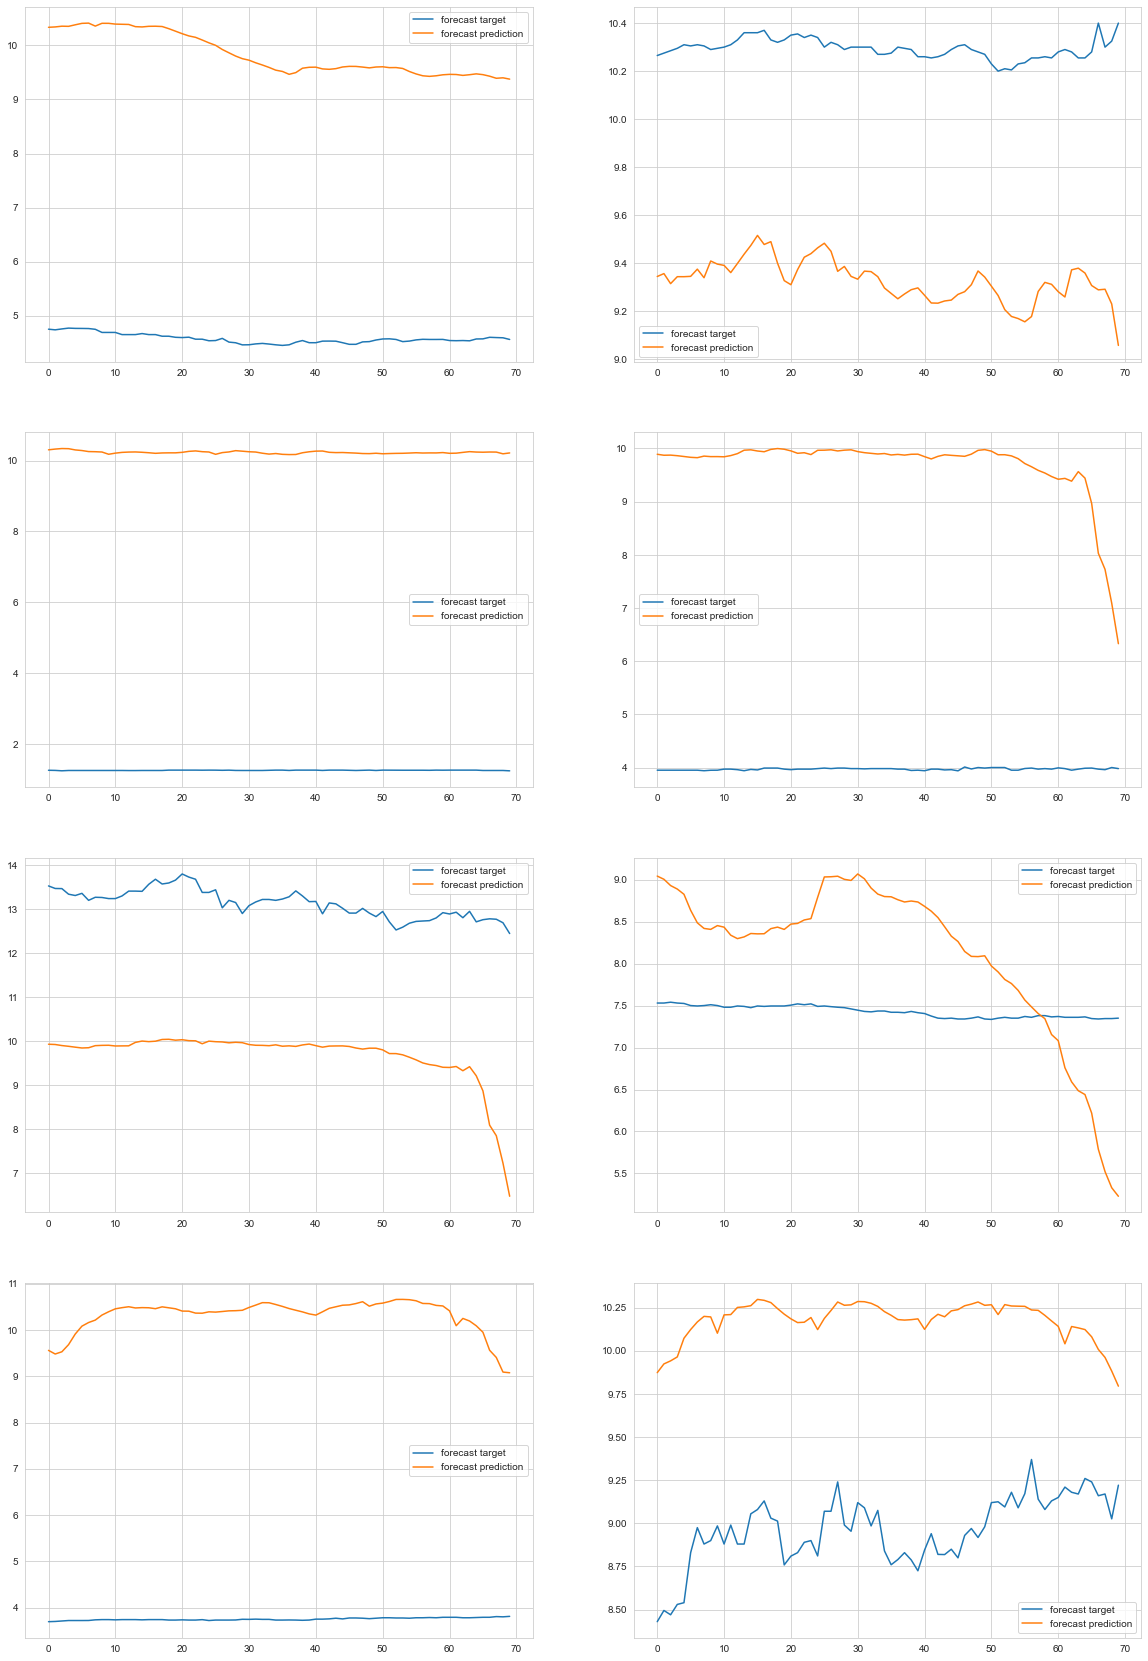

In [72]:
# some samples from the dataset to predict on
sample_predictions = [[10,  28], 
                      [70, 17], 
                      [75, 33], 
                      [77, 64]]
fig, axs = plt.subplots(4, 2, figsize=(20, 30))
for i in range(4):
    for j in range(2):
        # Multi-step forecast
        data = processed_data[sample_predictions[i][j]]
        validation_target = data['Y_test']
        prediction = model.predict(data['X_test'])

        axs[i, j].plot(validation_target, label='forecast target')
        axs[i, j].plot(prediction, label='forecast prediction')
        axs[i, j].legend()

#### Inference

The predictions unforetunately exhibit random results, sometimes its far below the target and sometimes its far above it.
What this means is that the network failed to find patterns in the data that all the stocks follow, and that we can't use it to predict future values of a given stock.
This finding follows the common belief that stock price prediction is practically impossible using the methods above, because there are so many changing factors that affect the market each and every second that we are not taking into consideration. Leaving us with modeling using only with the classification problem that was featured in [7.1](#7.1).

<a id=8></a>

## 8) Final Results Results and Conclusions

In this section apply the chosen model from the Modeling on to the test data to see how it performs in practice. The predicted classes' performance will be compared between the true performance and the random performance and afterwards compared with other generic strategies.\
Because the regression and RNN models failed, we focus here only on the classification problem, The prediction of 'Potential R bins'.\
Next we describe the different performances and metrics:

* Predicted Performance: The performance of the chosen model's predictions.

* True Performance: The true performance is the performance given all the prediction were correct. This kind of performance is the upper bound optimalitity performance.

* Random Performance: If the prediction would be carried out in a random manner, where the probability of getting a class is dictated by its fraction in the train data.

For each of the performances we'll use the bin mean, median and lower bound as a measure for a potential exit for a trade e.g. if a trade GETS a predicted bin of (3.5,10] then the mean is the mean 'Potential R' of the bin (in the training data), median is the median 'Potential R' and lower bound is 3.5 of all observations. 

It is important to note that on some trades the predicted or random performace will surpass the true performance when using bin means or medians. For example if the 'Potential R' of a trade is 4 then (3.5,10] will be its bin because 4 falls in that range. However if the mean of all 'Potential R' with (3.5,10] in the train data is 5.5 then the true value is considered a losing trade giving it a loss of -1R, 4 fell short of 5.5 by 1.5Rs. Let's now say that for that same trade our model had predictied the class (1,3.5] with a mean of 2.7 since the potential R is 4 then the trade would return us a profit of 2.7R as opposed to the real bin.
For the lower bound measure the previous statements do not hold true, the lower bound of a true bin is always surpassed.


In [73]:
test1 =  test.copy()
test1['prediction'] = best_prediciton

# get the mean and median of each bin
r_bin_means =  train[['Potential R','Potential R bins']].groupby('Potential R bins').mean()
r_bin_medians = train[['Potential R','Potential R bins']].groupby('Potential R bins').median()


# calculate the fraction of each class in the train data
bin_probabilities = []
for count in y_train_clf.value_counts():
    
    p = count/len(y_train_clf)
    bin_probabilities.append(p)
    

# calculate the random generated classes accoding according to their probability .
random_sample = []
for i in range(100):
    random_sample.append(np.random.choice(y_train_clf['Potential R bins'].unique(), len(test1),p= bin_probabilities))

In [74]:

# lists to hold the results of the predicted data
predicted_bin_means =[]
predicted_bin_medians =[]
predicted_bin_lowerbound = []

# lists to hold the results of the true data
true_bin_means = []
true_bin_medians = []
true_bin_lowerbound = []

# lists to hold the results of the random data
random_bin_means = []
random_bin_medians = []
random_bin_lowerbound = []

# A function the computes the average of a list of numbers
def average(lst):
    return sum(lst) / len(lst)



benchmark_lists = [predicted_bin_means, predicted_bin_medians, predicted_bin_lowerbound ,
                    true_bin_means, true_bin_medians , true_bin_lowerbound ]    

# iterate over all the rows in the test dataset to add the means, median and random measures for each row.
j = 0
for index, row in test1.iterrows():
    prediction = row['prediction']
    potential = row['Potential R']
    true = row [ 'Potential R bins']
  
    predicted_r_bin_mean =  r_bin_means.loc[ prediction][0]
    predicted_r_bin_median = r_bin_medians.loc[ prediction][0]
    predicted_r_bin_lowerbound = float(re.findall("\d+\.\d+", prediction)[0])
    
    sample_lowerbounds = []
    sample_medians = []
    sample_means = []
    
    # random     
    for k in [row[j] for row in random_sample]:
        
        random_r_bin_lowerbound = float(re.findall("\d+\.\d+",k)[0])
        if random_r_bin_lowerbound <= potential:
            sample_lowerbounds.append(random_r_bin_lowerbound)
        else:
            sample_lowerbounds.append(-1) 
            
        random_r_bin_mean =  r_bin_means.loc[ k][0]
        if random_r_bin_mean<=potential:
            sample_means.append(random_r_bin_mean)
        else:
            sample_means.append(-1)
            
        random_r_bin_median = r_bin_medians.loc[ k][0]   
        if random_r_bin_median<=potential:
            sample_medians.append(random_r_bin_median)
        else:
            sample_medians.append(-1)
    j = 1+j
     
    random_bin_means.append(average(sample_means))
    random_bin_medians.append(average(sample_medians))
    random_bin_lowerbound.append(average(sample_lowerbounds)) 
        
    true_r_bin_mean =  r_bin_means.loc[ true][0]
    true_r_bin_median = r_bin_medians.loc[ true][0]
    true_r_bin_lowerbound = float(re.findall("\d+\.\d+", true)[0])
        
    benchmarks = [predicted_r_bin_mean,predicted_r_bin_median,predicted_r_bin_lowerbound,
                 true_r_bin_mean,true_r_bin_median,true_r_bin_lowerbound]
    
    # true and predicted
    for i in range(len(benchmarks)):            
        if benchmarks[i]<=potential:
            benchmark_lists[i].append(benchmarks[i])
        else:
            benchmark_lists[i].append(-1)
            
    
test1['predicted R bin means'] =    predicted_bin_means   
test1['predicted R bin medians'] =    predicted_bin_medians   
test1['predicted R bin lowerbound'] =    predicted_bin_lowerbound  

test1['true R bin means'] =  true_bin_means  
test1['true R bin medians'] =  true_bin_medians 
test1['true R bin lowerbound'] =  true_bin_lowerbound  

test1['random R bin means'] =   random_bin_means   
test1['random R bin medians'] =   random_bin_medians
test1['random R bin lowerbound'] =   random_bin_lowerbound  



#### Set and Forget at kR 
Here we introduce a generic strategy for the purpose of comparison and evaluation only. These set and forget strategies will be compared to our prediction.
This set and forget strategy is a simple "no brainer" strategy where if a trade reaches or goes beyond kR then the profit is kR  else is a loss with -1R.\
k will be set to $ k \in$  {$ {1, 2, 3, 4}$}

In [75]:
# compute the results of the different set and forget kR strategies.
test1['Set and Forget 4R'] = test['Potential R'].apply(lambda x: 4 if x>=4 else -1)
test1['Set and Forget 3R'] = test['Potential R'].apply(lambda x: 3 if x>=3 else -1)
test1['Set and Forget 2R'] = test['Potential R'].apply(lambda x: 2 if x>=2 else -1)
test1['Set and Forget 1R'] = test['Potential R'].apply(lambda x: 1 if x>=1 else -1)

test1 = test1.sort_values(by = ['Num'])

##### Compute the cumelative performance of all metrics.

In [76]:
test1['cumulative predicted R bin means'] = test1['predicted R bin means'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative predicted R bin medians'] = test1['predicted R bin medians'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative predicted R bin lowerbound'] = test1['predicted R bin lowerbound'].rolling(window = len(test1), min_periods = 1).sum()

test1['cumulative true R bin means'] = test1['true R bin means'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative true R bin medians'] = test1['true R bin medians'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative true R bin lowerbound'] = test1['true R bin lowerbound'].rolling(window = len(test1), min_periods = 1).sum()

test1['cumulative random R bin means'] = test1['random R bin means'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative random R bin medians'] = test1['random R bin medians'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative random R bin lowerbound'] = test1['random R bin lowerbound'].rolling(window = len(test1), min_periods = 1).sum()

test1['cumulative manual Exit R'] = test1['Exit R'].rolling(window = len(test1), min_periods = 1).sum()

test1['cumulative Set and Forget 1R'] = test1['Set and Forget 1R'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative Set and Forget 2R'] = test1['Set and Forget 2R'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative Set and Forget 4R'] = test1['Set and Forget 4R'].rolling(window = len(test1), min_periods = 1).sum()
test1['cumulative Set and Forget 3R'] = test1['Set and Forget 3R'].rolling(window = len(test1), min_periods = 1).sum()


##### Plot the results.

In [77]:
plots = {"Random - Predicted - True (bin means)":['cumulative predicted R bin means',
                                                 'cumulative true R bin means',
                                                 'cumulative random R bin means'],
         
         "Random - Predicted - True (bin medians)":['cumulative predicted R bin medians',
                                                    'cumulative true R bin medians',
                                                    'cumulative random R bin medians'],
         
         "Random - Predicted - True (bin lowerbound)":['cumulative predicted R bin lowerbound',
                                                       'cumulative true R bin lowerbound',
                                                       'cumulative random R bin lowerbound'],
         
        "Strategy Comparison":['cumulative predicted R bin means','cumulative predicted R bin medians',
                               'cumulative predicted R bin lowerbound',
                              'cumulative manual Exit R','cumulative Set and Forget 1R',
                               'cumulative Set and Forget 2R',
                               'cumulative Set and Forget 3R','cumulative Set and Forget 4R']}
                                     
                                     

figs=np.arange(1,5,1)

for p in plots:
    traces = []
    for col in plots[p]: 

        trace = go.Scatter(
            x = np.arange(1,len(test1)+1),
            y = test1[col],
            mode = 'lines+markers',
            name = col)

        traces.append(trace)

    layout = go.Layout(
        title = p
    )
    fig = go.Figure(data=traces,layout=layout)
    fig.show()

#### Inference

When looking at the means, medians and lower bound measures we clearly see that our model does posses a degree of effectiveness, since in all 3 graphs the predicted cumulative return is higher than the random one.
In terms of measure comprarion (median, mean and lower bound), the lower bound measure out performed the other 2 becasue it is the only one with a positive cumulative R. The others may have outperformed the random performance but still return a negative cumulative return. Which means the strategies are simply not profitable.

Looking at the strategy comparison plot, we clearly see that the predicted lower bound approach is the strongest, strenghening our argument that the model is effective. However it is still far from  close to optimal
If we look at the lower bound measure we see that the predicted performance is struggling to catch up or come close to the true performance. This implies that there is still room for improvement by factors that are beyond the scope of this project. we'll conclude and say that our results are effective but still not sufficient for live application.



### Conclusion

To Summarize the steps of this project, we started with presenting the problem and the properties of the data, we then proceeded to creating the target variables 'Potential R' for the regression, and 'Potential R bins' for classification. We presented the data visualy and attempted to draw insight for understand the results and cause and effect. Later we worked on created a few methods for preprocessing and feature selection base on PCA and Random Forest. The preprocessed data we fitted to the algorithm to learn and find an optimal model for prediction. We used various algorithms for classification and regression, and the best model was used to apply its prediction on the test data and we presented the results in this section.

The purpose of the project was to find a method for a better trade picking process and a better trade exit decision. Our expectations brought us to believe that an optimal approach is not feasible thus we can only try to come close to one, given the obtained results we can confidently say that it satisfies our expectations, but still left with some question marks and room for improvement.

Some factors that held us back from getting better and more interpreteable results could be listed as the following:
* More data, because the span of this project depends was short and the observation we added using discretionary labeling the amount of data is limited. However there was a solution to this problem which is a addressed in the next point.

* Discretionary trading and labeling, this process requires human decision making because of the sophistication of discretionary labeling, the data is limited. to substitues the labeling with automatic process we need to conduct many different models and algorithms which require an immense amount of time and skill.

* The trades taken are simply bad trades, and the whole strategy is a bad strategy with not much room for optimization.

* An over-complicated approch to a simple problem. Perhaps the problem can be simplified, and does not require ML to predict, but instead focus on probabilities and a more intuitive way of presenting the data and the problem. For example the use of bayes nets. In this manner we can focus and learn more about the feature relationship which will eventually lead us to the ideal performance.

* The use optimization tools, but such tools are outside the scope of this project.

This project is a first milestone for creating a trading algorithm. We can later apply it on the live markets for results with more depth. However we are still far from letting real money run through this algorithm. But slowly and steadily we might get there.

